# Supervised Machine Learning

- <a href="#Data-Visualisation">Data Viz</a>
- <a href="#Hypothesis-Testing">Hypothesis Testing</a>
- <a href="#Modelling">Modelling</a>

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

import scipy.stats as st
import pingouin as pg
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve, plot_confusion_matrix, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from statsmodels.api import OLS, add_constant

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from numpy.random import seed
from tensorflow.random import set_seed
from keras import backend as K 

## Data Preparation

In [2]:
# url to the dataset
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [3]:
# information on the variables
names=f"""ID	ID
Age	age
Gender	gender
Education	level of education
Country	country of current residence
Ethnicity	ethnicity
Nscore	NEO-FFI-R Neuroticism
Escore	NEO-FFI-R Extraversion
Oscore	NEO-FFI-R Openness
Ascore	NEO-FFI-R Agreeableness
Cscore	NEO-FFI-R Conscientiousness
Impulsive	BIS-11 Impulsiveness
SS	ImpSS sensation
Alcohol	alcohol consumption (output attribute)
Amphet	amphetamines consumption (output attribute)
Amyl	amyl nitrite consumption (output attribute)
Benzos	benzodiazepine consumption (output attribute)
Caff	caffeine consumption (output attribute)
Cannabis	cannabis consumption (output attribute)
Choc	chocolate consumption (output attribute)
Coke	cocaine consumption (output attribute)
Crack	crack consumption (output attribute)
Ecstasy	ecstasy consumption (output attribute)
Heroin	heroin consumption (output attribute)
Ketamine	ketamine consumption (output attribute)
Legalh	legal highs consumption (output attribute)
LSD	LSD consumption (output attribute)
Meth	methadone consumption (output attribute)
Mushrooms	magic mushrooms consumption (output attribute)
Nicotine	nicotine consumption (output attribute)
Semer	fictitious drug Semeron consumption (output attribute)
VSA	volatile substance abuse consumption (output attribute)"""

In [4]:
# groups labels for categorical variables
age_lb=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_lb=["Male", "Female"]
education_lb=["Left before 16", "Left at 16", "Left at 17", "Left at 18","Left at Uni", "Certificate/Diploma", "University", "Masters", "PhD"]
country_lb=["USA", "New Zealand", "Other", "Australia",  "Republic of Ireland", "Canada", "UK"]
ethnicity_lb=["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]
user_lb=["Non-user", "Drug user"]

In [5]:
# personality test scores columns
scores= ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]

In [6]:
# Download dataset with the column titles
def download(url, titles):
    df=pd.read_csv(url, header=None)
    titles = [row.split("\t") for row in titles.split(f"\n")]
    df.columns=pd.DataFrame(titles)[0]
    display(df.info())
    print(f"""Missing Values: """)
    display(df.isna().sum())
    print(f"""Sample of the dataset: """)
    display(df.head())
    return df

In [7]:
df=download(url, names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

None

Missing Values: 


0
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Sample of the dataset: 


0  ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

0   Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

0 Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

There are no missing values in the dataset at a glance, and all of the output attributes are coded as categorical data which will require preprocessing. The column ID is redundant in this data exploration exercise.

In [8]:
# removing the ID column from dataset
df.drop(columns="ID", inplace=True)

### Bias Sample 

In [9]:
# Semeron is a fictious drug included on the survey to identify those who exaggerate their drug usage, therefore those indicated with any usage in this category should be removed

def semer(df):
    display(df.Semer.value_counts())
    df.drop(df[df.Semer!="CL0"].index, axis=0, inplace=True)
    return df.drop(columns="Semer")

df=semer(df)

CL0    1877
CL2       3
CL1       2
CL3       2
CL4       1
Name: Semer, dtype: int64

### Preprocessing
#### Non-numerical columns

In [10]:
# transforming the non-numerical columns
def non_num_transform(df):
    output= list(set(df.columns).difference(set(df._get_numeric_data().columns)))
    for o in output:
        le = LabelEncoder()
        df[o] = le.fit_transform(df[o])
    return output

output_attributes=non_num_transform(df)

#### Hard Drugs

In [11]:
# define what are hard drugs
hard_drugs=["Amphet", "Benzos", "Coke", "Crack", "Ecstasy", "Heroin", "Legalh", "Meth"]

In [12]:
# encode a new column to identify whether an individual is a hard drug user or not (with frequency>1)
def hard_drug_user(df, hard_drugs):
    df["hard"]=df[df[hard_drugs]>1].any(axis=1)
    print(f"The distribution of hard drug user:")
    display(df.hard.value_counts(normalize=True).round(2))
    print(f"Descriptive summary of the hard drug user vs non user on personality test scores:")
    display(df.groupby("hard").agg(["mean", "std", "median", "min", "max"]).round(2).stack()[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]])
    return df

In [13]:
df=hard_drug_user(df, hard_drugs)

The distribution of hard drug user:


True     0.64
False    0.36
Name: hard, dtype: float64

Descriptive summary of the hard drug user vs non user on personality test scores:


Nscore  Escore  Oscore  Ascore  Cscore  Impulsive    SS
hard                                                                 
False mean     -0.23    0.07   -0.43    0.22    0.38      -0.36 -0.52
      std       0.92    0.92    0.90    0.93    0.91       0.91  0.84
      median   -0.25    0.00   -0.45    0.29    0.42      -0.22 -0.53
      min      -2.76   -2.73   -3.27   -2.54   -2.42      -2.56 -2.08
      max       2.61    2.86    2.90    2.76    3.46       2.90  1.92
True  mean      0.13   -0.04    0.24   -0.13   -0.22       0.21  0.28
      std       1.02    1.04    0.97    1.01    0.98       0.92  0.90
      median    0.14    0.00    0.29   -0.15   -0.28       0.19  0.40
      min      -3.46   -3.27   -3.27   -3.46   -3.46      -2.56 -2.08
      max       3.27    3.27    2.90    3.46    3.01       2.90  1.92

## Distribution of Variables

In [14]:
def iv_displot(df, scores):
    graph_name="graph/displot {}.png"
    sns.set(style="white", font_scale = 1.2)

    for score in scores:
        fig = plt.figure(figsize=(6,4))
        sns.distplot(df[score])
        plt.title(f"Distribution of {score}")
        plt.xlabel(score)
        plt.ylabel("Frequency")
        #plt.savefig(graph_name.format(score) , transparent=True)
        plt.show()
        
    return None

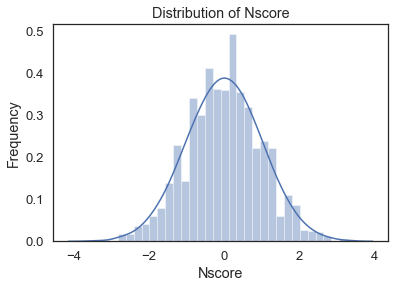

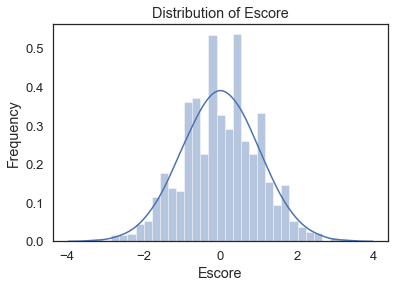

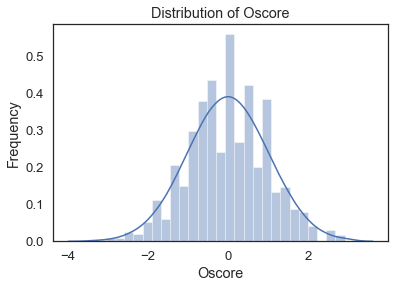

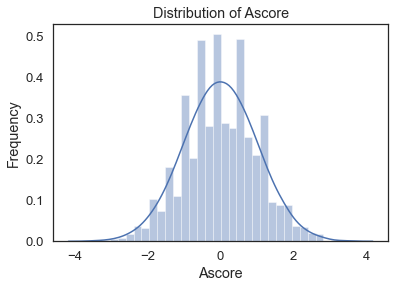

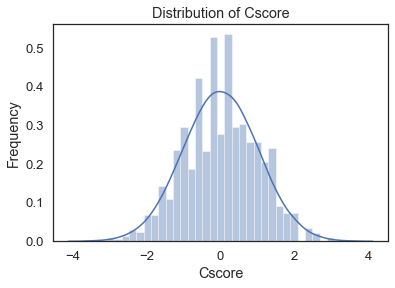

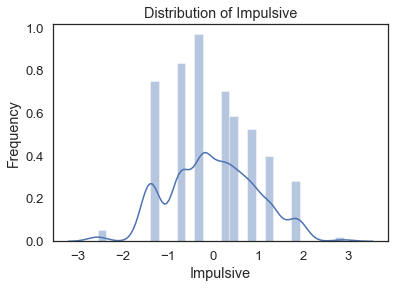

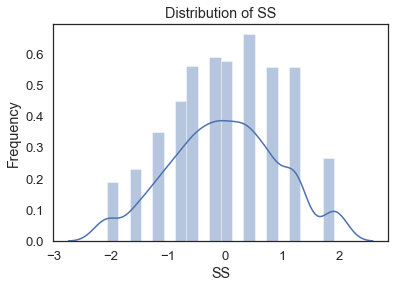

In [15]:
iv_displot(df, scores)

The personality test scores are mostly normally distributed with the exception of Impulsive and SS.

## Data Visualisation

### User Vs. Non-User on Different Drugs

In [14]:
# User vs Non-User across different Drugs
pivot=[]
for c in output_attributes:
    x=df[c].value_counts(normalize=True)
    pivot.append(pd.Series(data=[c, x[x.index<2].sum()*100, x[x.index>=2].sum()*100]))

x=pd.DataFrame(data=pivot)
x.set_index(0, drop=True, inplace=True)
x.columns=["Non-user", "User"]

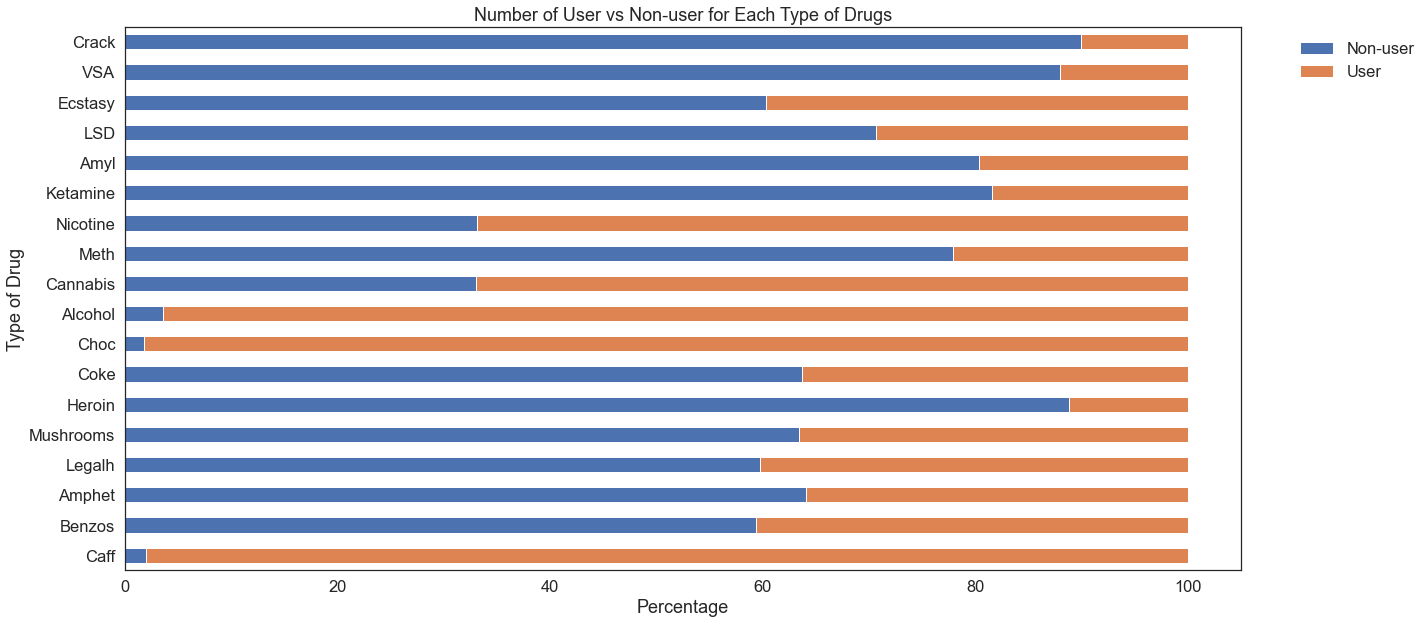

In [17]:
# 100% stacked bar for drug type by User/Non-User
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1.5)
x.plot.barh(stacked=True, figsize=(20,10), title="Number of User vs Non-user for Each Type of Drugs")
plt.ylabel("Type of Drug")
plt.xlabel("Percentage")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

Most popular drug in terms of percentage at a glance is Caffeine, Chocolate and Alcohol (I myself would be there), then it is Cannabis and Nicotine, possible correlations between the two?

### Variety of Drug Type Used by Gender

In [14]:
# create a column to record the number of drug type variety used for each respondent
df["drug_use"]=df[df[hard_drugs]>1][hard_drugs].count(axis=1)

In [16]:
def plot_variety(df, cat):
    plt.style.use('seaborn-whitegrid')
    
    graph_name="graph/violin drug use variety by {}.png"
    sns.set(style="white", font_scale = 3)
    
    for c in cat:
        f, ax = plt.subplots(figsize=(40, 15))
        label=eval(c.lower()+"_lb")

        g=sns.violinplot(x=c, y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
        g.set_xticklabels(label)

        g.set_ylabel("Variety of drug type used")
        g.set_xlabel(f"{c} Group")
        g.set_title(f"Variety of drug type used by {c} and Gender")
        for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

        #plt.savefig(graph_name.format(c) , transparent=True)
        plt.show()
    return None

In [15]:
# define categories
cat=["Age", "Education", "Country", "Ethnicity"]

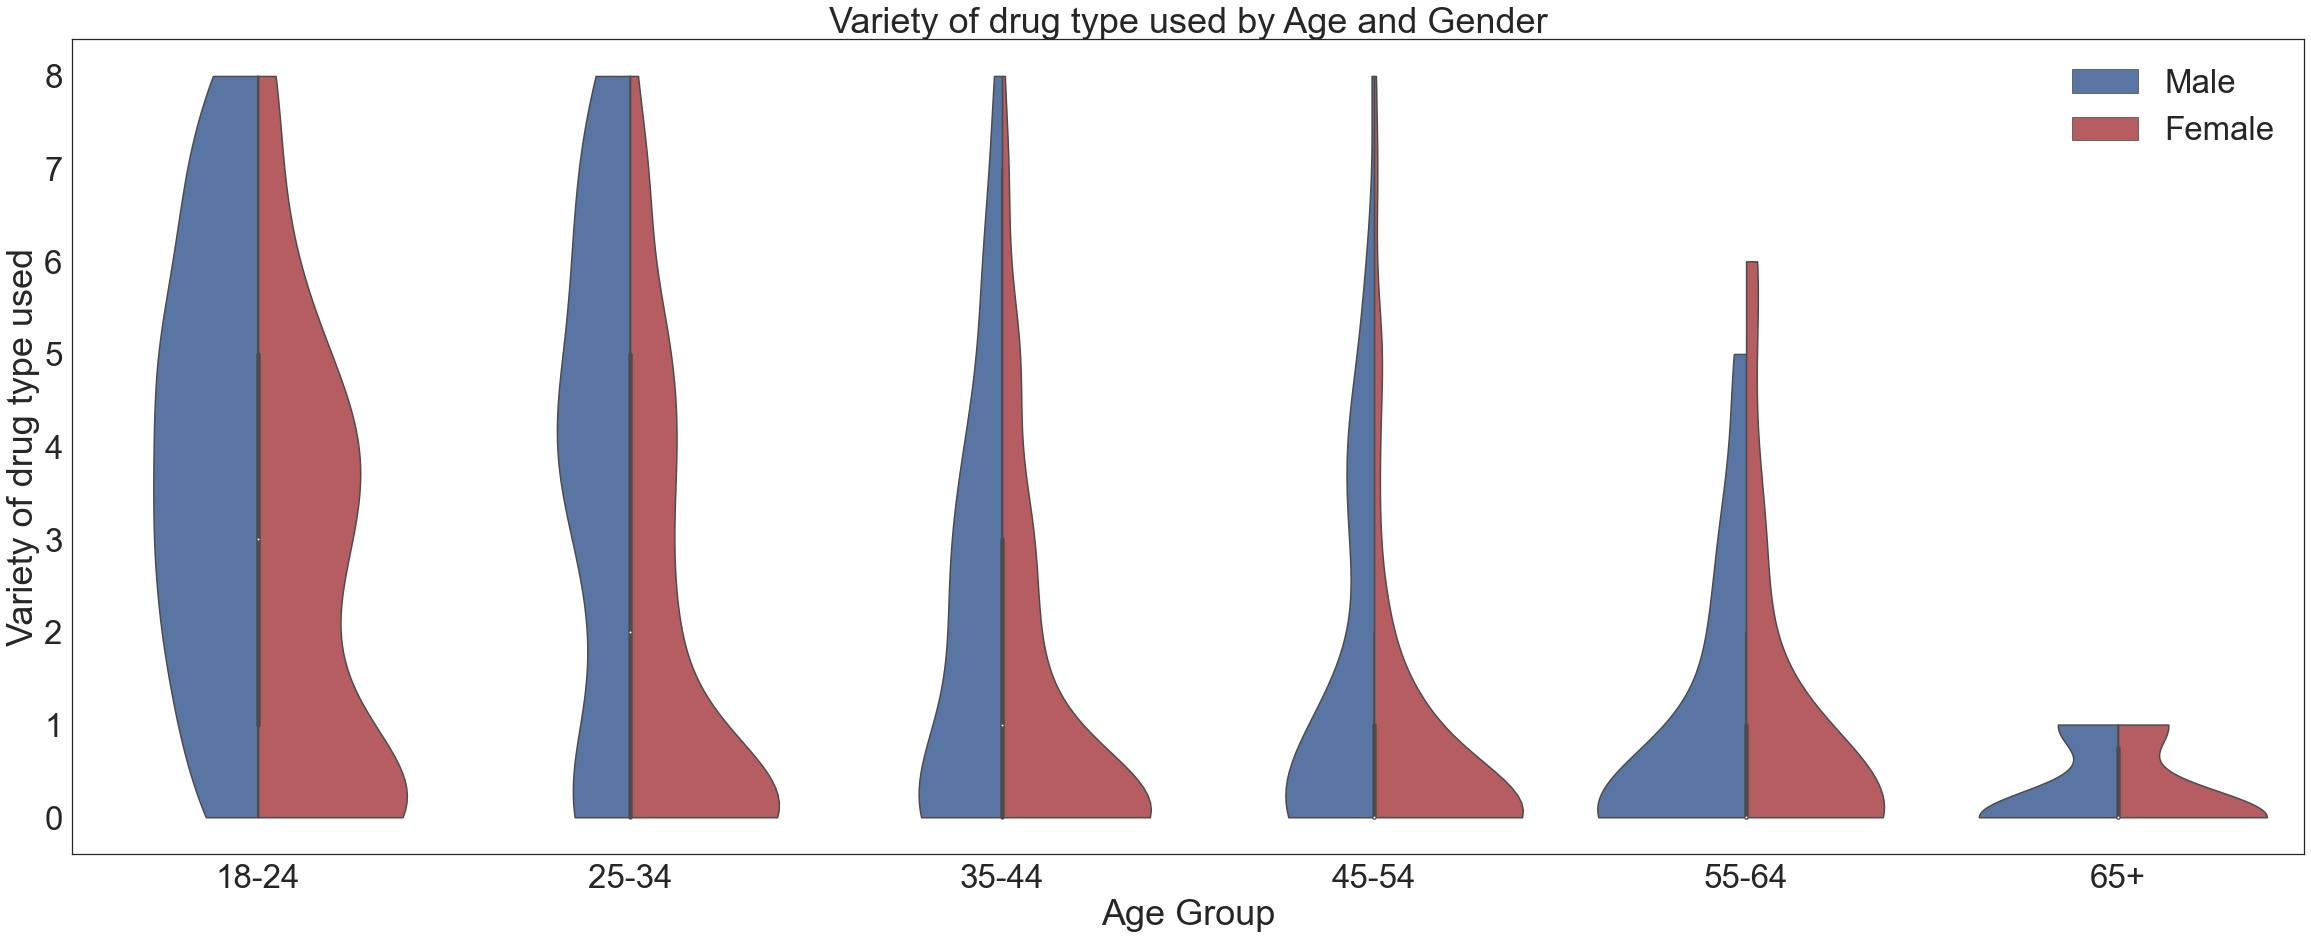

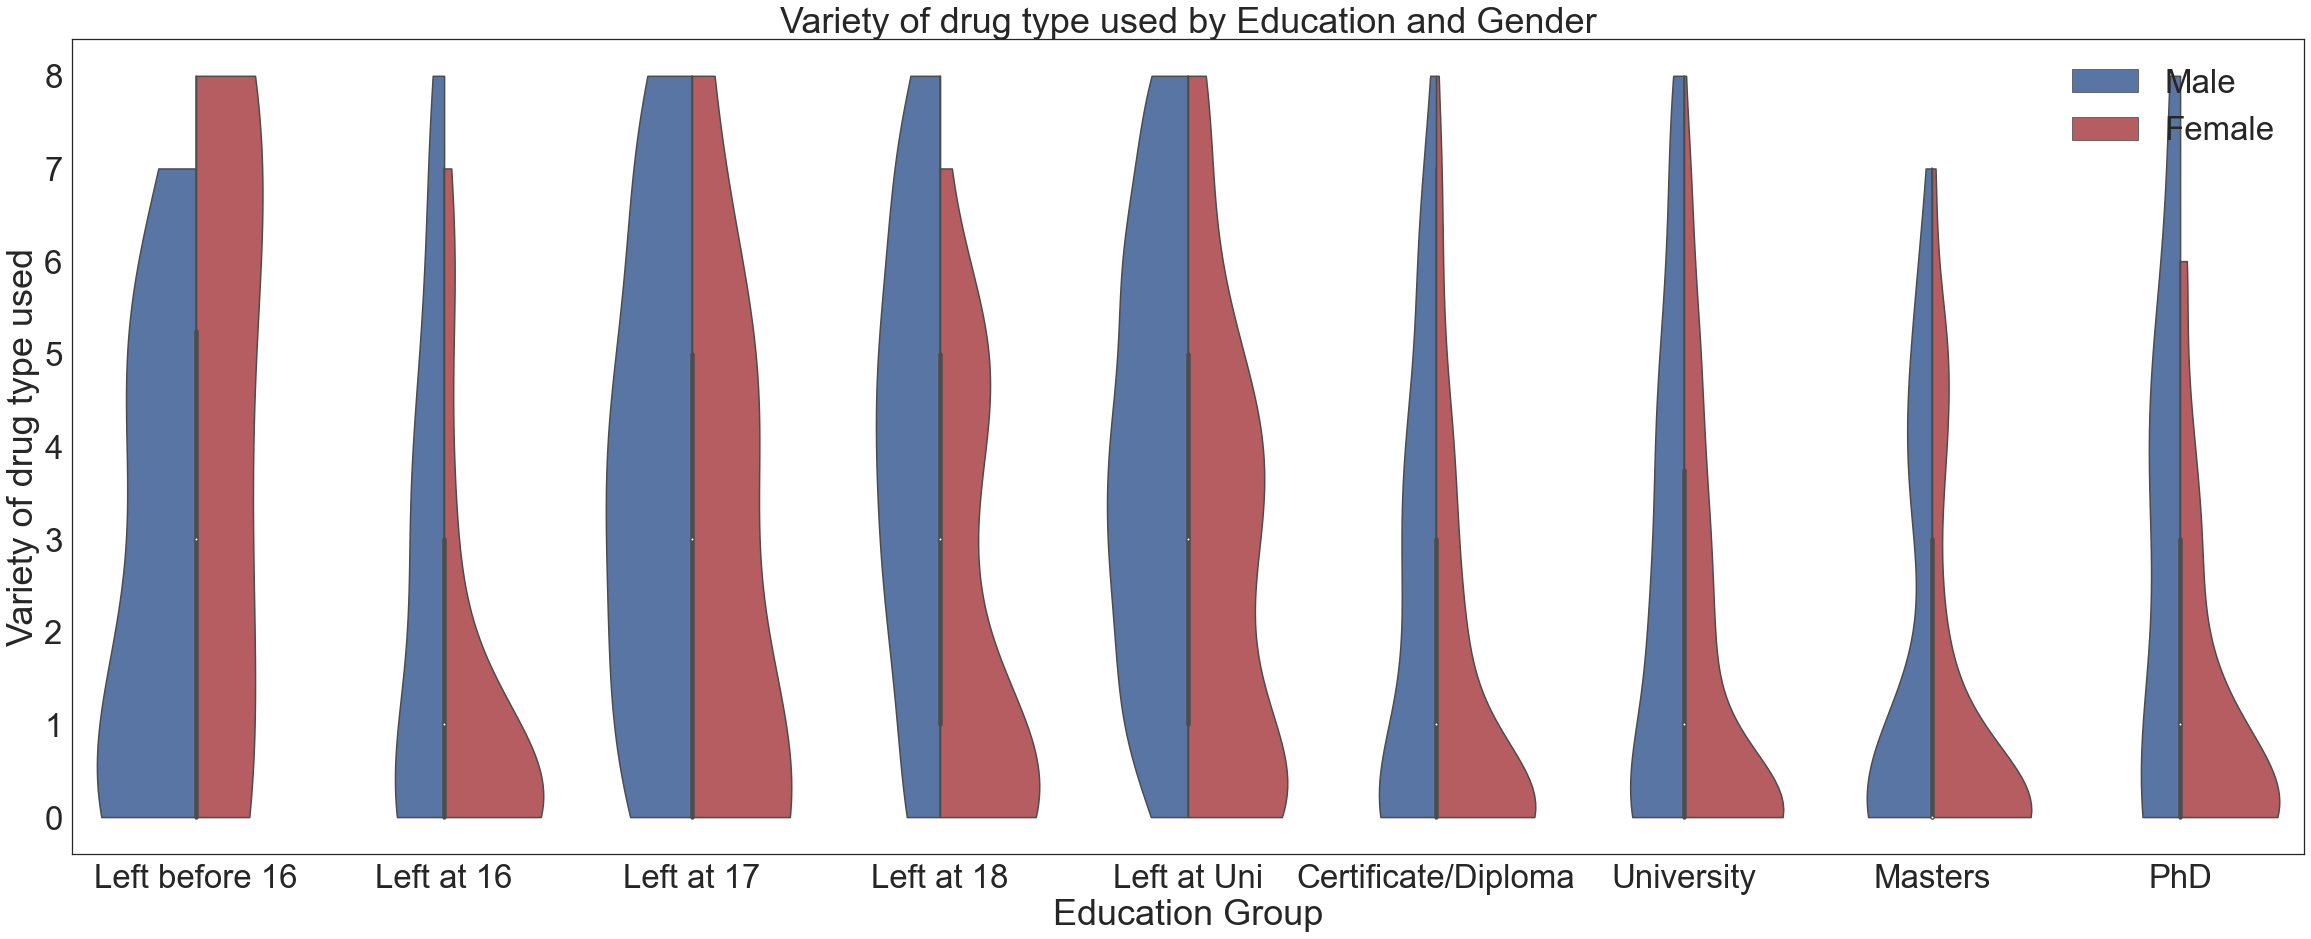

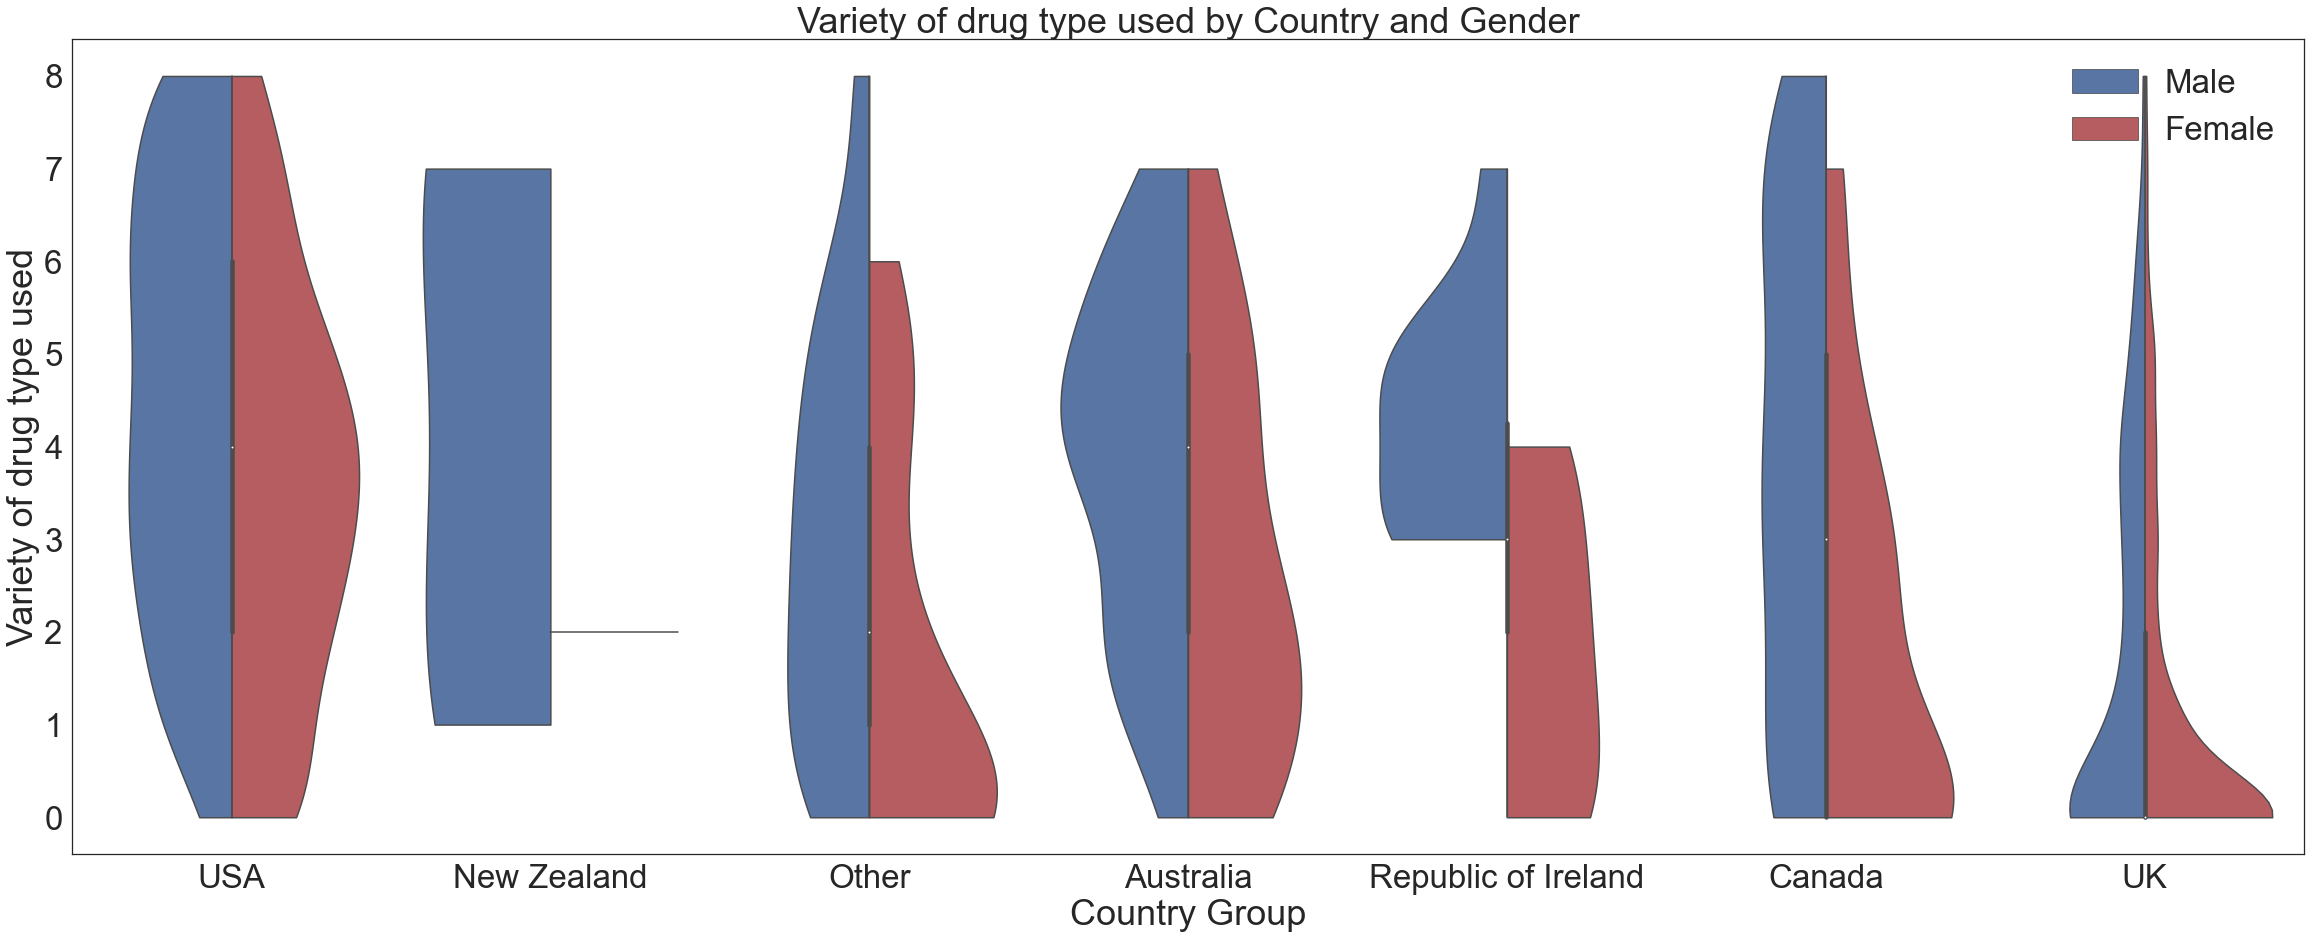

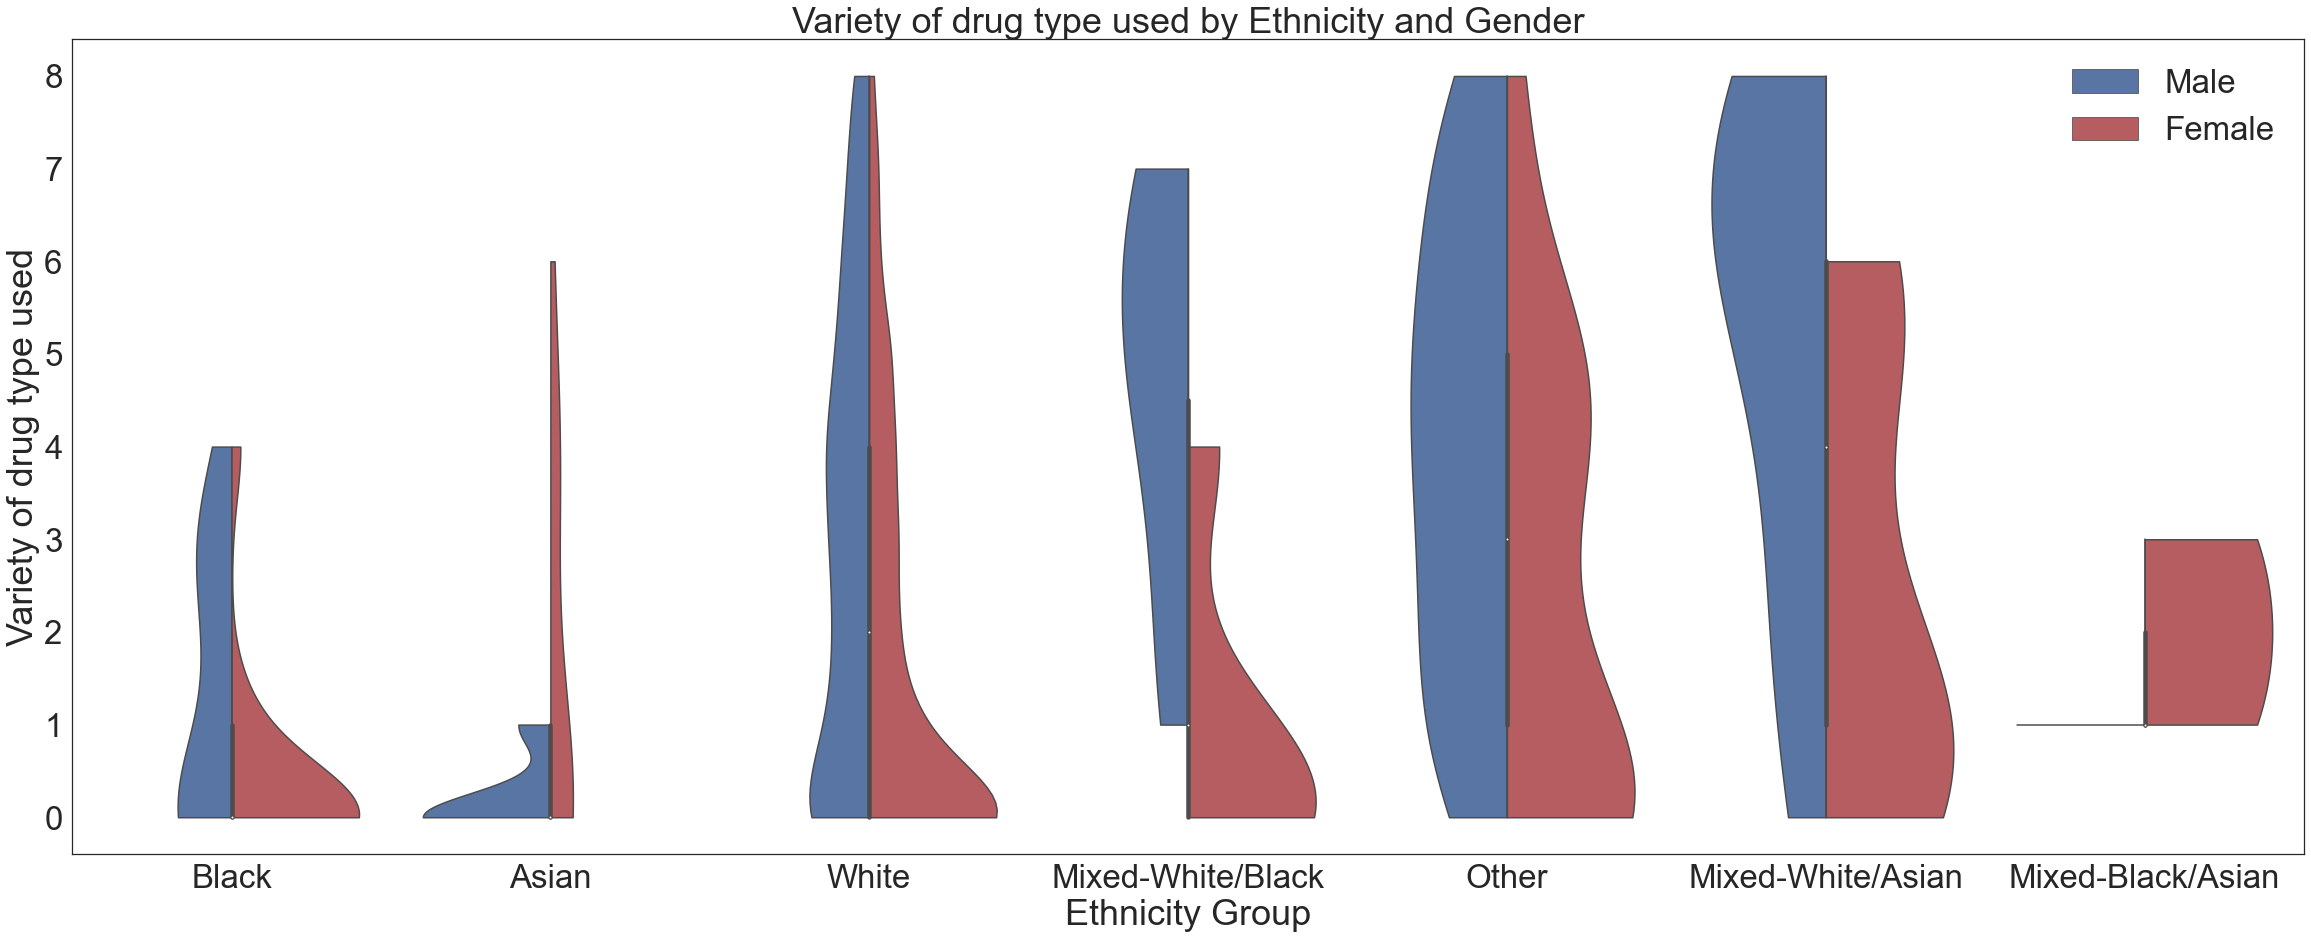

In [17]:
plot_variety(df, cat)

### Hard Drug Users by Demographics

In [138]:
def plot_demo(df, cat):
    plt.style.use('seaborn-whitegrid')
    
    graph_name="graph/hard drug user by {}.png"
    sns.set(style="white", font_scale = 1.5)
    
    for c in cat:
        f, ax = plt.subplots(figsize=(15, 7))
        label=eval(c.lower()+"_lb")
        
        p=round(pd.pivot_table(df[df.hard==True], values="hard", columns="Gender", index=c, aggfunc="count")/pd.pivot_table(df, values="hard", columns="Gender", index=c, aggfunc="count")*100, 2).reset_index().melt(id_vars=[c])
        g=sns.barplot(x=c, y="value", data=p, hue='Gender', palette=["b","r"])
        g.set_xticklabels(label)

        g.set_ylabel("Hard Drug User Percentage")
        g.set_xlabel(f"{c} Group")
        g.set_title(f"Distribution of Hard Drug User by {c} and Gender")
        for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)
        g.set_xticklabels(g.get_xticklabels(), rotation=15)

        #plt.savefig(graph_name.format(c) , transparent=True)
        plt.show()
    return None

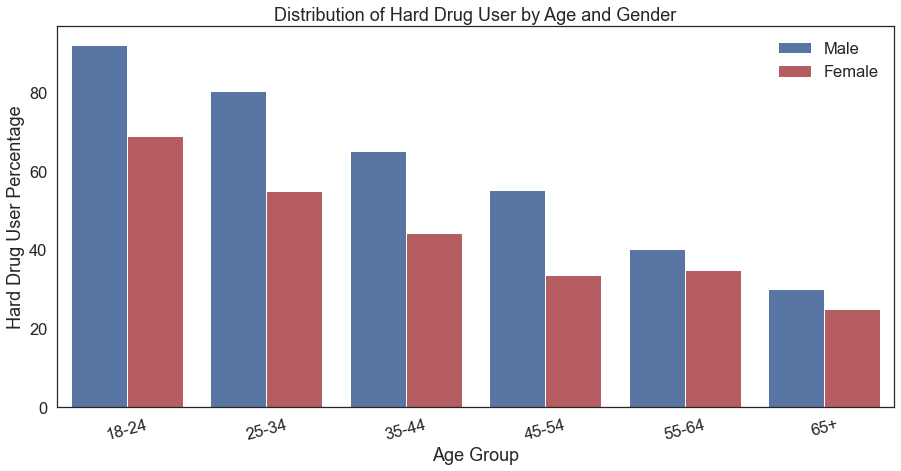

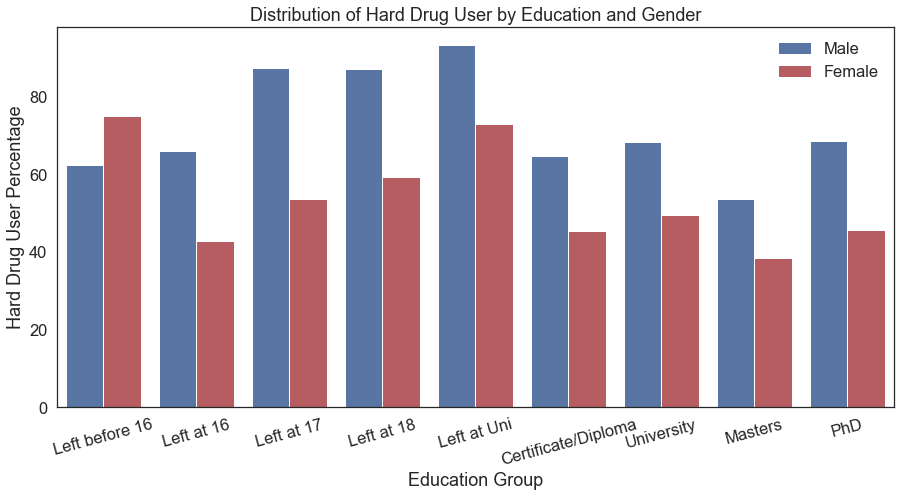

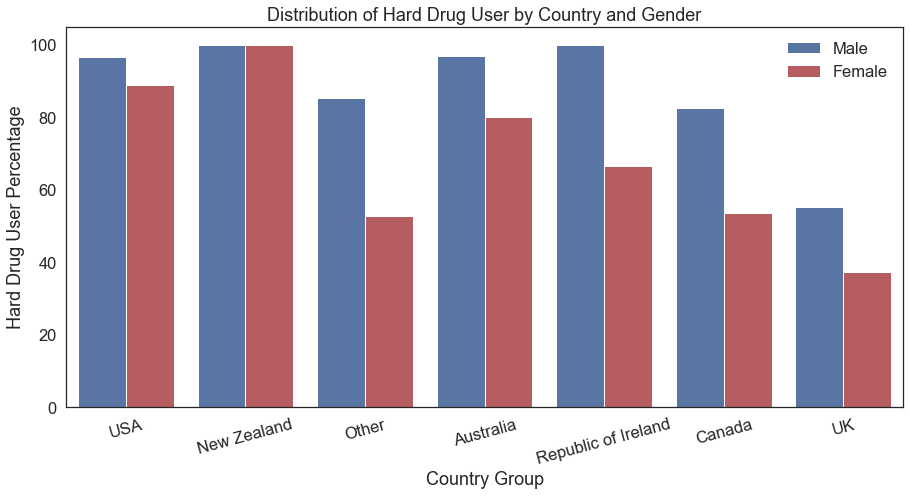

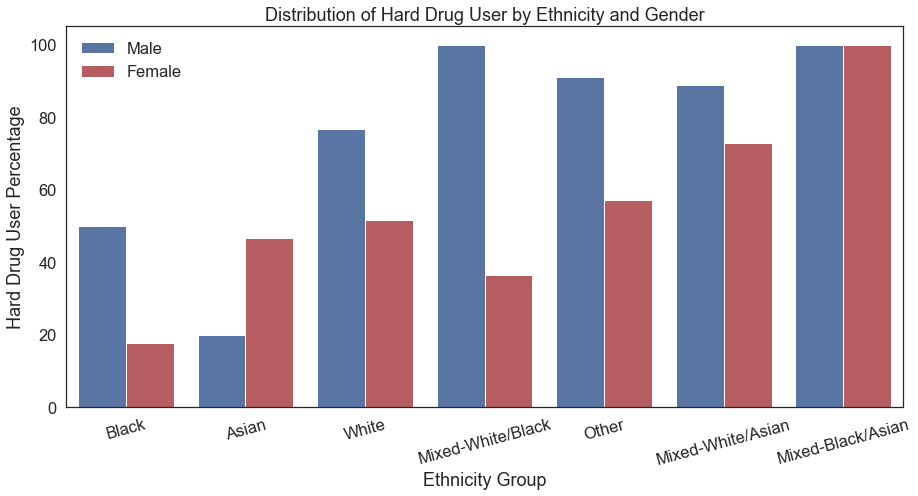

In [139]:
plot_demo(df,cat)

### Personality Test Scores by User/Non-User

In [39]:
def plot_personality(df, cat, scores):
    plt.style.use('seaborn-whitegrid')
    
    graph_name="graph/violin {} by {}.png"
    sns.set(style="white", font_scale = 1.5)
    
    for personality in scores:
    
        for c in cat:
            f, ax = plt.subplots(figsize=(15, 7))
            label=eval(c.lower()+"_lb")

            g=sns.violinplot(x=c, y=personality, data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
            g.set_xticklabels(label)

            g.set_ylabel(personality)
            g.set_xlabel(f"{c} Group")
            g.set_title(f"Hard drug user vs. non-user on {personality} by {c}")
            for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

            #plt.savefig(graph_name.format(personality, c) , transparent=True)
            plt.show()
    return None

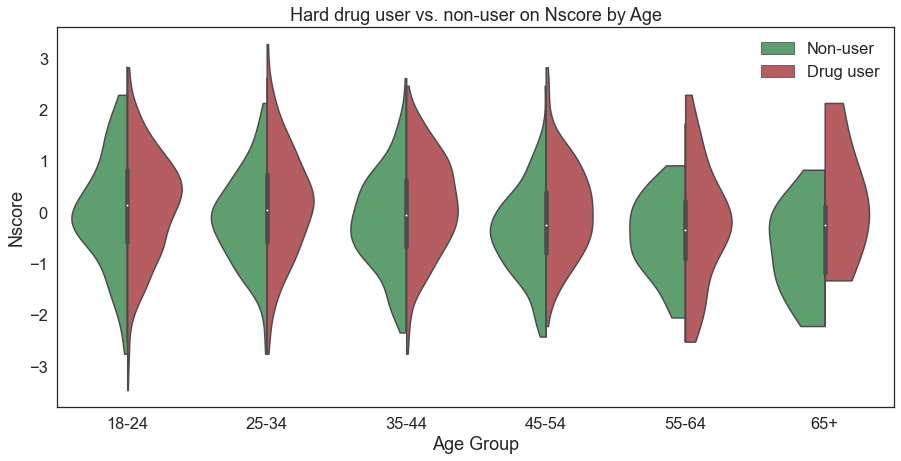

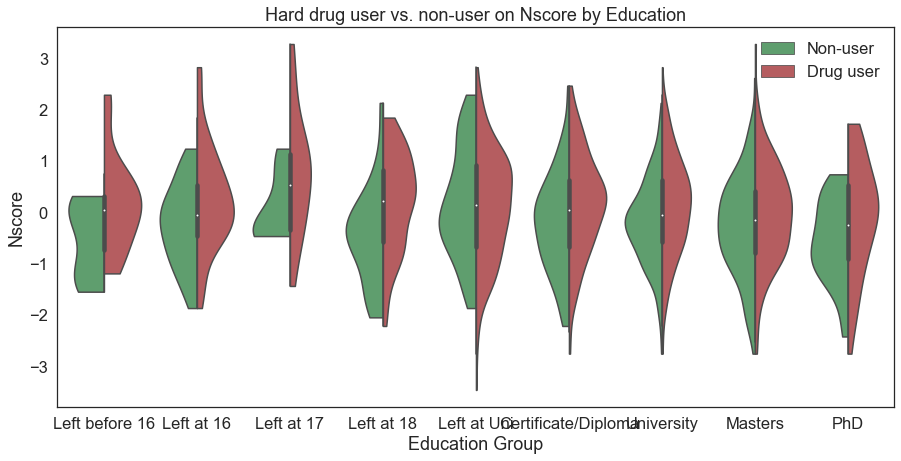

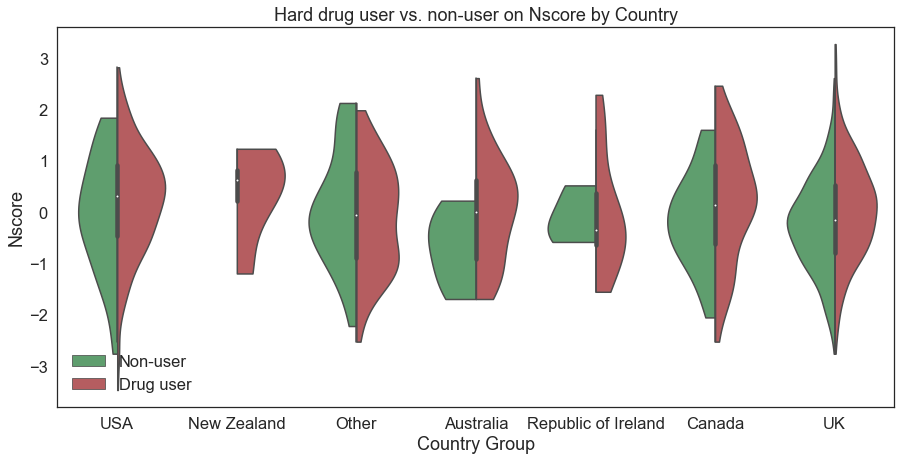

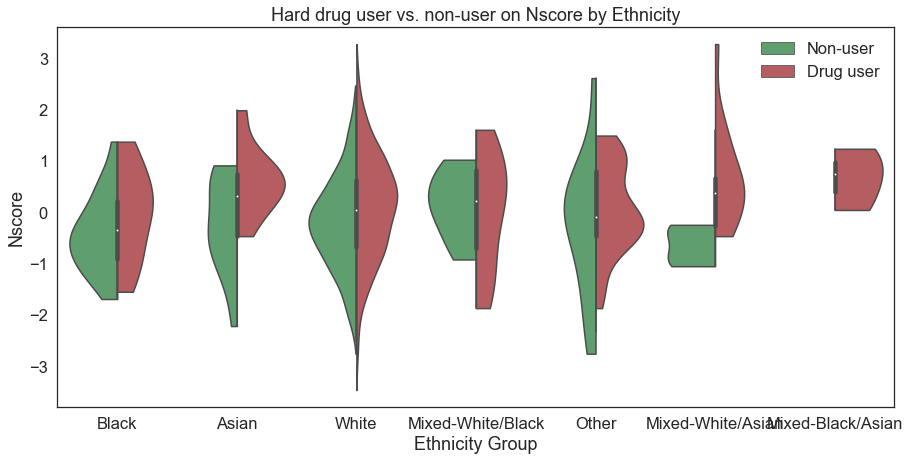

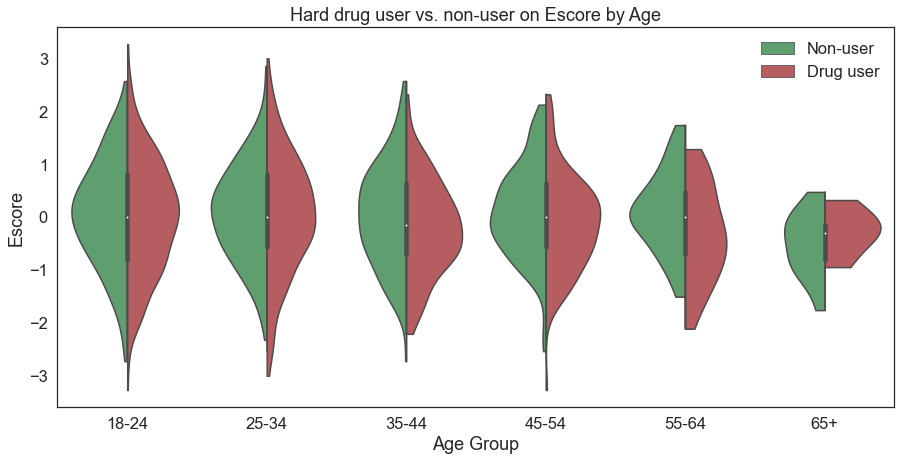

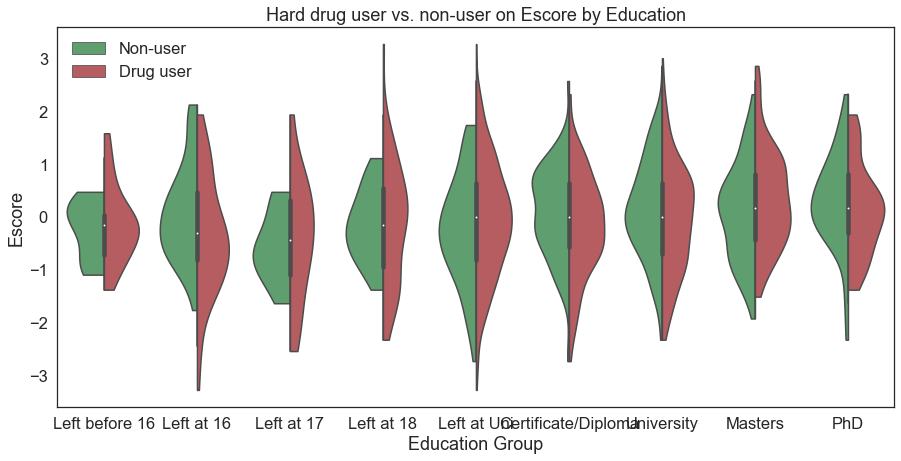

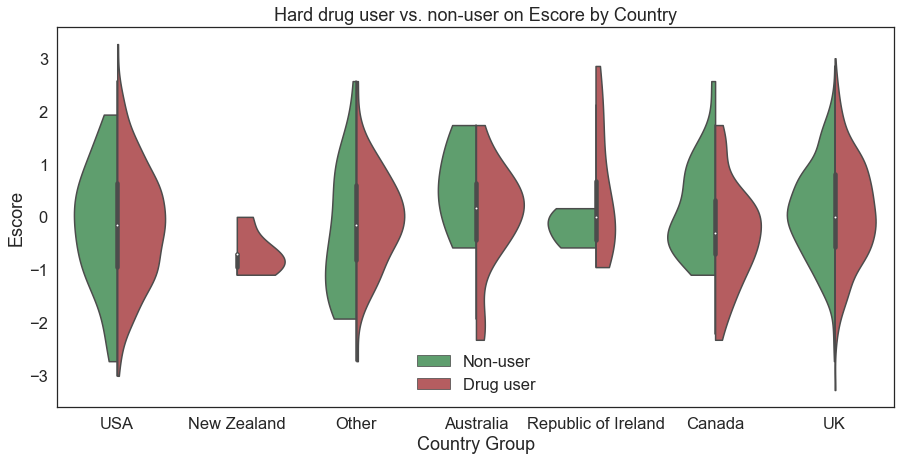

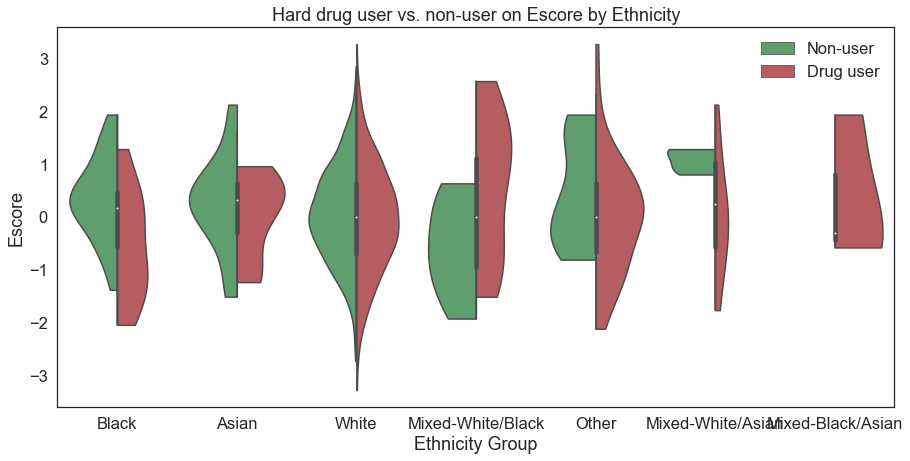

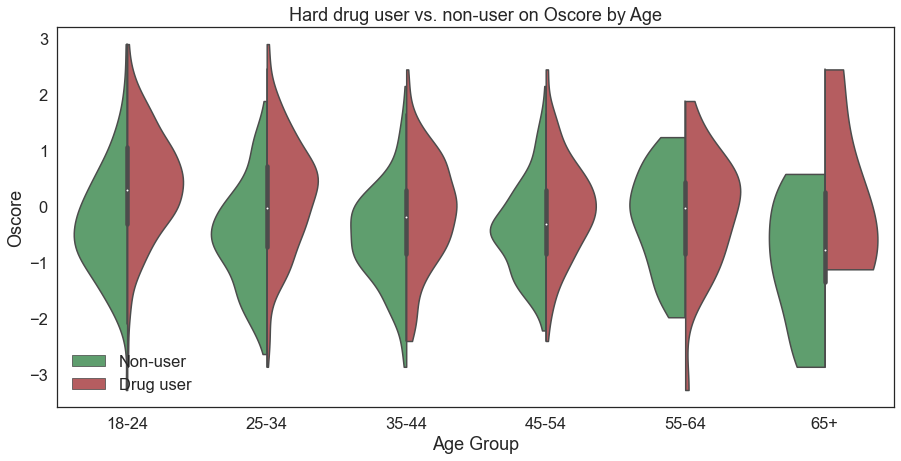

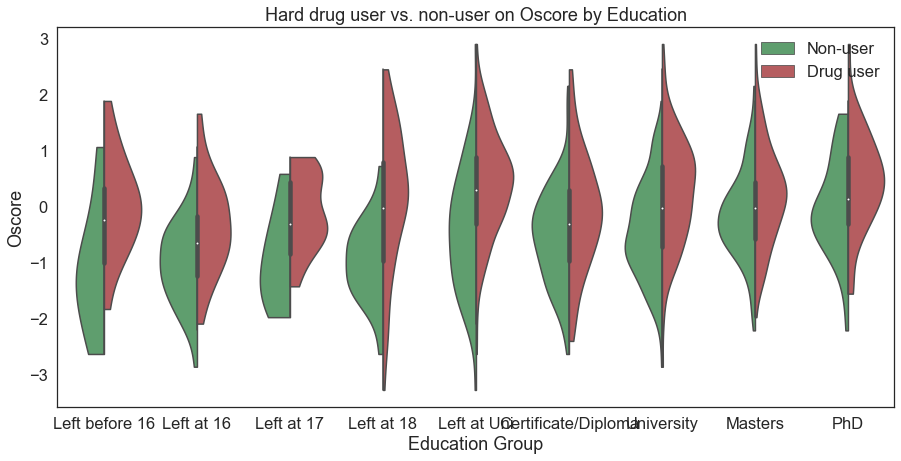

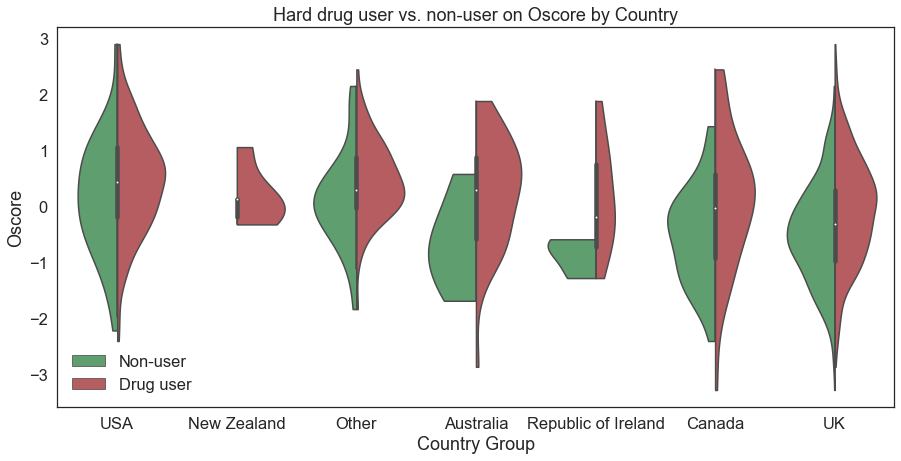

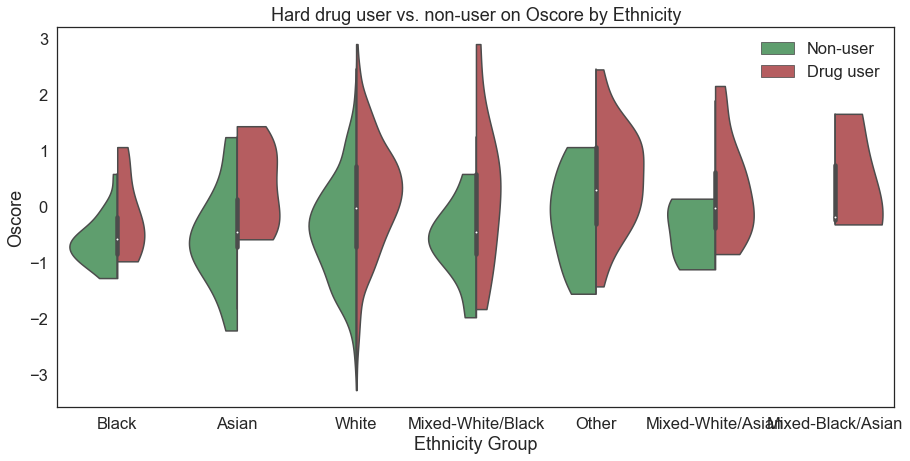

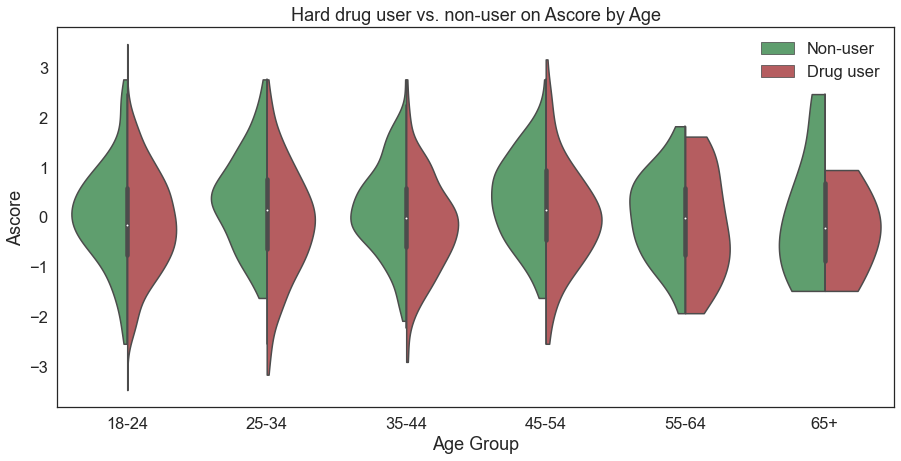

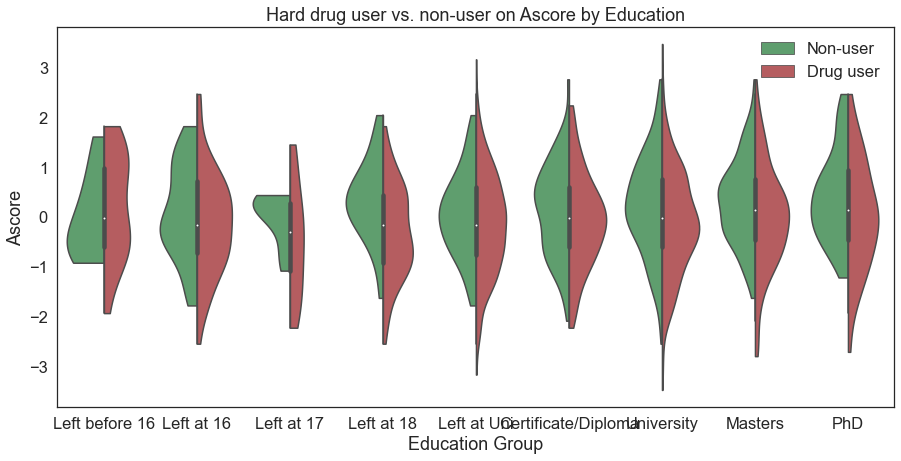

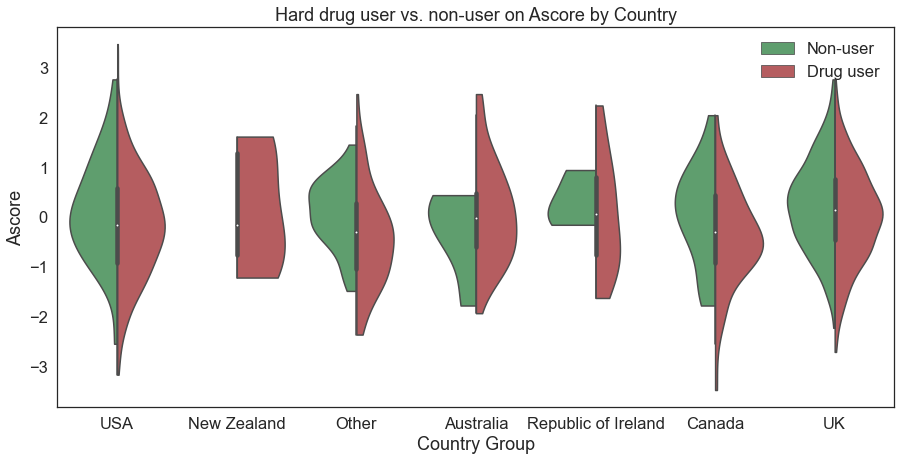

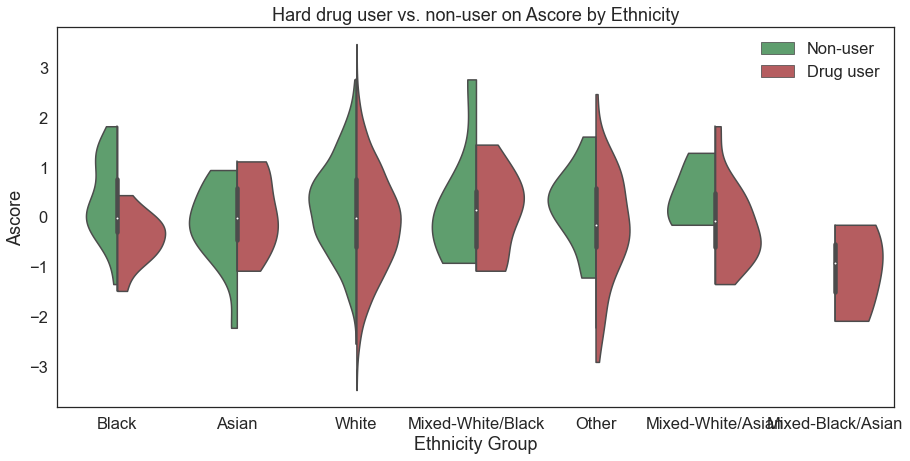

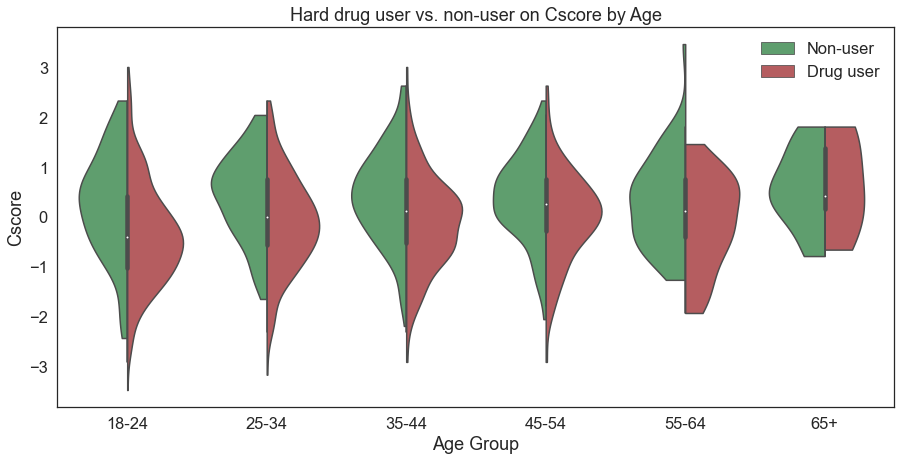

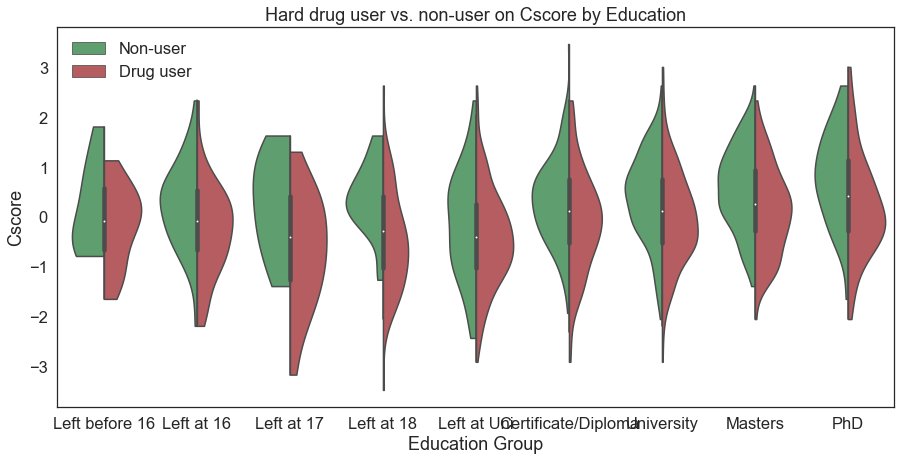

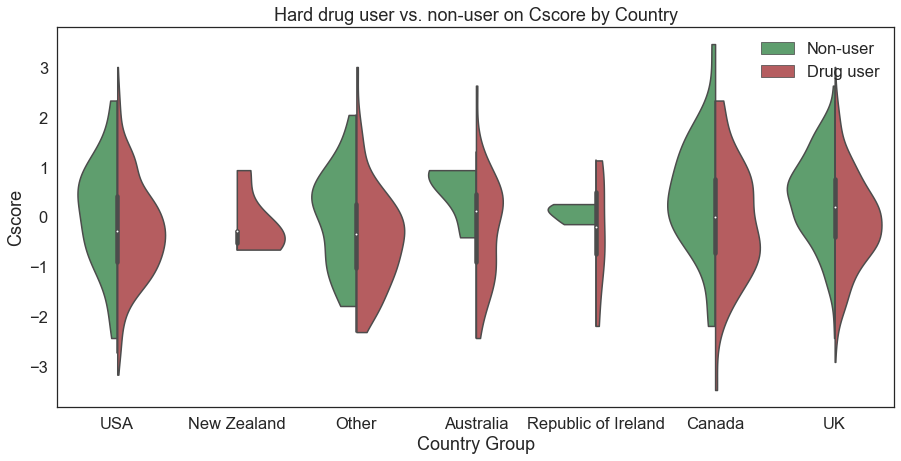

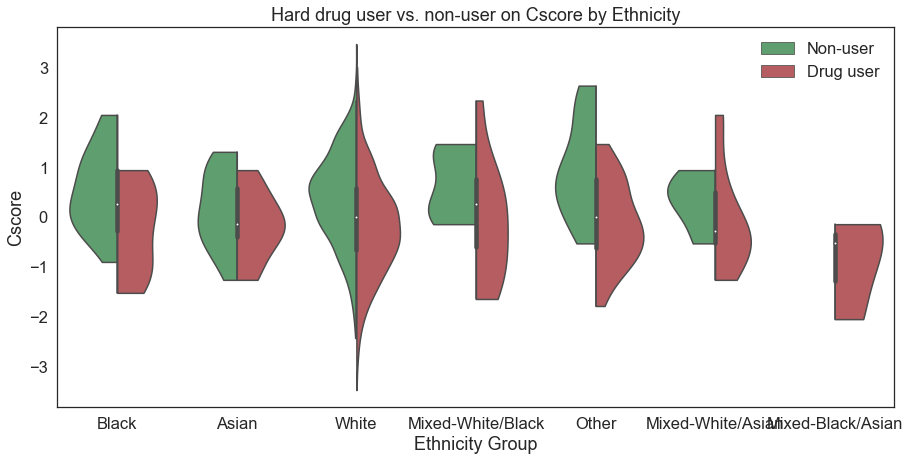

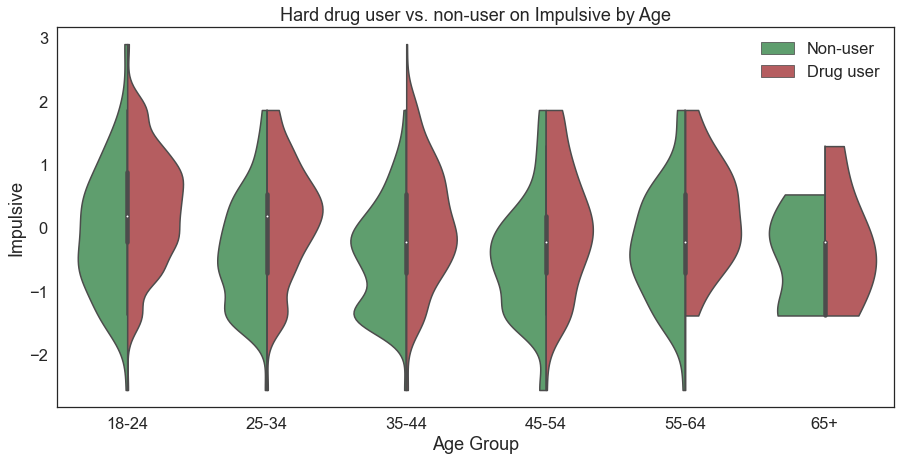

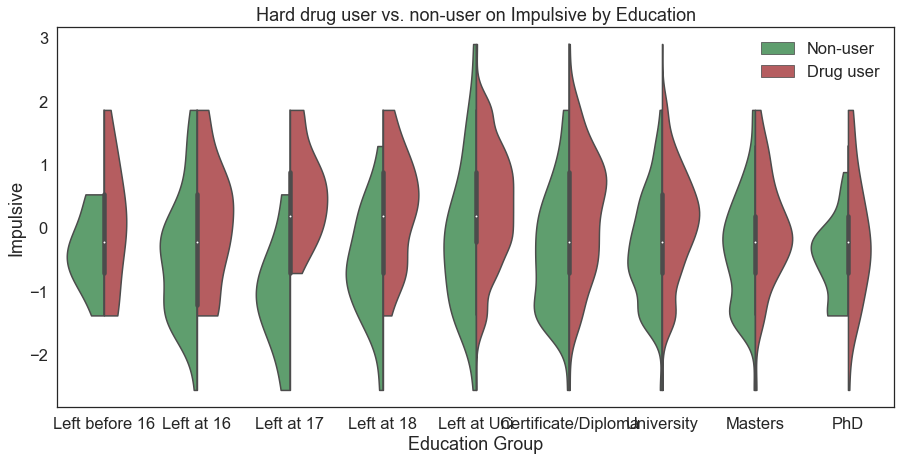

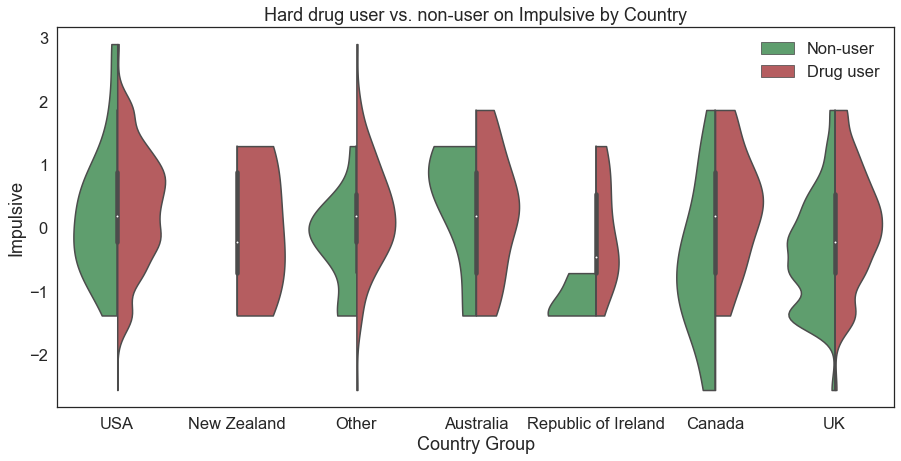

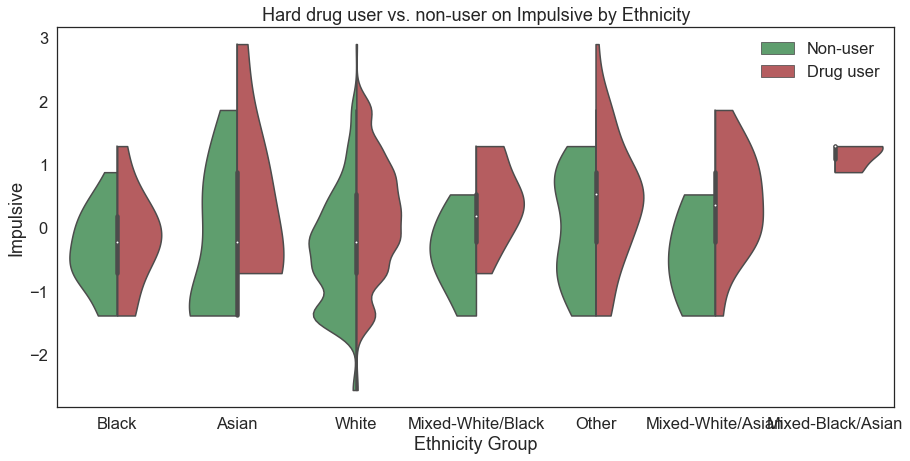

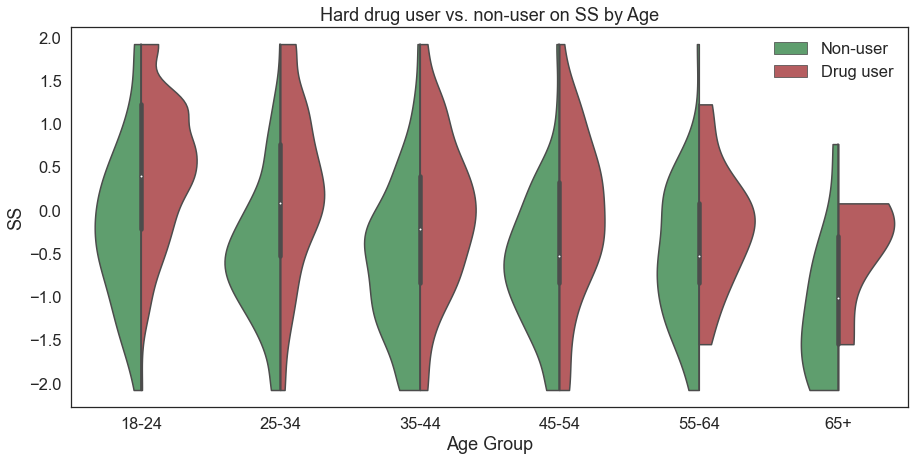

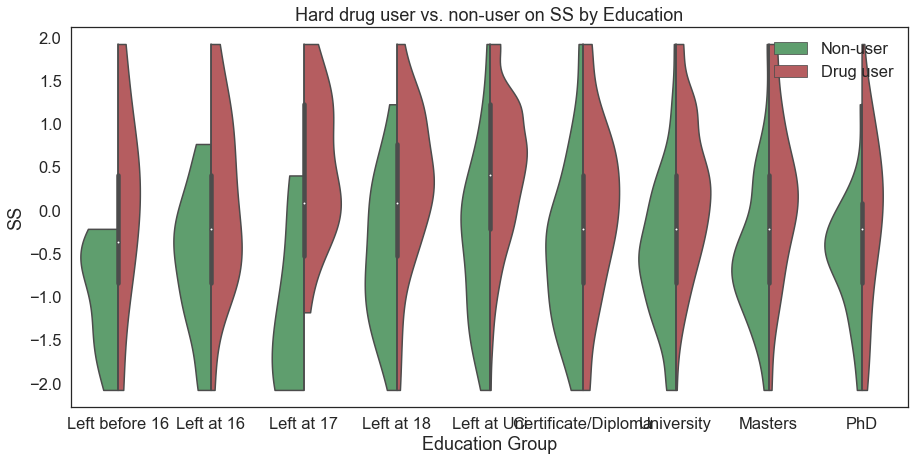

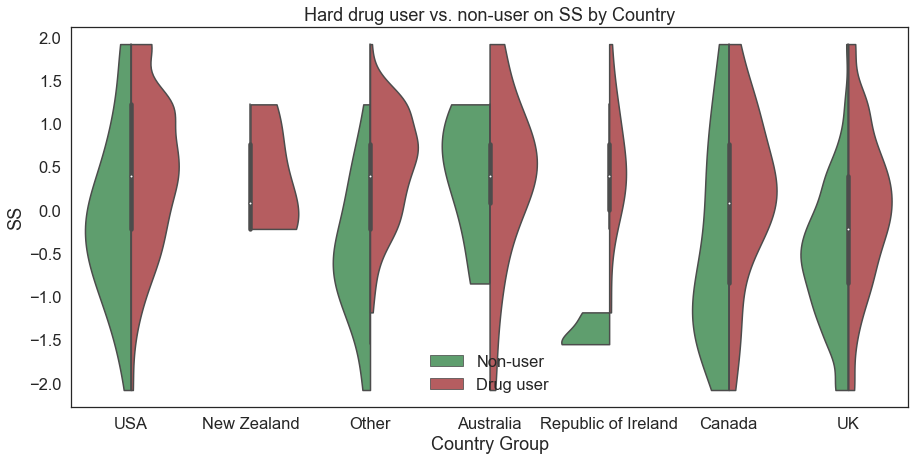

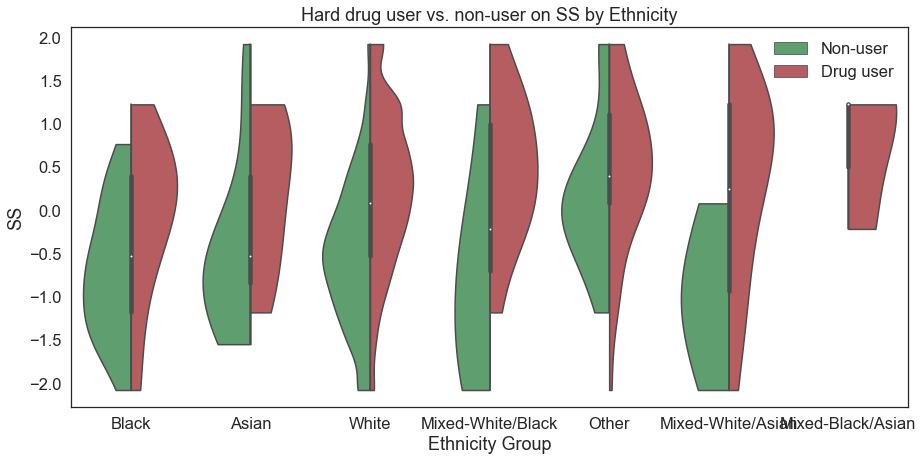

In [40]:
plot_personality(df, cat, scores)

### Correlation Heatmap

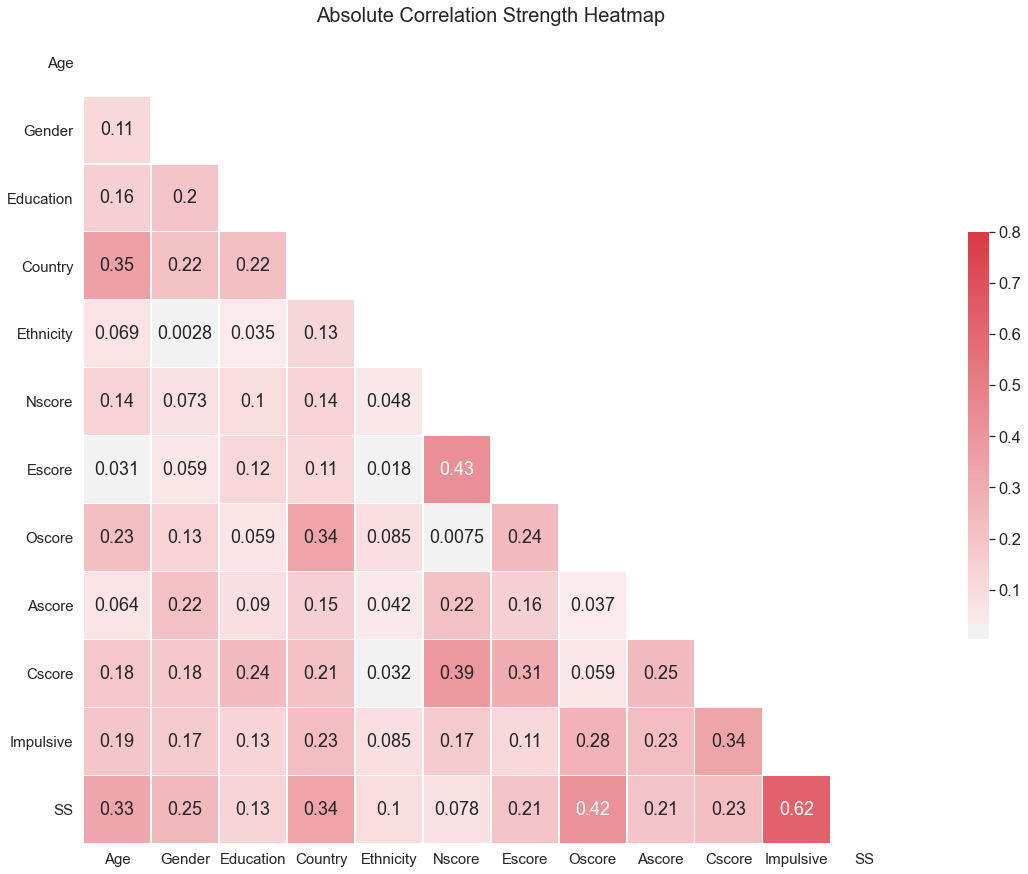

In [41]:
sns.set(style="white", font_scale = 1.5)

# Compute the correlation matrix
corr = abs(df.loc[:, "Age":"SS"].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.8, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Absolute Correlation Strength Heatmap', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("")
plt.ylabel("")
#plt.savefig("graph/correlation.png")
plt.show()

## Hypothesis Testing
### Personality Test Scores

In [16]:
# define the demographics variable
demo=cat+["Gender"]

In [17]:
# ANOVA for all demographics vs personality scores
def anova_score(demo, scores):
    for s in scores:
        print(f"ANOVA for {s}:")
        outcome=[pg.welch_anova(dv=s, between=d, data=df).iloc[0, :] for d in demo if pg.welch_anova(dv=s, between=d, data=df).loc[0, "p-unc"]<0.05]
        display(pd.DataFrame(outcome).set_index("Source"))

In [18]:
anova_score(demo, scores)

ANOVA for Nscore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   158.612159   8.674767  2.733635e-07  0.021567
Education      8   249.763530   3.912661  2.256564e-04  0.017943
Country        6    47.311106   6.380080  5.675528e-05  0.022321
Gender         1  1873.852972  10.040813  1.555795e-03  0.005326

ANOVA for Escore:


ddof1        ddof2         F     p-unc       np2
Source                                                     
Age            5   164.005827  3.114353  0.010316  0.004588
Education      8   252.503181  4.201339  0.000096  0.016681
Country        6    48.143674  6.455138  0.000048  0.016588
Gender         1  1863.168875  6.482523  0.010974  0.003445

ANOVA for Oscore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   157.657204  24.743167  2.376281e-18  0.062409
Education      8   250.060736  17.393925  1.544212e-20  0.066481
Country        6    47.727651  40.453656  4.382874e-17  0.117543
Ethnicity      6    23.237764   4.822009  2.489616e-03  0.009229
Gender         1  1865.715204  34.176341  5.928395e-09  0.017905

ANOVA for Ascore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   158.215625   3.784890  2.893274e-03  0.009745
Education      8   249.972735   3.280852  1.407494e-03  0.013769
Country        6    47.261994   8.849977  1.773833e-06  0.029216
Gender         1  1874.902388  94.563597  7.710226e-22  0.048013

ANOVA for Cscore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   159.702660  15.294375  2.841878e-12  0.040457
Education      8   249.449489  21.771635  5.024382e-25  0.087843
Country        6    47.525843  14.859077  1.776062e-09  0.048410
Gender         1  1874.591306  64.533355  1.661221e-15  0.033274

ANOVA for Impulsive:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   159.105232  17.173938  1.439963e-13  0.044885
Education      8   249.433668  10.444997  1.290355e-12  0.042917
Country        6    47.295789  17.356915  1.732540e-10  0.055423
Ethnicity      6    24.013827  12.124741  2.928179e-06  0.007751
Gender         1  1865.878709  55.462887  1.447630e-13  0.028736

ANOVA for SS:


ddof1        ddof2           F         p-unc       np2
Source                                                           
Age            5   159.214605   53.527308  2.204679e-32  0.117480
Education      8   248.033930   16.659904  1.024107e-19  0.063954
Country        6    47.500626   40.046050  5.920570e-17  0.118927
Ethnicity      6    23.178090    4.145469  5.683442e-03  0.012710
Gender         1  1852.110331  121.188793  2.397431e-27  0.060730

In [19]:
# pairwise gameshowell
def pairwise_gameshowell_scores(demo, scores):
    for s in scores:
        print(f"Pairwise Gameshowell for {s}:")
        for d in demo:
            pair=pg.pairwise_gameshowell(data=df, dv=s,between=d)
            for i in ["A", "B"]:
                pair[i]=pair[i].map(dict(zip(sorted(list(df[d].unique())), eval(d.lower()+"_lb"))))
            print(f"{d} with p<0.05:")
            display(pair[pair.pval<0.05])

In [20]:
pairwise_gameshowell_scores(demo, scores)

Pairwise Gameshowell for Nscore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
2   18-24  45-54  0.116647 -0.204961  0.321608  0.047222  two-sided  4.815804   
3   18-24  55-64  0.116647 -0.377074  0.493722  0.073529  two-sided  4.747983   
6   25-34  45-54  0.070251 -0.204961  0.275212  0.049503  two-sided  3.931196   
7   25-34  55-64  0.070251 -0.377074  0.447326  0.075014  two-sided  4.216640   
10  35-44  55-64 -0.015900 -0.377074  0.361174  0.076547  two-sided  3.336379   

            df      pval    hedges  
2   645.498082  0.001000  0.339273  
3   128.326688  0.001000  0.526516  
6   671.539628  0.001219  0.290856  
7   138.260657  0.001000  0.477101  
10  148.373587  0.011783  0.387996

Education with p<0.05:


A        B   mean(A)   mean(B)      diff        se       tail  \
19   Left at 17  Masters  0.540247 -0.171995  0.712241  0.146583  two-sided   
20   Left at 17      PhD  0.540247 -0.302828  0.843075  0.159252  two-sided   
29  Left at Uni      PhD  0.124096 -0.302828  0.426924  0.081868  two-sided   

           T          df      pval    hedges  
19  3.435800   32.947093  0.025132  0.668283  
20  3.743403   44.809225  0.008428  0.795226  
29  3.687431  126.919639  0.008050  0.423500

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail       T  \
5  USA  UK  0.217179 -0.113275  0.330454  0.037546  two-sided  6.2235   

            df   pval    hedges  
5  1029.408974  0.001  0.327555

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female -0.073282  0.072412 -0.145694  0.032512  two-sided -3.168724   

            df      pval    hedges  
0  1873.852972  0.001531 -0.146221

Pairwise Gameshowell for Escore:
Age with p<0.05:


A    B   mean(A)  mean(B)      diff        se       tail         T  \
4   18-24  65+  0.013748 -0.44466  0.458408  0.100313  two-sided  3.231328   
8   25-34  65+  0.058146 -0.44466  0.502806  0.101454  two-sided  3.504405   
13  45-54  65+  0.017184 -0.44466  0.461844  0.102596  two-sided  3.183092   

           df      pval    hedges  
4   20.487519  0.023609  0.771430  
8   21.430303  0.010364  0.840068  
13  22.394707  0.026218  0.771017

Education with p<0.05:


A        B  mean(A)   mean(B)      diff        se       tail  \
19  Left at 17  Masters -0.46388  0.201926 -0.665807  0.138955  two-sided   
20  Left at 17      PhD -0.46388  0.207116 -0.670996  0.148471  two-sided   

           T         df      pval    hedges  
19 -3.388117  32.989999  0.028929 -0.659008  
20 -3.195684  42.257204  0.047089 -0.678872

Country with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
5           USA                   UK -0.146883  0.096193 -0.243076  0.039018   
7   New Zealand            Australia -0.685344  0.067104 -0.752448  0.162831   
8   New Zealand  Republic of Ireland -0.685344  0.331121 -1.016465  0.216910   
10  New Zealand                   UK -0.685344  0.096193 -0.781537  0.134674   

         tail         T          df      pval    hedges  
5   two-sided -4.405171  972.052488  0.001000 -0.231853  
7   two-sided -3.267571    8.786685  0.044965 -1.508987  
8   two-sided -3.313584   17.885746  0.027390 -1.602172  
10  two-sided -4.103467    4.191060  0.016305 -1.838197

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail        T  \
0  Male  Female -0.060381  0.056665 -0.117046  0.032506  two-sided -2.54608   

            df      pval    hedges  
0  1863.168875  0.010895 -0.117489

Pairwise Gameshowell for Oscore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
0  18-24  25-34  0.315165 -0.032590  0.347755  0.043015  two-sided  5.716651   
1  18-24  35-44  0.315165 -0.270379  0.585544  0.044253  two-sided  9.356177   
2  18-24  45-54  0.315165 -0.225633  0.540797  0.044733  two-sided  8.548461   
3  18-24  55-64  0.315165 -0.177488  0.492652  0.074102  two-sided  4.701037   
4  18-24    65+  0.315165 -0.685602  1.000766  0.218375  two-sided  3.240521   
5  25-34  35-44 -0.032590 -0.270379  0.237789  0.048287  two-sided  3.482112   

           df      pval    hedges  
0  995.776162  0.001000  0.345291  
1  757.759820  0.001000  0.619215  
2  635.775047  0.001000  0.602239  
3  122.383601  0.001000  0.521310  
4   17.538882  0.024454  0.773625  
5  801.370242  0.006709  0.243534

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff  \
9            Left at 16           Left at 18 -0.638455 -0.089370 -0.549085   
10           Left at 16          Left at Uni -0.638455  0.307473 -0.945928   
11           Left at 16  Certificate/Diploma -0.638455 -0.292339 -0.346117   
12           Left at 16           University -0.638455 -0.028938 -0.609518   
13           Left at 16              Masters -0.638455  0.001153 -0.639609   
14           Left at 16                  PhD -0.638455  0.249240 -0.887695   
16           Left at 17          Left at Uni -0.320551  0.307473 -0.628023   
20           Left at 17                  PhD -0.320551  0.249240 -0.569790   
26          Left at Uni  Certificate/Diploma  0.307473 -0.292339  0.599811   
27          Left at Uni           University  0.307473 -0.028938  0.336410   
28          Left at Uni              Masters  0.307473  0.001153  0.306319   
32  Certificate/Diploma                  PhD -0.292339  0.249240 -0.541578   

          se       tail         T          df      pval    hedges  
9   0.106551  two-sided -3.643891  177.197301  0.009057 -0.517240  
10  0.069289  two-sided -9.653416  149.206130  0.001000 -1.064577  
11  0.074995  two-sided -3.263417  192.420242  0.032217 -0.384070  
12  0.069649  two-sided -6.188082  152.039839  0.001000 -0.685287  
13  0.071430  two-sided -6.331717  164.506831  0.001000 -0.740657  
14  0.091163  two-sided -6.885434  182.256099  0.001000 -1.004101  
16  0.110577  two-sided -4.016012   32.918750  0.003760 -0.765866  
20  0.125447  two-sided -3.211724   51.960772  0.043287 -0.682279  
26  0.052238  two-sided  8.119231  550.157653  0.001000  0.611950  
27  0.044221  two-sided  5.379337  976.444021  0.001000  0.343346  
28  0.046975  two-sided  4.610972  659.446237  0.001000  0.342303  
32  0.078984  two-sided -4.848480  163.516310  0.001000 -0.591374

Country with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail  \
4         USA  Canada  0.449361 -0.083659  0.533019  0.089927  two-sided   
5         USA      UK  0.449361 -0.289304  0.738664  0.035020  two-sided   
13      Other  Canada  0.388739 -0.083659  0.472398  0.097993  two-sided   
14      Other      UK  0.388739 -0.289304  0.678043  0.052366  two-sided   
17  Australia      UK  0.164134 -0.289304  0.453438  0.099097  two-sided   

            T           df      pval    hedges  
4    4.191205   105.944569  0.001000  0.482949  
5   14.914879  1110.348468  0.001000  0.785000  
13   3.408769   139.241216  0.012683  0.479915  
14   9.155752   162.351974  0.001000  0.888638  
17   3.235489    55.636273  0.024732  0.459405

Ethnicity with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
1  Black  White -0.472086 -0.004957 -0.467129  0.072471  two-sided -4.557833   
3  Black  Other -0.472086  0.343342 -0.815428  0.109031  two-sided -5.288353   

          df   pval    hedges  
1  35.877632  0.001 -0.800670  
3  90.846447  0.001 -1.130325

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female  0.129761 -0.136634  0.266394  0.032222  two-sided  5.846053   

            df   pval    hedges  
0  1865.715204  0.001  0.269766

Pairwise Gameshowell for Ascore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
2  18-24  45-54 -0.095034  0.197321 -0.292355  0.048333  two-sided -4.277094   
9  35-44  45-54 -0.024349  0.197321 -0.221669  0.052647  two-sided -2.977244   

           df      pval    hedges  
2  593.936412  0.001000 -0.301321  
9  618.362858  0.034968 -0.234501

Education with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail         T  \
5      USA  UK -0.168417  0.142034 -0.310451  0.037939  two-sided -5.786202   
14   Other  UK -0.299548  0.142034 -0.441582  0.064024  two-sided -4.876991   
20  Canada  UK -0.282535  0.142034 -0.424569  0.077756  two-sided -3.861009   

             df      pval    hedges  
5   1020.590779  0.001000 -0.304539  
14   145.797524  0.001000 -0.473351  
20    99.621839  0.002609 -0.430560

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female -0.218644  0.218027 -0.436671  0.031752  two-sided -9.724382   

            df   pval    hedges  
0  1874.902388  0.001 -0.448732

Pairwise Gameshowell for Cscore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
0  18-24  25-34 -0.265446  0.068363 -0.333809  0.042644  two-sided -5.535115   
1  18-24  35-44 -0.265446  0.136945 -0.402390  0.046636  two-sided -6.101142   
2  18-24  45-54 -0.265446  0.216192 -0.481637  0.047000  two-sided -7.246163   
3  18-24  55-64 -0.265446  0.136921 -0.402366  0.074346  two-sided -3.826900   
4  18-24    65+ -0.265446  0.590322 -0.855768  0.141902  two-sided -4.264339   

            df      pval    hedges  
0  1075.678100  0.001000 -0.334326  
1   785.390810  0.001000 -0.403788  
2   664.775267  0.001000 -0.510492  
3   128.671935  0.002051 -0.424375  
4    18.559674  0.001000 -1.018045

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff  \
10           Left at 16          Left at Uni -0.066840 -0.388384  0.321544   
13           Left at 16              Masters -0.066840  0.369039 -0.435879   
14           Left at 16                  PhD -0.066840  0.487473 -0.554313   
19           Left at 17              Masters -0.435462  0.369039 -0.804501   
20           Left at 17                  PhD -0.435462  0.487473 -0.922935   
22           Left at 18  Certificate/Diploma -0.301294  0.088360 -0.389654   
23           Left at 18           University -0.301294  0.153949 -0.455243   
24           Left at 18              Masters -0.301294  0.369039 -0.670333   
25           Left at 18                  PhD -0.301294  0.487473 -0.788767   
26          Left at Uni  Certificate/Diploma -0.388384  0.088360 -0.476744   
27          Left at Uni           University -0.388384  0.153949 -0.542333   
28          Left at Uni              Masters -0.388384  0.369039 -0.757423   
29          Left at Uni                  PhD -0.388384  0.487473 -0.875857   
32  Certificate/Diploma                  PhD  0.088360  0.487473 -0.399114   

          se       tail          T          df      pval    hedges  
10  0.072449  two-sided   3.138282  143.903116  0.047842  0.346089  
13  0.075102  two-sided  -4.103952  162.229186  0.001571 -0.480062  
14  0.100338  two-sided  -3.906399  178.094903  0.003406 -0.569669  
19  0.155288  two-sided  -3.663301   31.412715  0.012694 -0.712533  
20  0.168943  two-sided  -3.862913   43.137052  0.005644 -0.820614  
22  0.083503  two-sided  -3.299595  167.289045  0.029001 -0.386888  
23  0.078454  two-sided  -4.103110  134.744433  0.001623 -0.452483  
24  0.081142  two-sided  -5.841582  151.649280  0.001000 -0.680758  
25  0.104935  two-sided  -5.315114  184.027049  0.001000 -0.773253  
26  0.051967  two-sided  -6.487034  556.880269  0.001000 -0.488931  
27  0.043391  two-sided  -8.837964  978.969743  0.001000 -0.564100  
28  0.048081  two-sided -11.139193  642.774446  0.001000 -0.826936  
29  0.082092  two-sided  -7.544251  119.096161  0.001000 -0.866454  
32  0.086714  two-sided  -3.254572  144.690337  0.033734 -0.396963

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail         T  \
5     USA  UK -0.262325  0.185405 -0.447730  0.036375  two-sided -8.703656   
14  Other  UK -0.338918  0.185405 -0.524322  0.068053  two-sided -5.447974   

             df   pval    hedges  
5   1066.447421  0.001 -0.458091  
14   141.626667  0.001 -0.528769

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female -0.182039  0.181832 -0.363871  0.032029  two-sided -8.033266   

            df   pval    hedges  
0  1874.591306  0.001 -0.370695

Pairwise Gameshowell for Impulsive:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
0  18-24  25-34  0.264757 -0.024936  0.289693  0.039396  two-sided  5.199632   
1  18-24  35-44  0.264757 -0.168902  0.433659  0.043473  two-sided  7.053644   
2  18-24  45-54  0.264757 -0.247053  0.511810  0.048582  two-sided  7.449347   
3  18-24  55-64  0.264757 -0.070132  0.334889  0.070603  two-sided  3.354014   
4  18-24    65+  0.264757 -0.423812  0.688569  0.139741  two-sided  3.484248   
6  25-34  45-54 -0.024936 -0.247053  0.222117  0.050630  two-sided  3.102142   

            df      pval    hedges  
0  1036.908397  0.001000  0.314063  
1   730.642558  0.001000  0.466827  
2   534.903249  0.001000  0.524806  
3   122.609295  0.011272  0.371935  
4    18.237440  0.011939  0.831811  
6   581.133321  0.023927  0.229517

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
10   Left at 16          Left at Uni -0.139642  0.294190 -0.433831  0.078435   
25   Left at 18                  PhD  0.118793 -0.333060  0.451853  0.091691   
26  Left at Uni  Certificate/Diploma  0.294190 -0.019617  0.313807  0.052849   
27  Left at Uni           University  0.294190 -0.093530  0.387720  0.041930   
28  Left at Uni              Masters  0.294190 -0.201579  0.495769  0.047763   
29  Left at Uni                  PhD  0.294190 -0.333060  0.627250  0.070237   

         tail         T          df      pval    hedges  
10  two-sided -3.911052  133.610946  0.003478 -0.431310  
25  two-sided  3.484626  185.990734  0.015710  0.506950  
26  two-sided  4.198691  531.914843  0.001000  0.316457  
27  two-sided  6.538557  978.236898  0.001000  0.417336  
28  two-sided  7.339603  633.013656  0.001000  0.544867  
29  two-sided  6.314778  132.134641  0.001000  0.725249

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail  \
5         USA  UK  0.315990 -0.181237  0.497226  0.034287  two-sided   
14      Other  UK  0.109104 -0.181237  0.290341  0.058080  two-sided   
17  Australia  UK  0.237238 -0.181237  0.418474  0.098657  two-sided   

            T           df      pval    hedges  
5   10.254272  1132.044910  0.001000  0.539703  
14   3.534793   151.597210  0.008170  0.343080  
17   2.999350    55.615305  0.049024  0.425875

Ethnicity with p<0.05:


A                  B   mean(A)   mean(B)      diff  \
3               Black              Other -0.291656  0.275442 -0.567098   
5               Black  Mixed-Black/Asian -0.291656  1.155183 -1.446839   
10              Asian  Mixed-Black/Asian -0.058596  1.155183 -1.213779   
14              White  Mixed-Black/Asian -0.004244  1.155183 -1.159427   
17  Mixed-White/Black  Mixed-Black/Asian  0.143228  1.155183 -1.011955   
19              Other  Mixed-Black/Asian  0.275442  1.155183 -0.879741   
20  Mixed-White/Asian  Mixed-Black/Asian  0.251948  1.155183 -0.903235   

          se       tail         T         df      pval    hedges  
3   0.121086  two-sided -3.311676  86.478346  0.018317 -0.707833  
5   0.127851  two-sided -8.002034   5.861789  0.001000 -4.718177  
10  0.196763  two-sided -4.361949  18.758289  0.001000 -2.587568  
14  0.098254  two-sided -8.344067   2.114812  0.001000 -4.819553  
17  0.153735  two-sided -4.654521  10.092905  0.001000 -2.781861  
19  0.130738  two-sided -4.758166   6.486132  0.001625 -2.779187  
20  0.168785  two-sided -3.784017  12.827364  0.009027 -2.258153

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female  0.166737 -0.156667  0.323405  0.030706  two-sided  7.447341   

            df   pval    hedges  
0  1865.878709  0.001  0.343658

Pairwise Gameshowell for SS:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail  \
0   18-24  25-34  0.395553  0.009599  0.385954  0.039588  two-sided   
1   18-24  35-44  0.395553 -0.298946  0.694499  0.042408  two-sided   
2   18-24  45-54  0.395553 -0.373103  0.768656  0.043940  two-sided   
3   18-24  55-64  0.395553 -0.400817  0.796370  0.062648  two-sided   
4   18-24    65+  0.395553 -0.965851  1.361404  0.141093  two-sided   
5   25-34  35-44  0.009599 -0.298946  0.308545  0.047078  two-sided   
6   25-34  45-54  0.009599 -0.373103  0.382702  0.048462  two-sided   
7   25-34  55-64  0.009599 -0.400817  0.410416  0.065899  two-sided   
8   25-34    65+  0.009599 -0.965851  0.975450  0.142566  two-sided   
11  35-44    65+ -0.298946 -0.965851  0.666905  0.143375  two-sided   

            T          df      pval    hedges  
0    6.893796  953.493672  0.001000  0.416392  
1   11.579948  680.932542  0.001000  0.766389  
2   12.369712  548.560861  0.001000  0.871445  
3    8.988563  125.732878  0.001000  0.996765  
4    6.822876   18.025226  0.001000  1.628857  
5    4.634295  781.271113  0.001000  0.324116  
6    5.583944  661.960425  0.001000  0.413138  
7    4.403812  152.025748  0.001000  0.498279  
8    4.838093   18.788646  0.001000  1.159777  
11   3.289095   19.216732  0.020565  0.793051

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
10   Left at 16          Left at Uni -0.210690  0.366335 -0.577025  0.075084   
24   Left at 18              Masters  0.135414 -0.208283  0.343697  0.077169   
25   Left at 18                  PhD  0.135414 -0.316526  0.451939  0.092891   
26  Left at Uni  Certificate/Diploma  0.366335 -0.190839  0.557174  0.051412   
27  Left at Uni           University  0.366335 -0.097445  0.463780  0.040798   
28  Left at Uni              Masters  0.366335 -0.208283  0.574618  0.047983   
29  Left at Uni                  PhD  0.366335 -0.316526  0.682860  0.070540   

         tail         T          df      pval    hedges  
10  two-sided -5.434146  129.830311  0.001000 -0.599276  
24  two-sided  3.149315  170.128513  0.045878  0.367010  
25  two-sided  3.440276  185.863021  0.018239  0.500498  
26  two-sided  7.663207  493.622015  0.001000  0.577579  
27  two-sided  8.038167  970.713157  0.001000  0.513051  
28  two-sided  8.467892  560.558462  0.001000  0.628628  
29  two-sided  6.845080  122.822868  0.001000  0.786154

Country with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail  \
4         USA  Canada  0.421939  0.038964  0.382976  0.084159  two-sided   
5         USA      UK  0.421939 -0.294735  0.716674  0.033552  two-sided   
14      Other      UK  0.274223 -0.294735  0.568958  0.054670  two-sided   
17  Australia      UK  0.374218 -0.294735  0.668953  0.095818  two-sided   

            T           df      pval    hedges  
4    3.217759   106.821651  0.024083  0.370780  
5   15.103916  1124.192514  0.001000  0.794949  
14   7.358953   154.527042  0.001000  0.714244  
17   4.936656    55.638029  0.001000  0.700952

Ethnicity with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
1   Black  White -0.488828 -0.012285 -0.476543  0.108199  two-sided -3.114317   
3   Black  Other -0.488828  0.417476 -0.906304  0.133189  two-sided -4.811601   
12  White  Other -0.012285  0.417476 -0.429761  0.081028  two-sided -3.750398   

           df      pval    hedges  
1   33.508474  0.038803 -0.547089  
3   66.381465  0.001000 -1.028425  
12  66.268768  0.004289 -0.484629

Gender with p<0.05:


A       B   mean(A)   mean(B)     diff        se       tail          T  \
0  Male  Female  0.229239 -0.244812  0.47405  0.030449  two-sided  11.008578   

            df   pval    hedges  
0  1852.110331  0.001  0.507991

### Variety of Drug Type Used

In [21]:
# perform ANOVA on demographics variable against the number of drug variety used
def anova_demo(demo):
    outcome=[pg.welch_anova(dv="drug_use", between=d, data=df).iloc[0, :] for d in demo]
    return pd.DataFrame(outcome).set_index("Source")

In [22]:
anova_demo(demo)

ddof1        ddof2           F         p-unc       np2
Source                                                           
Age            5   209.552404  116.258358  1.911703e-58  0.140557
Education      8   247.968774   27.665282  1.606804e-30  0.108827
Country        6    47.186287   95.670353  1.050801e-24  0.256625
Ethnicity      6    23.430186    9.991659  1.667975e-05  0.018404
Gender         1  1832.375063  164.337189  4.317681e-36  0.080547

 Significant difference observed in the variety of drug used between the demographic groups!

In [23]:
# pairwise gameshowell
def pairwise_gameshowell(demo):
    for d in demo:
        pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between=d)
        for i in ["A", "B"]:
            pair[i]=pair[i].map(dict(zip(sorted(list(df[d].unique())), eval(d.lower()+"_lb"))))
        print(f"Pairwise Gameshowell for {d} with p<0.05:")
        display(pair[pair.pval<0.05])

In [24]:
pairwise_gameshowell(demo)

Pairwise Gameshowell for Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail  \
0   18-24  25-34  3.368917  2.633333  0.735583  0.106851  two-sided   
1   18-24  35-44  3.368917  1.673239  1.695677  0.103455  two-sided   
2   18-24  45-54  3.368917  1.132653  2.236264  0.099898  two-sided   
3   18-24  55-64  3.368917  0.935484  2.433433  0.131440  two-sided   
4   18-24    65+  3.368917  0.277778  3.091139  0.102274  two-sided   
5   25-34  35-44  2.633333  1.673239  0.960094  0.114023  two-sided   
6   25-34  45-54  2.633333  1.132653  1.500680  0.110806  two-sided   
7   25-34  55-64  2.633333  0.935484  1.697849  0.139910  two-sided   
8   25-34    65+  2.633333  0.277778  2.355556  0.112952  two-sided   
9   35-44  45-54  1.673239  1.132653  0.540586  0.107535  two-sided   
10  35-44  55-64  1.673239  0.935484  0.737756  0.137333  two-sided   
11  35-44    65+  1.673239  0.277778  1.395462  0.109745  two-sided   
13  45-54    65+  1.132653  0.277778  0.854875  0.106399  two-sided   
14  55-64    65+  0.935484  0.277778  0.657706  0.136446  two-sided   

            T          df      pval    hedges  
0    4.867864  996.059943  0.001000  0.294024  
1   11.589875  822.322933  0.001000  0.767046  
2   15.828880  749.069421  0.001000  1.115144  
3   13.091164  166.695331  0.001000  1.451713  
4   21.371743   52.583318  0.001000  5.102175  
5    5.953974  825.360349  0.001000  0.416413  
6    9.576548  759.628996  0.001000  0.708538  
7    8.580969  206.446666  0.001000  0.970913  
8   14.746288   75.843137  0.001000  3.534948  
9    3.554685  646.342907  0.005187  0.279983  
10   3.798584  190.787782  0.002196  0.441747  
11   8.991211   67.323850  0.001000  2.167918  
13   5.681324   59.657338  0.001000  1.376145  
14   3.408446   91.073335  0.009684  0.871635

Pairwise Gameshowell for Education with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
9    Left at 16           Left at 18  1.959184  3.191919 -1.232736  0.247924   
10   Left at 16          Left at Uni  1.959184  3.495030 -1.535846  0.187474   
22   Left at 18  Certificate/Diploma  3.191919  1.829630  1.362290  0.202399   
23   Left at 18           University  3.191919  1.966527  1.225392  0.193821   
24   Left at 18              Masters  3.191919  1.409894  1.782025  0.198483   
25   Left at 18                  PhD  3.191919  1.707865  1.484054  0.243350   
26  Left at Uni  Certificate/Diploma  3.495030  1.829630  1.665400  0.121020   
27  Left at Uni           University  3.495030  1.966527  1.528503  0.106052   
28  Left at Uni              Masters  3.495030  1.409894  2.085136  0.114349   
29  Left at Uni                  PhD  3.495030  1.707865  1.787165  0.181382   

         tail          T          df      pval    hedges  
9   two-sided  -3.515899  194.685995  0.014071 -0.499072  
10  two-sided  -5.792835  138.135908  0.001000 -0.638833  
22  two-sided   4.759327  155.079966  0.001000  0.558046  
23  two-sided   4.470527  133.227052  0.001000  0.493001  
24  two-sided   6.348568  144.800397  0.001000  0.739840  
25  two-sided   4.312243  185.818736  0.001000  0.627354  
26  two-sided   9.730791  599.711744  0.001000  0.733414  
27  two-sided  10.191400  978.954782  0.001000  0.650485  
28  two-sided  12.893957  671.598138  0.001000  0.957204  
29  two-sided   6.967142  128.714281  0.001000  0.800173

Pairwise Gameshowell for Country with p<0.05:


A       B   mean(A)   mean(B)      diff        se  \
1                   USA   Other  4.068966  2.610169  1.458796  0.162847   
4                   USA  Canada  4.068966  2.850575  1.218391  0.211879   
5                   USA      UK  4.068966  1.316092  2.752874  0.081250   
14                Other      UK  2.610169  1.316092  1.294078  0.152976   
17            Australia      UK  3.365385  1.316092  2.049293  0.207012   
19  Republic of Ireland      UK  3.150000  1.316092  1.833908  0.303215   
20               Canada      UK  2.850575  1.316092  1.534483  0.204390   

         tail          T          df      pval    hedges  
1   two-sided   6.334303  173.531374  0.001000  0.641810  
4   two-sided   4.066149  107.897373  0.001145  0.468539  
5   two-sided  23.957866  950.577135  0.001000  1.260950  
14  two-sided   5.981658  136.477359  0.001000  0.580567  
17  two-sided   6.999930   55.408646  0.001000  0.993915  
19  two-sided   4.276730   19.740853  0.001203  0.964740  
20  two-sided   5.308692   93.632578  0.001000  0.591998

Pairwise Gameshowell for Ethnicity with p<0.05:


A                  B   mean(A)   mean(B)      diff        se  \
1  Black              White  0.818182  2.363265 -1.545083  0.169287   
3  Black              Other  0.818182  3.209677 -2.391496  0.287242   
4  Black  Mixed-White/Asian  0.818182  3.650000 -2.831818  0.488053   
6  Asian              White  1.000000  2.363265 -1.363265  0.248420   
8  Asian              Other  1.000000  3.209677 -2.209677  0.339945   
9  Asian  Mixed-White/Asian  1.000000  3.650000 -2.650000  0.520817   

        tail         T         df      pval    hedges  
1  two-sided -6.453751  36.194348  0.001000 -1.133724  
3  two-sided -5.887169  92.873910  0.001000 -1.258315  
4  two-sided -4.102830  23.925024  0.001897 -1.145469  
6  two-sided -3.880416  25.389382  0.003973 -0.781382  
8  two-sided -4.596270  66.570478  0.001000 -1.079292  
9  two-sided -3.597874  29.445154  0.009433 -1.060426

Pairwise Gameshowell for Gender with p<0.05:


A       B   mean(A)  mean(B)      diff        se       tail          T  \
0  Male  Female  3.048936  1.66809  1.380847  0.076166  two-sided  12.819407   

            df   pval    hedges  
0  1832.375063  0.001  0.591552

Together with the visualization one can see the younger age group seems to be on average experimenting with more different types of drugs on this dataset.

### Hard drug user vs Non-user

In [25]:
# t-test on personality test score variables between hard drug user vs non-user
def ttest_scores(scores):
    outcome=[(s, st.ttest_ind(df[df.hard==True][s], df[df.hard==False][s], equal_var=False)[0], st.ttest_ind(df[df.hard==True][s], df[df.hard==False][s], equal_var=False)[1]) for s in scores if (st.ttest_ind(df[df.hard==True][s], df[df.hard==False][s], equal_var=False)[1]<0.05)]
    return pd.DataFrame(outcome, columns=["Source", "t-score", "p"]).set_index("Source")

In [26]:
ttest_scores(scores)

t-score             p
Source                            
Nscore      7.638947  3.858242e-14
Escore     -2.408341  1.614198e-02
Oscore     14.991695  1.974615e-47
Ascore     -7.596417  5.307700e-14
Cscore    -13.281847  3.921799e-38
Impulsive  12.948954  2.493898e-36
SS         19.381942  9.524884e-75

There are significant difference in all the personality test score between those who are hard drug user vs non-user

In [27]:
# chi-square for the likelihood of each demographics to be hard drug user vs non-user
def chi2(demo):
    outcome = [(d, st.chi2_contingency(pd.crosstab(df[d], df.hard))[0], st.chi2_contingency(pd.crosstab(df[d], df.hard))[1]) for d in demo if st.chi2_contingency(pd.crosstab(df[d], df.hard))[1]<0.05]
    return pd.DataFrame(outcome, columns=["Source", "chi2", "p"]).set_index("Source")

In [28]:
chi2(demo)

chi2             p
Source                             
Age        214.837410  1.895323e-44
Education  192.659856  2.244762e-37
Country    409.741929  2.248232e-85
Ethnicity   29.664113  4.552957e-05
Gender     127.683386  1.316560e-29

Not really a surprise to see the difference between the demographics group are significant in terms of likelihood to be a hard drug user or not

In [17]:
# define soft drugs
soft=["Choc", "Nicotine", "Alcohol", "Caff", "Mushrooms", "VSA"]

In [77]:
# the likelihood of those who are using soft drug to be a hard drug user or not
def soft_addict(soft):
    outcome=[]
    for a in soft:
        x=pd.crosstab(df[a], df.hard)
        x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), \
                                  index=list(x[x.index<2].sum().index), name="Non User"), \
                        pd.Series(data=list(x[x.index>=2].sum().values), \
                                  index=list(x[x.index>=2].sum().index), name="User")])
        stat, p, dof, expected = st.chi2_contingency(x)
        if p<0.05:
            outcome.append([a, stat, p])
    return pd.DataFrame(outcome, columns=["Source", "chi2", "p"]).set_index("Source")

In [78]:
soft_addict(soft)

chi2              p
Source                              
Nicotine   296.364790   2.040690e-66
Alcohol     17.908991   2.317238e-05
Caff        12.329441   4.458699e-04
Mushrooms  505.355762  6.496462e-112
VSA        103.906634   2.120781e-24

Just stick with Chocolate!!!

## Linear Regression Modelling
### Variety of Drug Type Used

In [20]:
# define variables for regression model
X=df.loc[:, "Age": "SS"]
y=df.drug_use

In [115]:
OLS(y,add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          6.08e-196
Time:                        23:20:27   Log-Likelihood:                -3854.4
No. Observations:                1877   AIC:                             7735.
Df Residuals:                    1864   BIC:                             7807.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7937      0.095     29.408      0.000       2.607       2.980
Age           -0.3714      0.056     -6.686      0.000      -0.480      -0.262
Gender        -0.6203      0.100     -6.215      0.000      -0.816      -0.425
Education     -0.1803      0.050     -3.641      0.000      -0.277      -0.083
Country       -0.9477      0.075    -12.672      0.000      -1.094      -0.801
Ethnicity      0.2484      0.266      0.933      0.351      -0.274       0.770
Nscore         0.2312      0.053      4.330      0.000       0.126       0.336
Escore         0.0005      0.055      0.008      0.993      -0.107       0.108
Oscore         0.2590      0.053      4.928      0.000       0.156       0.362
Ascore        -0.0772      0.048     -1.610      0.107      -0.171       0.017
Cscore        -0.1510      0.053     -2.844      0.004      -0.255      -0.047
Impulsive      0.0777      0.061      1.264      0.206      -0.043       0.198
SS             0.4284      0.066      6.521      0.000       0.300       0.557
==============================================================================
Omnibus:                       58.603   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.384
Skew:                           0.446   Prob(JB):                     1.72e-14
Kurtosis:                       3.128   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjusted R squared of 0.395 is hardly great...

Fitting linear regression

R^2: 0.39886565687664705 

Coefficients
-------------------------------------
Intercept: 2.7936749490891053
Age: -0.37
Gender: -0.62
Education: -0.18
Country: -0.95
Ethnicity: 0.25
Nscore: 0.23
Escore: 0.0
Oscore: 0.26
Ascore: -0.08
Cscore: -0.15
Impulsive: 0.08
SS: 0.43

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


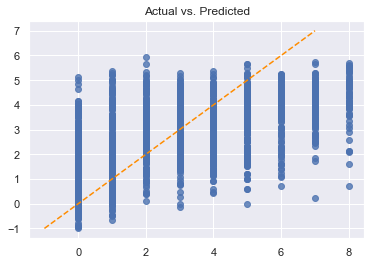

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with drug_use


Education   -0.224220
Ethnicity    0.100464
Nscore       0.199759
Escore      -0.041632
Ascore      -0.189936
Name: drug_use, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with drug_use


Age         -0.368331
Country     -0.496727
Oscore       0.325622
Cscore      -0.285526
Impulsive    0.329801
SS           0.440127
Name: drug_use, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


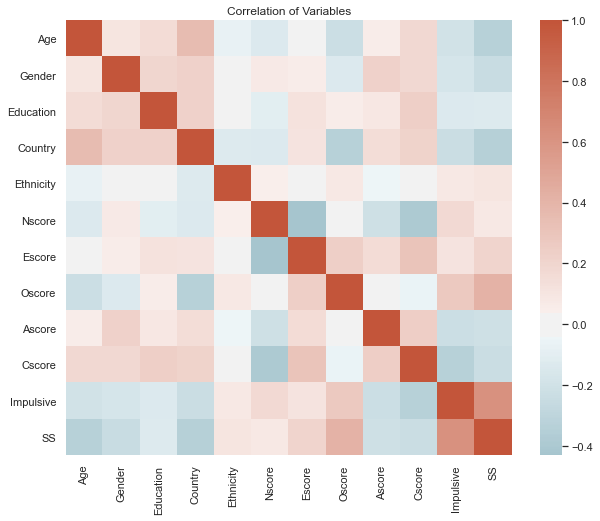

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
SS: 2.0854454203541497
Impulsive: 1.7999451906006037
Country: 1.7362591178796434
Escore: 1.567628156918577
Nscore: 1.4879051093470836
Cscore: 1.4680788487652163
Oscore: 1.4202345800381868
Ethnicity: 1.320929855097592
Age: 1.245942293485526
Gender: 1.214684848903175
Ascore: 1.1950928366886144
Education: 1.155061623206772

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.991732496578798
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residu

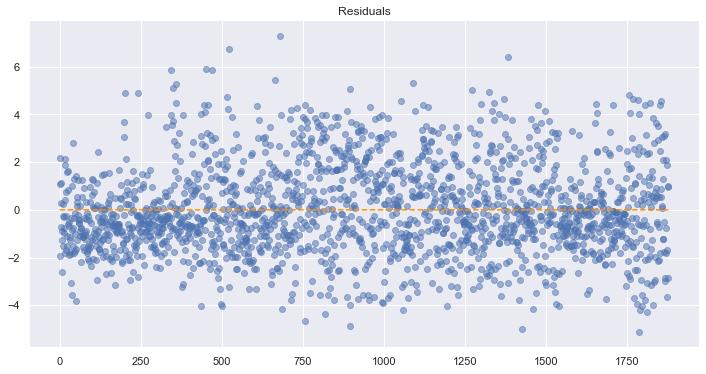

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 516.0970042529299,
 'pvalue for LM': 1.1813235807821737e-103,
 'F stats': 58.938863628271626,
 'pvalue for Fstats': 5.846988836481827e-121}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.1835282114714368e-27
Residuals are not normally distributed


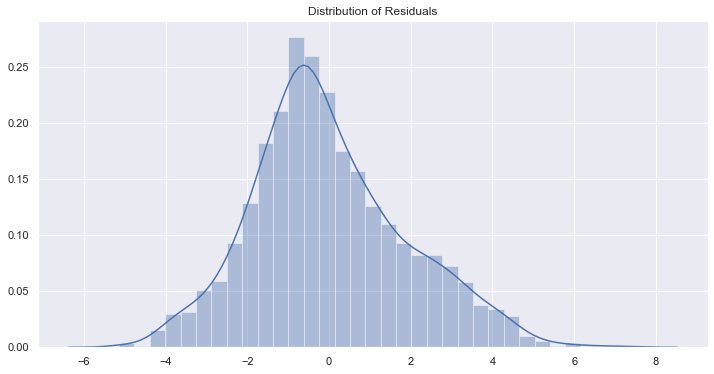


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


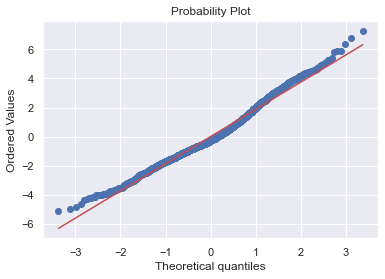

Assumption can be considered as satisfied.


{'Satisfied': ['Multicollinearity', 'Autocorrelation', 'Sub-Normality'],
 'Potentially': ['Linearity', 'Autocorrelation'],
 'Violated': ['Normality']}

In [137]:
# examine the assumptions for linear regression
import Assumptions as ass
tester=ass.Assumption_Tester_OLS(X,y)
tester.run_all()

There are different ways one can use in attempt to improve the R-Squared performance of a Linear Regression model.<br>
Below are the 3 different ways demonstrated:
- p-hacking
- Feature Selection using filter
- Feature Selection using wrapper

#### p-hacking

In [116]:
def func(column, X=X,y=y):
    if column:
        X=X.drop(column, axis=1)
    
    #buildthemodel
    model=OLS(y,add_constant(X))
    model_fit=model.fit()
    display(model_fit.summary())
    return X

In [117]:
X=func('Escore',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     112.5
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          5.60e-197
Time:                        23:20:47   Log-Likelihood:                -3854.4
No. Observations:                1877   AIC:                             7733.
Df Residuals:                    1865   BIC:                             7799.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7936      0.095     29.432      0.000       2.607       2.980
Age           -0.3714      0.055     -6.704      0.000      -0.480      -0.263
Gender        -0.6202      0.099     -6.258      0.000      -0.815      -0.426
Education     -0.1803      0.050     -3.642      0.000      -0.277      -0.083
Country       -0.9476      0.074    -12.889      0.000      -1.092      -0.803
Ethnicity      0.2484      0.266      0.934      0.351      -0.273       0.770
Nscore         0.2310      0.049      4.685      0.000       0.134       0.328
Oscore         0.2591      0.051      5.041      0.000       0.158       0.360
Ascore        -0.0772      0.048     -1.612      0.107      -0.171       0.017
Cscore        -0.1509      0.052     -2.908      0.004      -0.253      -0.049
Impulsive      0.0777      0.061      1.274      0.203      -0.042       0.197
SS             0.4284      0.065      6.621      0.000       0.302       0.555
==============================================================================
Omnibus:                       58.594   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.374
Skew:                           0.446   Prob(JB):                     1.73e-14
Kurtosis:                       3.128   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
X=func('Impulsive',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     123.5
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.10e-197
Time:                        23:21:05   Log-Likelihood:                -3855.2
No. Observations:                1877   AIC:                             7732.
Df Residuals:                    1866   BIC:                             7793.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7958      0.095     29.455      0.000       2.610       2.982
Age           -0.3675      0.055     -6.643      0.000      -0.476      -0.259
Gender        -0.6180      0.099     -6.236      0.000      -0.812      -0.424
Education     -0.1821      0.050     -3.678      0.000      -0.279      -0.085
Country       -0.9452      0.074    -12.858      0.000      -1.089      -0.801
Ethnicity      0.2563      0.266      0.964      0.335      -0.265       0.778
Nscore         0.2348      0.049      4.768      0.000       0.138       0.331
Oscore         0.2629      0.051      5.121      0.000       0.162       0.364
Ascore        -0.0822      0.048     -1.721      0.085      -0.176       0.011
Cscore        -0.1640      0.051     -3.226      0.001      -0.264      -0.064
SS             0.4720      0.055      8.588      0.000       0.364       0.580
==============================================================================
Omnibus:                       60.085   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.139
Skew:                           0.452   Prob(JB):                     7.17e-15
Kurtosis:                       3.127   Cond. No.                         9.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
X=func('Ethnicity',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     137.2
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.45e-198
Time:                        23:21:31   Log-Likelihood:                -3855.7
No. Observations:                1877   AIC:                             7731.
Df Residuals:                    1867   BIC:                             7787.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7185      0.051     53.556      0.000       2.619       2.818
Age           -0.3680      0.055     -6.651      0.000      -0.476      -0.259
Gender        -0.6145      0.099     -6.205      0.000      -0.809      -0.420
Education     -0.1828      0.049     -3.693      0.000      -0.280      -0.086
Country       -0.9509      0.073    -12.979      0.000      -1.095      -0.807
Nscore         0.2359      0.049      4.793      0.000       0.139       0.332
Oscore         0.2643      0.051      5.152      0.000       0.164       0.365
Ascore        -0.0831      0.048     -1.741      0.082      -0.177       0.011
Cscore        -0.1633      0.051     -3.212      0.001      -0.263      -0.064
SS             0.4745      0.055      8.645      0.000       0.367       0.582
==============================================================================
Omnibus:                       61.139   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.400
Skew:                           0.457   Prob(JB):                     3.81e-15
Kurtosis:                       3.121   Cond. No.                         3.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
X=func('Ascore',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     153.8
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          5.09e-199
Time:                        23:21:50   Log-Likelihood:                -3857.2
No. Observations:                1877   AIC:                             7732.
Df Residuals:                    1868   BIC:                             7782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7220      0.051     53.637      0.000       2.622       2.822
Age           -0.3634      0.055     -6.573      0.000      -0.472      -0.255
Gender        -0.6457      0.097     -6.627      0.000      -0.837      -0.455
Education     -0.1796      0.049     -3.630      0.000      -0.277      -0.083
Country       -0.9608      0.073    -13.146      0.000      -1.104      -0.817
Nscore         0.2503      0.049      5.156      0.000       0.155       0.345
Oscore         0.2505      0.051      4.939      0.000       0.151       0.350
Cscore        -0.1725      0.051     -3.409      0.001      -0.272      -0.073
SS             0.4906      0.054      9.061      0.000       0.384       0.597
==============================================================================
Omnibus:                       61.971   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.392
Skew:                           0.460   Prob(JB):                     2.32e-15
Kurtosis:                       3.120   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After all those p-hacking, the results is... worse! Let's take another approach

In [121]:
# reset X
X=df.loc[:, "Age": "SS"]

#### Feature Selection using filter

In [134]:
selection=SelectKBest(f_regression, k=9)
X_new=selection.fit_transform(X,y)
OLS(y,add_constant(X_new)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     137.0
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          2.35e-198
Time:                        23:32:27   Log-Likelihood:                -3856.2
No. Observations:                1877   AIC:                             7732.
Df Residuals:                    1867   BIC:                             7788.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7220      0.051     53.652      0.000       2.623       2.822
x1            -0.3681      0.055     -6.648      0.000      -0.477      -0.259
x2            -0.6462      0.097     -6.633      0.000      -0.837      -0.455
x3            -0.1778      0.049     -3.593      0.000      -0.275      -0.081
x4            -0.9626      0.073    -13.173      0.000      -1.106      -0.819
x5             0.2451      0.049      5.036      0.000       0.150       0.341
x6             0.2472      0.051      4.870      0.000       0.148       0.347
x7            -0.1571      0.052     -3.039      0.002      -0.259      -0.056
x8             0.0872      0.061      1.433      0.152      -0.032       0.206
x9             0.4406      0.064      6.842      0.000       0.314       0.567
==============================================================================
Omnibus:                       60.147   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.219
Skew:                           0.452   Prob(JB):                     6.88e-15
Kurtosis:                       3.123   Cond. No.                         3.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Best with k=9, didn't make an improvement at all, time for another attempt using another method (even though it is most likely to yield similar results)

#### Feature Selection using wrapper

In [154]:
estimator=LinearRegression()
selector=RFE(estimator, 10)
selector=selector.fit(X,y)
OLS(y, add_constant(X[X.columns[selector.support_]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               drug_use   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     123.4
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.78e-197
Time:                        23:42:35   Log-Likelihood:                -3855.7
No. Observations:                1877   AIC:                             7733.
Df Residuals:                    1866   BIC:                             7794.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7992      0.095     29.498      0.000       2.613       2.985
Age           -0.3676      0.055     -6.639      0.000      -0.476      -0.259
Gender        -0.6494      0.097     -6.662      0.000      -0.841      -0.458
Education     -0.1772      0.049     -3.581      0.000      -0.274      -0.080
Country       -0.9567      0.073    -13.046      0.000      -1.101      -0.813
Ethnicity      0.2563      0.266      0.963      0.336      -0.266       0.778
Nscore         0.2439      0.049      5.009      0.000       0.148       0.339
Oscore         0.2459      0.051      4.843      0.000       0.146       0.345
Cscore        -0.1580      0.052     -3.056      0.002      -0.259      -0.057
Impulsive      0.0857      0.061      1.409      0.159      -0.034       0.205
SS             0.4387      0.064      6.809      0.000       0.312       0.565
==============================================================================
Omnibus:                       59.157   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.039
Skew:                           0.448   Prob(JB):                     1.24e-14
Kurtosis:                       3.128   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Best with 10 features, as expected no improvements made to the original linear regression

The best model obtained from the data in predicting how many different type of drugs an individual would consume using demographic and personal test score information is at R-Squared 0.39.<br>
We will instead explore models to determine whether one would be a hard drug user by using demographic and personal test scores.

## Modelling
### Hard Drugs User vs. Non-user

In [157]:
# check whether the data is balanced
df.hard.value_counts(normalize=True)

True     0.639318
False    0.360682
Name: hard, dtype: float64

Slight imbalanced, but should be ok as it is better than the ratio 1:4

#### Train & Test Data

In [18]:
iv = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
dv = ['hard']
X_train, X_test,y_train,y_test = train_test_split(df[iv], df[dv], test_size= 0.3, random_state=17, stratify=df[dv])
y_train=y_train.values.astype(bool).ravel()
y_test=y_test.values.astype(bool).ravel()

In [160]:
df[iv].describe()

0              Age       Gender    Education      Country    Ethnicity  \
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean      0.037577    -0.000771    -0.000984     0.358984    -0.309728   
std       0.878387     0.482588     0.949831     0.699707     0.166220   
min      -0.951970    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.951970    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.078540    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.497880     0.482460     0.454680     0.960820    -0.316850   
max       2.591710     0.482460     1.984370     0.960820     1.907250   

0           Nscore       Escore       Oscore       Ascore       Cscore  \
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean     -0.000551    -0.001951    -0.003224    -0.000657    -0.000394   
std       0.998442     0.997418     0.995691     0.996689     0.997657   
min      -3.464360    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.760960     0.584890   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

0        Impulsive           SS  
count  1877.000000  1877.000000  
mean      0.005293    -0.007408  
std       0.954148     0.962074  
min      -2.555240    -2.078480  
25%      -0.711260    -0.525930  
50%      -0.217120     0.079870  
75%       0.529750     0.765400  
max       2.901610     1.921730

May require standardizing the variables

In [19]:
# list of models to construct
model_list=["LogisticRegression", "SVC", "NuSVC", "GaussianNB", "DecisionTreeClassifier", "RandomForestClassifier", "AdaBoostClassifier", "KNeighborsClassifier", "CatBoostClassifier"]
#"XGBClassifier"

dct={"LogisticRegression": {"LogisticRegression": "LogisticRegression(max_iter=1e8)", "LogisticRegressionBalanced": "LogisticRegression(max_iter=1e8, class_weight='balanced')"}, "SVC": "SVC(probability= True)", "NuSVC": "NuSVC(nu=0.1, probability= True)","RandomForestClassifier" : {"RandomForestClassifier":"RandomForestClassifier()", "RandomForestClassifierBalanced":"RandomForestClassifier(class_weight='balanced')"}, "KNeighborsClassifier": {"KNeighborsClassifier":"KNeighborsClassifier(n_neighbors={})","KNeighborsClassifierWeightedDistance": "KNeighborsClassifier(weights='distance')"}}

#### Base Models

In [240]:
def fit_model(model, m, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    if m=="CatBoostClassifier":
        y_pred=[eval(i) for i in y_pred]
    conf=confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    #contruct confusion matrix table
    
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    c=pd.DataFrame(conf, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])
    c.index.name=m
    
    if m!="CatBoostClassifier":
        cm = plot_confusion_matrix(model, X_test, y_test, display_labels=["Non-User", "User"], cmap=plt.cm.Blues, normalize="true")
        cm.ax_.set_title(f"{m} Normalized confusion matrix")
        plt.show()    
    else:
        display(c)
    
    model_roc = roc_auc_score(y_test,  y_pred)
    fpr,tpr,thresholds=roc_curve(y_test, model.predict_proba(X_test)[:,1])
    return [m ,acc.round(2),pr.round(2),rec.round(2),f1.round(2), model_roc.round(2)], [fpr,tpr], c

In [241]:
def knn_elbow(knn, X_train, X_test, y_train, y_test):
    error_rate = []
    from math import log10, floor
    def round_1sf(x):
        return round(x, -int(floor(log10(abs(x)))))
    upper = int(round_1sf(X_train.shape[0]**0.5))
    for i in range(1,upper):
        model=eval(knn.format(i))
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    print("Elbow curve for k")
    plt.figure(figsize=(10,6))
    plt.plot(range(1,upper),error_rate,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
    return int(error_rate.index(min(error_rate)))

In [242]:
def classification_models(models, X_train, X_test, y_train, y_test):
    performance=[]
    ROC=[]
    confusion=[]
    for m in models:
        if m in dct.keys() and type(dct[m])==str:
            model=eval(dct[m])
            p, r, c =fit_model(model, m, X_train, X_test, y_train, y_test)
            performance.append(p)
            ROC.append(r)
            confusion.append(c)
            
        elif m in dct.keys() and type(dct[m])==dict:
            for x in list(dct[m].keys()):
                if x == "KNeighborsClassifier":
                    i=knn_elbow(dct[m][x], X_train, X_test, y_train, y_test)
                    model=eval(dct[m][x].format(i))
                else:
                    model=eval(dct[m][x])
                p, r, c = fit_model(model, x, X_train, X_test, y_train, y_test)
                performance.append(p)
                ROC.append(r)
                confusion.append(c)

        else:
            model=eval(m)()
            p, r, c= fit_model(model, m, X_train, X_test, y_train, y_test)
            performance.append(p)
            ROC.append(r)
            confusion.append(c)
        
    perf=pd.DataFrame(performance, columns=["Model", "Accuracy", "Recall", "Precision", "F1", "ROC"]).set_index("Model")
    display(perf)
    return perf, ROC, confusion

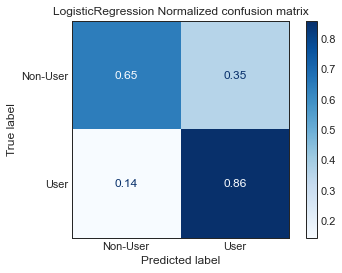

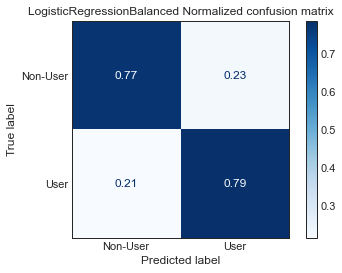

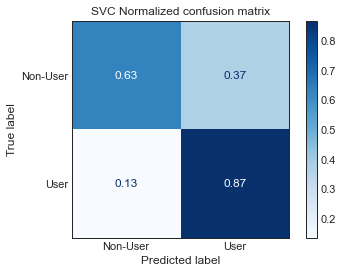

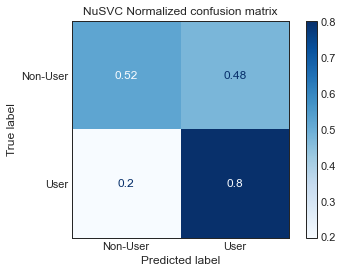

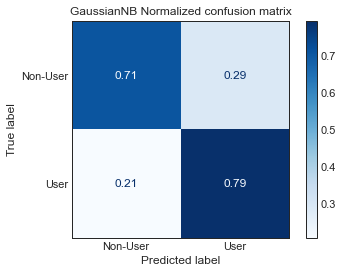

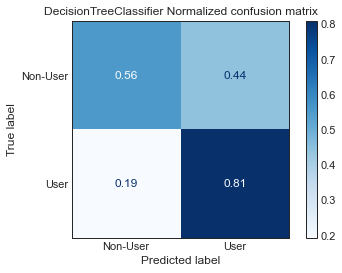

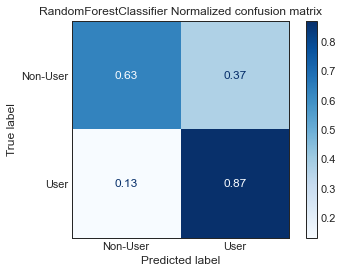

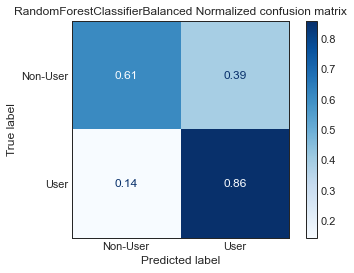

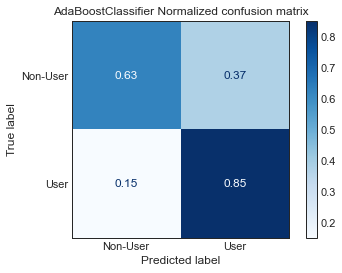

Elbow curve for k


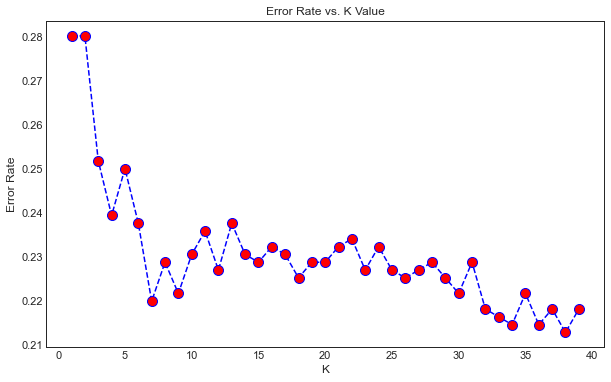

Minimum error:- 0.2127659574468085 at K = 37


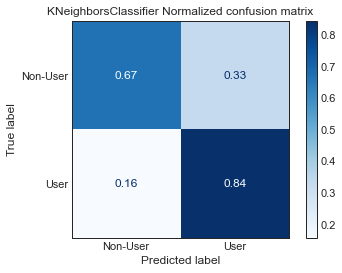

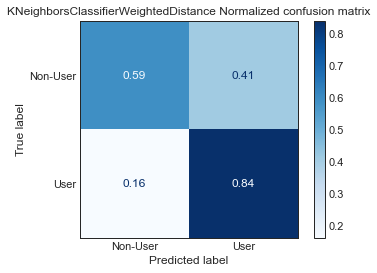

Learning rate set to 0.018096
0:	learn: 0.6827556	total: 34ms	remaining: 34s
1:	learn: 0.6728144	total: 36.7ms	remaining: 18.3s
2:	learn: 0.6637463	total: 40.5ms	remaining: 13.5s
3:	learn: 0.6550671	total: 43.2ms	remaining: 10.8s
4:	learn: 0.6451534	total: 46.3ms	remaining: 9.22s
5:	learn: 0.6362242	total: 49.2ms	remaining: 8.15s
6:	learn: 0.6281177	total: 52ms	remaining: 7.38s
7:	learn: 0.6199226	total: 54.9ms	remaining: 6.81s
8:	learn: 0.6121677	total: 57.9ms	remaining: 6.38s
9:	learn: 0.6045944	total: 61.3ms	remaining: 6.07s
10:	learn: 0.5979500	total: 64.4ms	remaining: 5.79s
11:	learn: 0.5919746	total: 76ms	remaining: 6.25s
12:	learn: 0.5846409	total: 78.8ms	remaining: 5.99s
13:	learn: 0.5779517	total: 81.5ms	remaining: 5.74s
14:	learn: 0.5716329	total: 84.6ms	remaining: 5.55s
15:	learn: 0.5653180	total: 90.2ms	remaining: 5.55s
16:	learn: 0.5605044	total: 93ms	remaining: 5.38s
17:	learn: 0.5542560	total: 96.9ms	remaining: 5.28s
18:	learn: 0.5487696	total: 99.8ms	remaining: 5.15s
19

Predicted Non-User  Predicted User
CatBoostClassifier                                    
Actual Non-User                    124              79
Actual User                         47             314

Accuracy  Recall  Precision    F1   ROC
Model                                                                        
LogisticRegression                        0.78    0.81       0.86  0.83  0.75
LogisticRegressionBalanced                0.78    0.86       0.79  0.82  0.78
SVC                                       0.78    0.81       0.87  0.84  0.75
NuSVC                                     0.70    0.75       0.80  0.78  0.66
GaussianNB                                0.76    0.83       0.79  0.81  0.75
DecisionTreeClassifier                    0.72    0.76       0.81  0.79  0.68
RandomForestClassifier                    0.78    0.81       0.87  0.84  0.75
RandomForestClassifierBalanced            0.77    0.80       0.86  0.83  0.73
AdaBoostClassifier                        0.77    0.80       0.85  0.83  0.74
KNeighborsClassifier                      0.78    0.82       0.84  0.83  0.76
KNeighborsClassifierWeightedDistance      0.75    0.78       0.84  0.81  0.72
CatBoostClassifier                        0.78    0.80       0.87  0.83  0.74

In [243]:
performance, ROC, confusion = classification_models(model_list, X_train, X_test, y_train, y_test)

In [32]:
def plot_ROC(performance, ROC, names):
    plt.style.use('seaborn-whitegrid')
    sns.set(style="white", font_scale = 1)
    graph_name="graph/ROC {}.png"
    
    for i in range(len(names)):
        f, ax = plt.subplots(figsize=(10, 10))
        plt.clf()
        plt.plot(ROC[i][0],ROC[i][1], label=f'ROC curve={performance.iloc[i]["ROC"]}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{names[i]} ROC ')
        plt.legend(loc="lower right")
        #plt.savefig(graph_name.format(names[i]) , transparent=True)
        plt.show()            

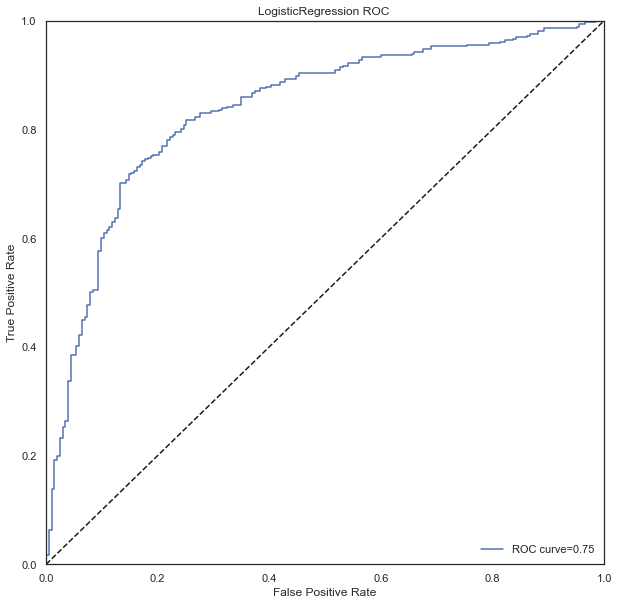

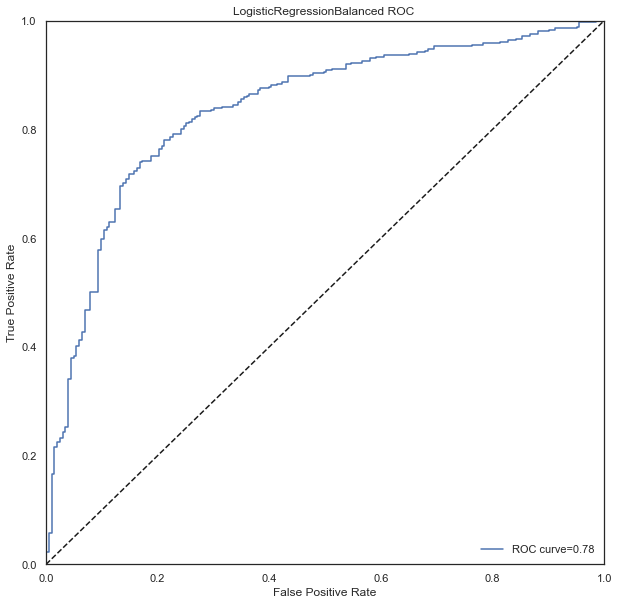

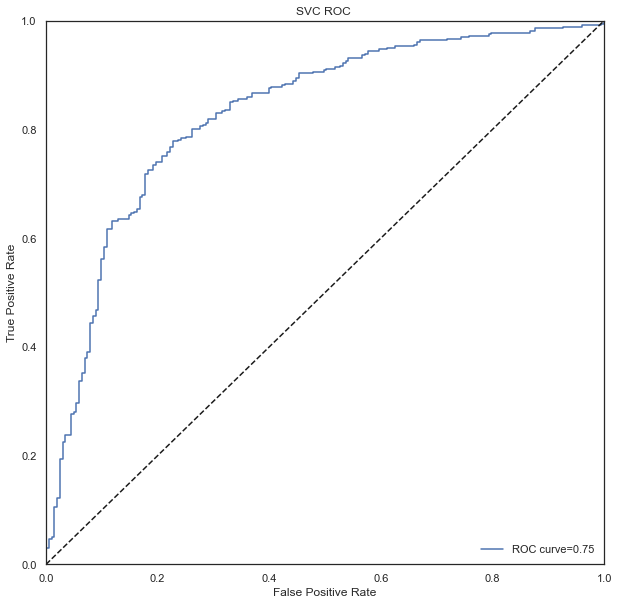

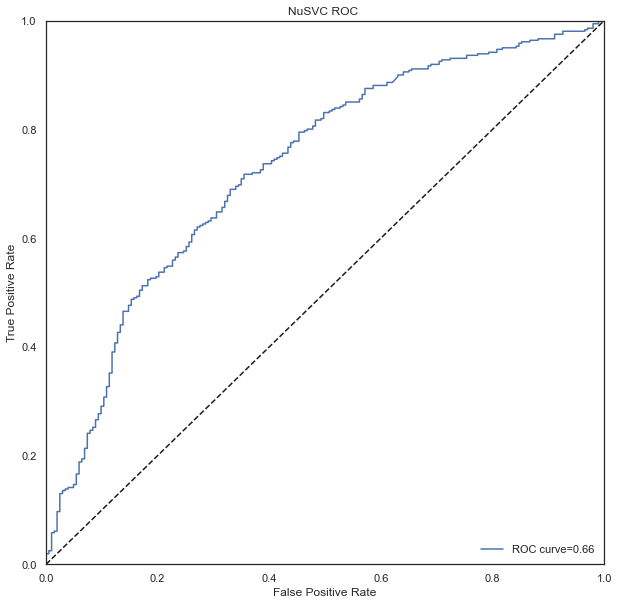

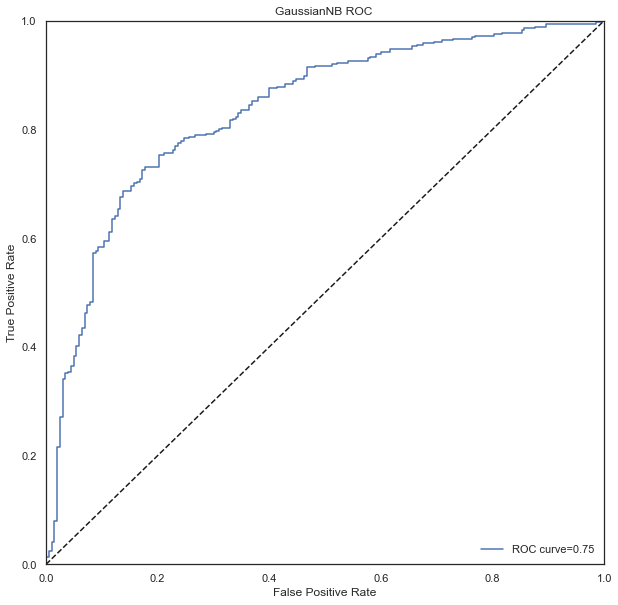

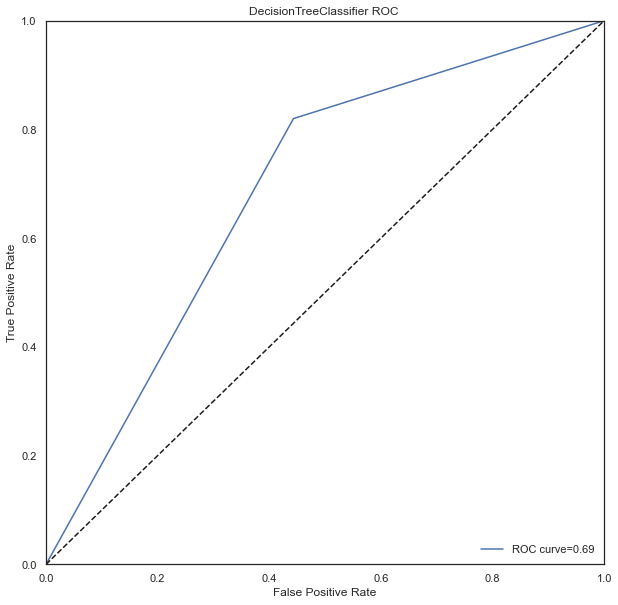

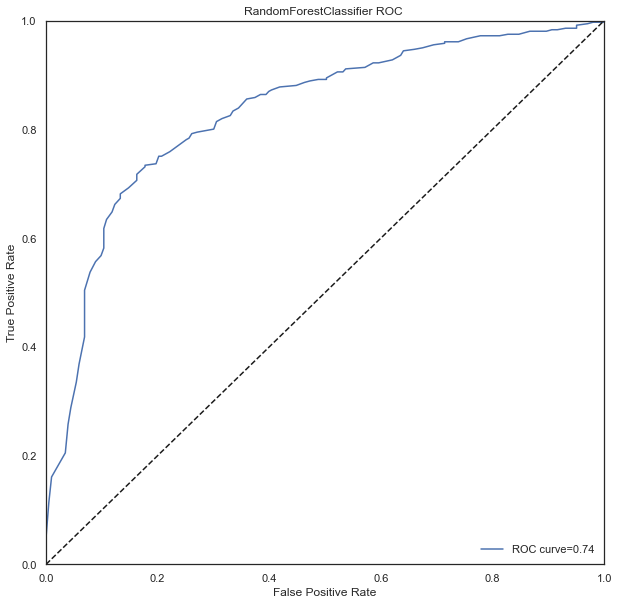

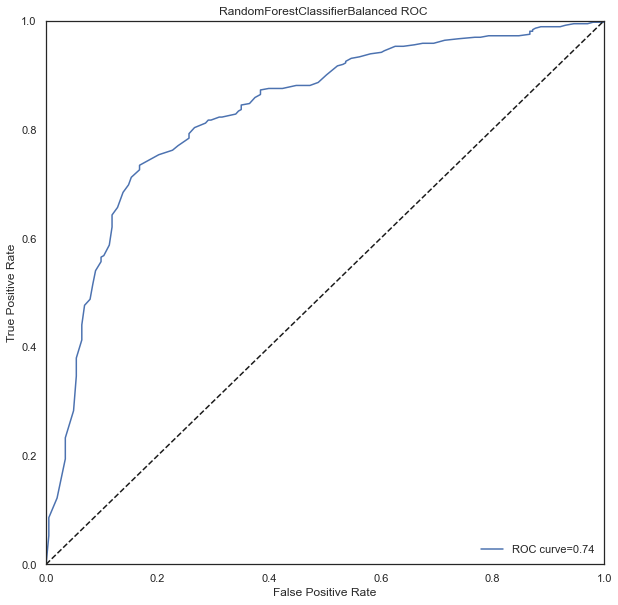

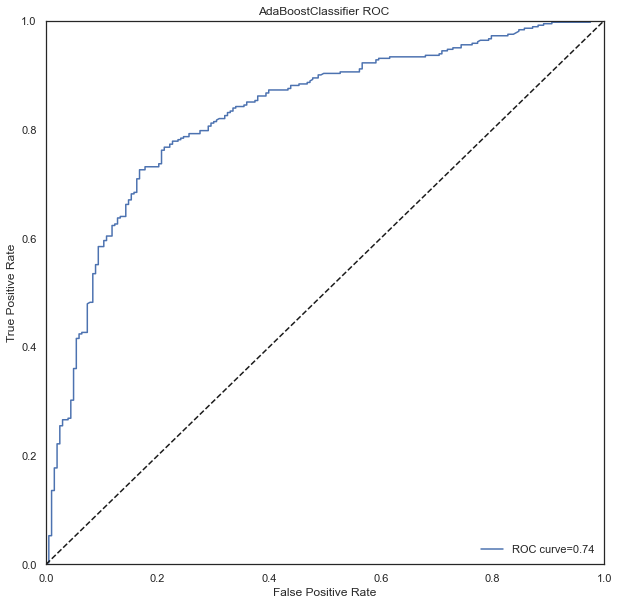

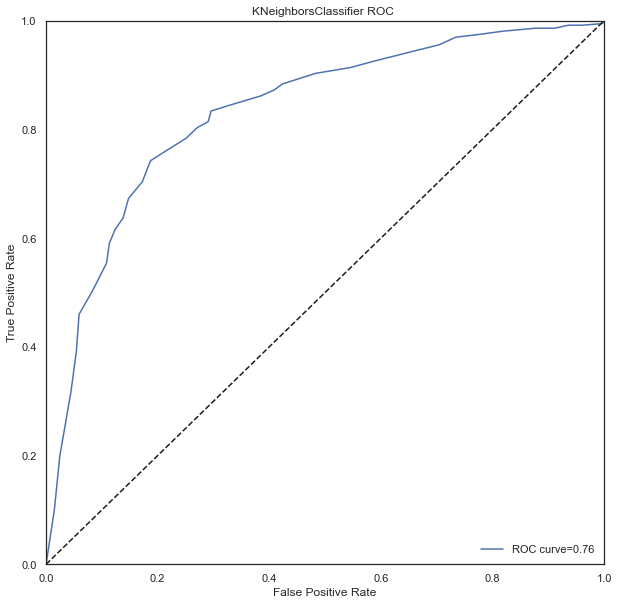

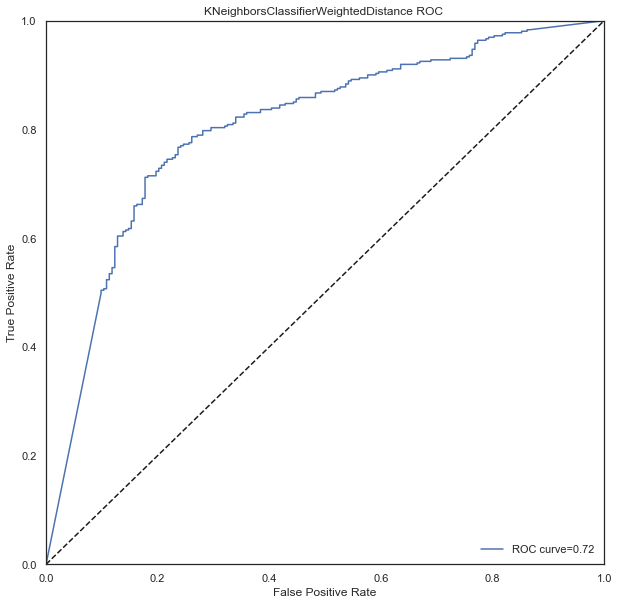

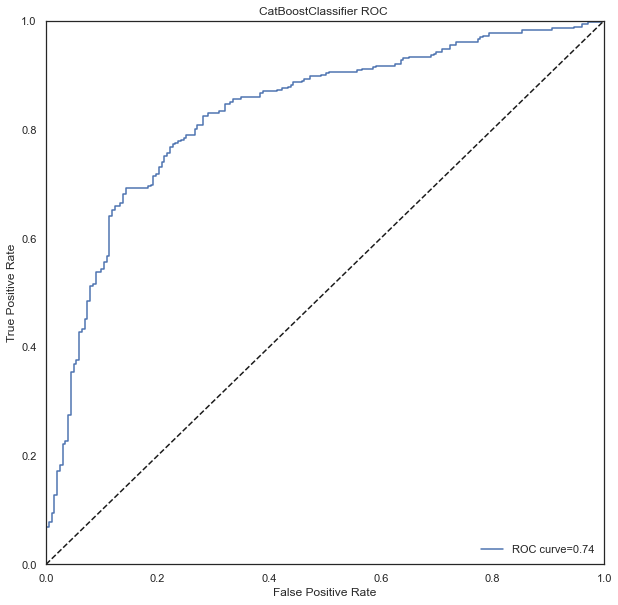

In [38]:
plot_ROC(performance, ROC, performance.index)

#### PCA

In [180]:
pca=PCA(0.85).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [49]:
pca.explained_variance_ratio_.round(2)

array([0.26, 0.2 , 0.1 , 0.1 , 0.08, 0.06, 0.06])

Predicted Non-User  Predicted User
LogisticRegression                                    
Actual Non-User                    127              76
Actual User                         50             311

Predicted Non-User  Predicted User
LogisticRegressionBalanced                                    
Actual Non-User                            154              49
Actual User                                 77             284

Predicted Non-User  Predicted User
SVC                                                
Actual Non-User                 118              85
Actual User                      48             313

Predicted Non-User  Predicted User
NuSVC                                              
Actual Non-User                 115              88
Actual User                      85             276

Predicted Non-User  Predicted User
GaussianNB                                         
Actual Non-User                 129              74
Actual User                      52             309

Predicted Non-User  Predicted User
DecisionTreeClassifier                                    
Actual Non-User                        121              82
Actual User                             87             274

Predicted Non-User  Predicted User
RandomForestClassifier                                    
Actual Non-User                        122              81
Actual User                             51             310

Predicted Non-User  Predicted User
RandomForestClassifierBalanced                                    
Actual Non-User                                123              80
Actual User                                     44             317

Predicted Non-User  Predicted User
AdaBoostClassifier                                    
Actual Non-User                    127              76
Actual User                         54             307

Elbow curve for k


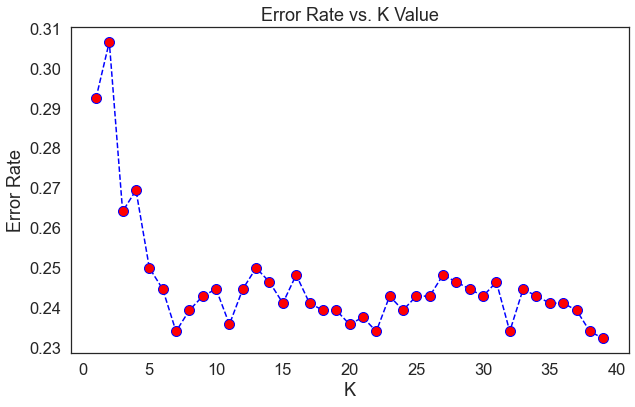

Minimum error:- 0.2322695035460993 at K = 38


Predicted Non-User  Predicted User
KNeighborsClassifier                                    
Actual Non-User                      127              76
Actual User                           56             305

Predicted Non-User  Predicted User
KNeighborsClassifierWeightedDistance                                    
Actual Non-User                                      117              86
Actual User                                           56             305

Learning rate set to 0.018096
0:	learn: 0.6844009	total: 2.17ms	remaining: 2.17s
1:	learn: 0.6758050	total: 3.87ms	remaining: 1.93s
2:	learn: 0.6674095	total: 5.41ms	remaining: 1.8s
3:	learn: 0.6594863	total: 6.96ms	remaining: 1.73s
4:	learn: 0.6531204	total: 8.31ms	remaining: 1.65s
5:	learn: 0.6464710	total: 9.81ms	remaining: 1.63s
6:	learn: 0.6402704	total: 11.4ms	remaining: 1.61s
7:	learn: 0.6341053	total: 13ms	remaining: 1.61s
8:	learn: 0.6267657	total: 14.6ms	remaining: 1.6s
9:	learn: 0.6206304	total: 16.3ms	remaining: 1.61s
10:	learn: 0.6132538	total: 18ms	remaining: 1.61s
11:	learn: 0.6074110	total: 19.7ms	remaining: 1.62s
12:	learn: 0.6025861	total: 21.2ms	remaining: 1.61s
13:	learn: 0.5975829	total: 22.6ms	remaining: 1.59s
14:	learn: 0.5919496	total: 24.3ms	remaining: 1.59s
15:	learn: 0.5864890	total: 25.8ms	remaining: 1.58s
16:	learn: 0.5821566	total: 27.3ms	remaining: 1.58s
17:	learn: 0.5780144	total: 28.8ms	remaining: 1.57s
18:	learn: 0.5742108	total: 30.6ms	remaining: 1.58

Predicted Non-User  Predicted User
CatBoostClassifier                                    
Actual Non-User                    121              82
Actual User                         49             312

Accuracy  Recall  Precision    F1   ROC
Model                                                                        
LogisticRegression                        0.78    0.80       0.86  0.83  0.74
LogisticRegressionBalanced                0.78    0.85       0.79  0.82  0.77
SVC                                       0.76    0.79       0.87  0.82  0.72
NuSVC                                     0.69    0.76       0.76  0.76  0.67
GaussianNB                                0.78    0.81       0.86  0.83  0.75
DecisionTreeClassifier                    0.70    0.77       0.76  0.76  0.68
RandomForestClassifier                    0.77    0.79       0.86  0.82  0.73
RandomForestClassifierBalanced            0.78    0.80       0.88  0.84  0.74
AdaBoostClassifier                        0.77    0.80       0.85  0.83  0.74
KNeighborsClassifier                      0.77    0.80       0.84  0.82  0.74
KNeighborsClassifierWeightedDistance      0.75    0.78       0.84  0.81  0.71
CatBoostClassifier                        0.77    0.79       0.86  0.83  0.73

In [50]:
pca_performance, pca_ROC, pca_confusion = classification_models(model_list, X_train_pca, X_test_pca, y_train, y_test)

Performance for everything dropped except for NuSVC!! Therefore proceeding with previous base models instead.

#### Feature Importance

In [145]:
# use GradientBoostingClassifier to examine feature importance
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
FI=pd.DataFrame({'importance':model.feature_importances_},index=X_train.columns)
FI.index.name="variables"
FI.sort_values('importance',ascending=False)

importance
variables            
Country      0.391926
SS           0.159283
Oscore       0.097019
Cscore       0.085165
Escore       0.047432
Age          0.046571
Education    0.045159
Ascore       0.037814
Nscore       0.036870
Gender       0.021367
Impulsive    0.018682
Ethnicity    0.012711

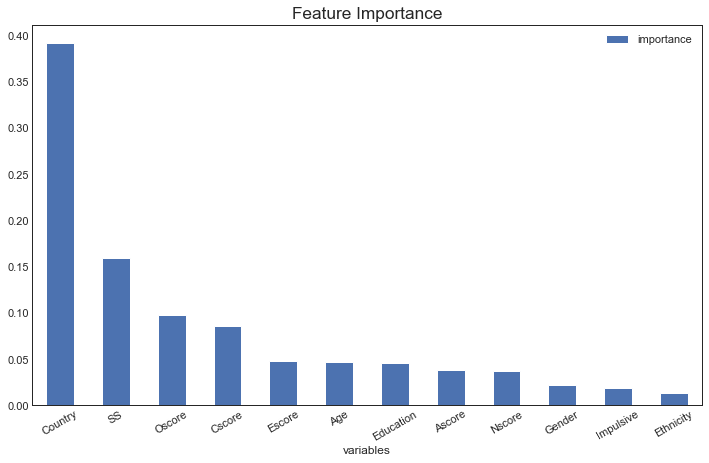

In [147]:
FI.sort_values('importance',ascending=False).plot.bar(figsize=(12,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')
plt.show()

#### Feature Scaling

Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features.

Normalization typically means rescales the values into a range of [0,1], when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

##### Normalization

In [163]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

Predicted Non-User  Predicted User
LogisticRegression                                    
Actual Non-User                    132              71
Actual User                         53             308

Predicted Non-User  Predicted User
LogisticRegressionBalanced                                    
Actual Non-User                            157              46
Actual User                                 79             282

Predicted Non-User  Predicted User
SVC                                                
Actual Non-User                 128              75
Actual User                      49             312

Predicted Non-User  Predicted User
NuSVC                                              
Actual Non-User                 103             100
Actual User                      70             291

Predicted Non-User  Predicted User
GaussianNB                                         
Actual Non-User                 144              59
Actual User                      75             286

Predicted Non-User  Predicted User
DecisionTreeClassifier                                    
Actual Non-User                        111              92
Actual User                             66             295

Predicted Non-User  Predicted User
RandomForestClassifier                                    
Actual Non-User                        127              76
Actual User                             49             312

Predicted Non-User  Predicted User
RandomForestClassifierBalanced                                    
Actual Non-User                                122              81
Actual User                                     45             316

Predicted Non-User  Predicted User
AdaBoostClassifier                                    
Actual Non-User                    127              76
Actual User                         54             307

Elbow curve for k


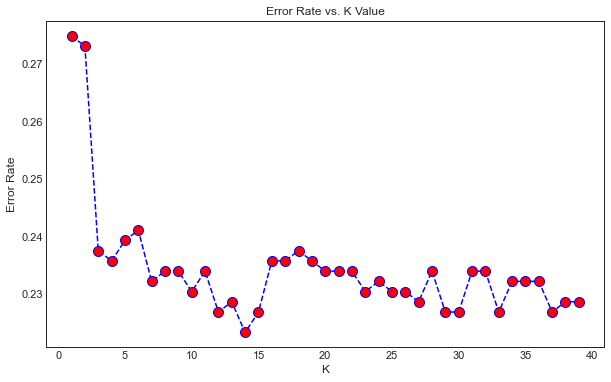

Minimum error:- 0.22340425531914893 at K = 13


Predicted Non-User  Predicted User
KNeighborsClassifier                                    
Actual Non-User                      132              71
Actual User                           58             303

Predicted Non-User  Predicted User
KNeighborsClassifierWeightedDistance                                    
Actual Non-User                                      123              80
Actual User                                           54             307

Learning rate set to 0.018096
0:	learn: 0.6827556	total: 2.13ms	remaining: 2.13s
1:	learn: 0.6728144	total: 3.28ms	remaining: 1.64s
2:	learn: 0.6637463	total: 4.41ms	remaining: 1.47s
3:	learn: 0.6550671	total: 5.4ms	remaining: 1.34s
4:	learn: 0.6451534	total: 6.65ms	remaining: 1.32s
5:	learn: 0.6362242	total: 7.66ms	remaining: 1.27s
6:	learn: 0.6281177	total: 8.76ms	remaining: 1.24s
7:	learn: 0.6199226	total: 9.75ms	remaining: 1.21s
8:	learn: 0.6121677	total: 11.2ms	remaining: 1.23s
9:	learn: 0.6045944	total: 12.3ms	remaining: 1.22s
10:	learn: 0.5979500	total: 13.3ms	remaining: 1.2s
11:	learn: 0.5919746	total: 14.4ms	remaining: 1.19s
12:	learn: 0.5846409	total: 15.7ms	remaining: 1.19s
13:	learn: 0.5779517	total: 16.8ms	remaining: 1.19s
14:	learn: 0.5716329	total: 17.9ms	remaining: 1.17s
15:	learn: 0.5653180	total: 19ms	remaining: 1.17s
16:	learn: 0.5605044	total: 20.1ms	remaining: 1.16s
17:	learn: 0.5542560	total: 21.3ms	remaining: 1.16s
18:	learn: 0.5487696	total: 22.5ms	remaining: 1.

Predicted Non-User  Predicted User
CatBoostClassifier                                    
Actual Non-User                    124              79
Actual User                         47             314

Accuracy  Recall  Precision    F1   ROC
Model                                                                        
LogisticRegression                        0.78    0.81       0.85  0.83  0.75
LogisticRegressionBalanced                0.78    0.86       0.78  0.82  0.78
SVC                                       0.78    0.81       0.86  0.83  0.75
NuSVC                                     0.70    0.74       0.81  0.77  0.66
GaussianNB                                0.76    0.83       0.79  0.81  0.75
DecisionTreeClassifier                    0.72    0.76       0.82  0.79  0.68
RandomForestClassifier                    0.78    0.80       0.86  0.83  0.74
RandomForestClassifierBalanced            0.78    0.80       0.88  0.83  0.74
AdaBoostClassifier                        0.77    0.80       0.85  0.83  0.74
KNeighborsClassifier                      0.77    0.81       0.84  0.82  0.74
KNeighborsClassifierWeightedDistance      0.76    0.79       0.85  0.82  0.73
CatBoostClassifier                        0.78    0.80       0.87  0.83  0.74

In [164]:
norm_performance, norm_ROC, norm_confusion = classification_models(model_list, X_train_norm, X_test_norm, y_train, y_test)

##### PCA

In [179]:
pca_norm=PCA(0.85).fit(X_train_norm)
X_train_norm_pca=pca.transform(X_train_norm)
X_test_norm_pca=pca.transform(X_test_norm)

Predicted Non-User  Predicted User
LogisticRegression                                    
Actual Non-User                    127              76
Actual User                         57             304

Predicted Non-User  Predicted User
LogisticRegressionBalanced                                    
Actual Non-User                            152              51
Actual User                                 86             275

Predicted Non-User  Predicted User
SVC                                                
Actual Non-User                 130              73
Actual User                      66             295

Predicted Non-User  Predicted User
NuSVC                                              
Actual Non-User                  96             107
Actual User                     122             239

Predicted Non-User  Predicted User
GaussianNB                                         
Actual Non-User                 124              79
Actual User                      59             302

Predicted Non-User  Predicted User
DecisionTreeClassifier                                    
Actual Non-User                        114              89
Actual User                             75             286

Predicted Non-User  Predicted User
RandomForestClassifier                                    
Actual Non-User                        128              75
Actual User                             63             298

Predicted Non-User  Predicted User
RandomForestClassifierBalanced                                    
Actual Non-User                                125              78
Actual User                                     62             299

Predicted Non-User  Predicted User
AdaBoostClassifier                                    
Actual Non-User                    123              80
Actual User                         59             302

Elbow curve for k


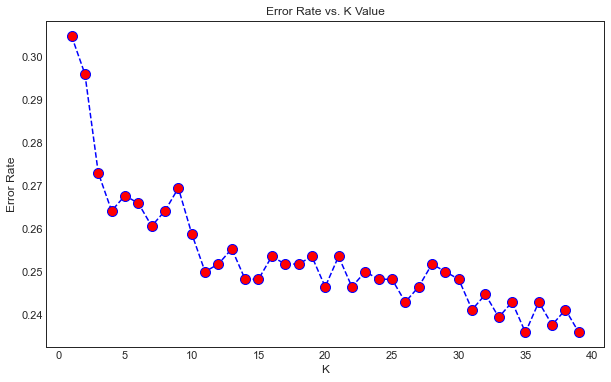

Minimum error:- 0.23581560283687944 at K = 34


Predicted Non-User  Predicted User
KNeighborsClassifier                                    
Actual Non-User                      131              72
Actual User                           65             296

Predicted Non-User  Predicted User
KNeighborsClassifierWeightedDistance                                    
Actual Non-User                                      114              89
Actual User                                           63             298

Learning rate set to 0.018096
0:	learn: 0.6818871	total: 2.08ms	remaining: 2.08s
1:	learn: 0.6708451	total: 3.53ms	remaining: 1.76s
2:	learn: 0.6630127	total: 5.04ms	remaining: 1.68s
3:	learn: 0.6542607	total: 6.68ms	remaining: 1.66s
4:	learn: 0.6452078	total: 8.15ms	remaining: 1.62s
5:	learn: 0.6365205	total: 9.62ms	remaining: 1.59s
6:	learn: 0.6280707	total: 11ms	remaining: 1.56s
7:	learn: 0.6220109	total: 12.6ms	remaining: 1.56s
8:	learn: 0.6142818	total: 14.2ms	remaining: 1.56s
9:	learn: 0.6067730	total: 15.8ms	remaining: 1.56s
10:	learn: 0.5991769	total: 17.2ms	remaining: 1.54s
11:	learn: 0.5918461	total: 18.7ms	remaining: 1.54s
12:	learn: 0.5850498	total: 20.2ms	remaining: 1.53s
13:	learn: 0.5782792	total: 21.7ms	remaining: 1.53s
14:	learn: 0.5728173	total: 23.4ms	remaining: 1.53s
15:	learn: 0.5671622	total: 24.9ms	remaining: 1.53s
16:	learn: 0.5618514	total: 26.5ms	remaining: 1.53s
17:	learn: 0.5565376	total: 28ms	remaining: 1.53s
18:	learn: 0.5513829	total: 29.9ms	remaining: 1.

Predicted Non-User  Predicted User
CatBoostClassifier                                    
Actual Non-User                    120              83
Actual User                         60             301

Accuracy  Recall  Precision    F1   ROC
Model                                                                        
LogisticRegression                        0.76    0.80       0.84  0.82  0.73
LogisticRegressionBalanced                0.76    0.84       0.76  0.80  0.76
SVC                                       0.75    0.80       0.82  0.81  0.73
NuSVC                                     0.59    0.69       0.66  0.68  0.57
GaussianNB                                0.76    0.79       0.84  0.81  0.72
DecisionTreeClassifier                    0.71    0.76       0.79  0.78  0.68
RandomForestClassifier                    0.76    0.80       0.83  0.81  0.73
RandomForestClassifierBalanced            0.75    0.79       0.83  0.81  0.72
AdaBoostClassifier                        0.75    0.79       0.84  0.81  0.72
KNeighborsClassifier                      0.76    0.80       0.82  0.81  0.73
KNeighborsClassifierWeightedDistance      0.73    0.77       0.83  0.80  0.69
CatBoostClassifier                        0.75    0.78       0.83  0.81  0.71

In [173]:
norm_pca_performance, norm_pca_ROC, norm_pca_confusion = classification_models(model_list, X_train_norm_pca, X_test_norm_pca, y_train, y_test)

Original base model still outperforms!

##### Standardization

In [176]:
# fit scaler on training data
scaler = StandardScaler().fit(X_train)

# transform training data
X_train_stand = scaler.transform(X_train)

# transform testing dataabs
X_test_stand = scaler.transform(X_test)

Predicted Non-User  Predicted User
LogisticRegression                                    
Actual Non-User                    131              72
Actual User                         51             310

Predicted Non-User  Predicted User
LogisticRegressionBalanced                                    
Actual Non-User                            157              46
Actual User                                 76             285

Predicted Non-User  Predicted User
SVC                                                
Actual Non-User                 128              75
Actual User                      49             312

Predicted Non-User  Predicted User
NuSVC                                              
Actual Non-User                 107              96
Actual User                      65             296

Predicted Non-User  Predicted User
GaussianNB                                         
Actual Non-User                 144              59
Actual User                      75             286

Predicted Non-User  Predicted User
DecisionTreeClassifier                                    
Actual Non-User                        113              90
Actual User                             64             297

Predicted Non-User  Predicted User
RandomForestClassifier                                    
Actual Non-User                        128              75
Actual User                             52             309

Predicted Non-User  Predicted User
RandomForestClassifierBalanced                                    
Actual Non-User                                122              81
Actual User                                     50             311

Predicted Non-User  Predicted User
AdaBoostClassifier                                    
Actual Non-User                    127              76
Actual User                         54             307

Elbow curve for k


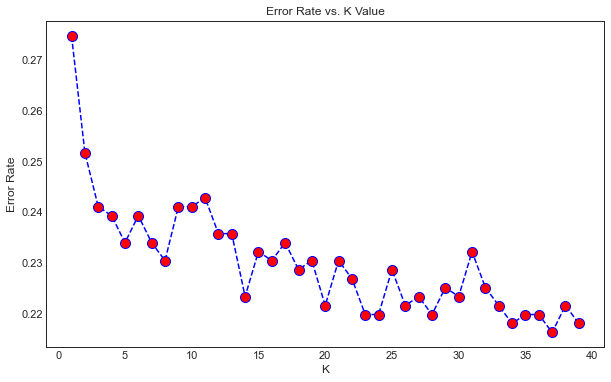

Minimum error:- 0.21631205673758866 at K = 36


Predicted Non-User  Predicted User
KNeighborsClassifier                                    
Actual Non-User                      141              62
Actual User                           62             299

Predicted Non-User  Predicted User
KNeighborsClassifierWeightedDistance                                    
Actual Non-User                                      125              78
Actual User                                           52             309

Learning rate set to 0.018096
0:	learn: 0.6827556	total: 2.92ms	remaining: 2.92s
1:	learn: 0.6728144	total: 3.95ms	remaining: 1.97s
2:	learn: 0.6637463	total: 5.2ms	remaining: 1.73s
3:	learn: 0.6550671	total: 6.76ms	remaining: 1.68s
4:	learn: 0.6451534	total: 7.99ms	remaining: 1.59s
5:	learn: 0.6362242	total: 9.33ms	remaining: 1.55s
6:	learn: 0.6281177	total: 10.6ms	remaining: 1.5s
7:	learn: 0.6199226	total: 11.6ms	remaining: 1.44s
8:	learn: 0.6121677	total: 12.7ms	remaining: 1.4s
9:	learn: 0.6045944	total: 13.8ms	remaining: 1.36s
10:	learn: 0.5979500	total: 14.9ms	remaining: 1.34s
11:	learn: 0.5919746	total: 16.1ms	remaining: 1.33s
12:	learn: 0.5846409	total: 17.4ms	remaining: 1.32s
13:	learn: 0.5779517	total: 18.6ms	remaining: 1.31s
14:	learn: 0.5716329	total: 19.9ms	remaining: 1.31s
15:	learn: 0.5653180	total: 21.3ms	remaining: 1.31s
16:	learn: 0.5605044	total: 22.9ms	remaining: 1.33s
17:	learn: 0.5542560	total: 24.1ms	remaining: 1.31s
18:	learn: 0.5487696	total: 25.4ms	remaining: 1

Predicted Non-User  Predicted User
CatBoostClassifier                                    
Actual Non-User                    124              79
Actual User                         47             314

Accuracy  Recall  Precision    F1   ROC
Model                                                                        
LogisticRegression                        0.78    0.81       0.86  0.83  0.75
LogisticRegressionBalanced                0.78    0.86       0.79  0.82  0.78
SVC                                       0.78    0.81       0.86  0.83  0.75
NuSVC                                     0.71    0.76       0.82  0.79  0.67
GaussianNB                                0.76    0.83       0.79  0.81  0.75
DecisionTreeClassifier                    0.73    0.77       0.82  0.79  0.69
RandomForestClassifier                    0.77    0.80       0.86  0.83  0.74
RandomForestClassifierBalanced            0.77    0.79       0.86  0.83  0.73
AdaBoostClassifier                        0.77    0.80       0.85  0.83  0.74
KNeighborsClassifier                      0.78    0.83       0.83  0.83  0.76
KNeighborsClassifierWeightedDistance      0.77    0.80       0.86  0.83  0.74
CatBoostClassifier                        0.78    0.80       0.87  0.83  0.74

In [177]:
stand_performance, stand_ROC, stand_confusion = classification_models(model_list, X_train_stand, X_test_stand, y_train, y_test)

In [181]:
pca_stand=PCA(0.85).fit(X_train_stand)
X_train_stand_pca=pca.transform(X_train_stand)
X_test_stand_pca=pca.transform(X_test_stand)

Predicted Non-User  Predicted User
LogisticRegression                                    
Actual Non-User                    128              75
Actual User                         52             309

Predicted Non-User  Predicted User
LogisticRegressionBalanced                                    
Actual Non-User                            157              46
Actual User                                 81             280

Predicted Non-User  Predicted User
SVC                                                
Actual Non-User                 121              82
Actual User                      48             313

Predicted Non-User  Predicted User
NuSVC                                              
Actual Non-User                 107              96
Actual User                      89             272

Predicted Non-User  Predicted User
GaussianNB                                         
Actual Non-User                 136              67
Actual User                      56             305

Predicted Non-User  Predicted User
DecisionTreeClassifier                                    
Actual Non-User                        116              87
Actual User                             63             298

Predicted Non-User  Predicted User
RandomForestClassifier                                    
Actual Non-User                        119              84
Actual User                             52             309

Predicted Non-User  Predicted User
RandomForestClassifierBalanced                                    
Actual Non-User                                126              77
Actual User                                     48             313

Predicted Non-User  Predicted User
AdaBoostClassifier                                    
Actual Non-User                    120              83
Actual User                         63             298

Elbow curve for k


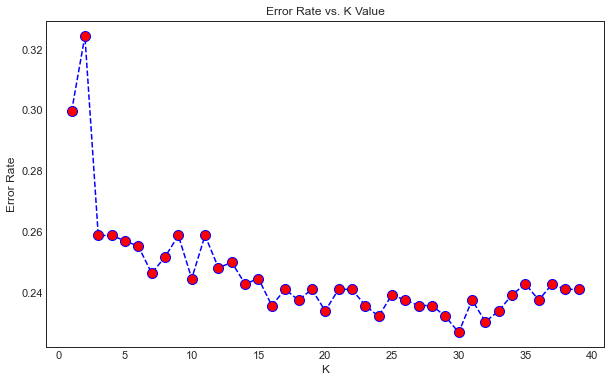

Minimum error:- 0.22695035460992907 at K = 29


Predicted Non-User  Predicted User
KNeighborsClassifier                                    
Actual Non-User                      125              78
Actual User                           53             308

Predicted Non-User  Predicted User
KNeighborsClassifierWeightedDistance                                    
Actual Non-User                                      118              85
Actual User                                           62             299

Learning rate set to 0.018096
0:	learn: 0.6845105	total: 2.68ms	remaining: 2.67s
1:	learn: 0.6752988	total: 4.18ms	remaining: 2.08s
2:	learn: 0.6664349	total: 5.73ms	remaining: 1.9s
3:	learn: 0.6574134	total: 7.98ms	remaining: 1.99s
4:	learn: 0.6505068	total: 9.98ms	remaining: 1.99s
5:	learn: 0.6432104	total: 12ms	remaining: 1.99s
6:	learn: 0.6369386	total: 14.2ms	remaining: 2.01s
7:	learn: 0.6300276	total: 15.8ms	remaining: 1.97s
8:	learn: 0.6221503	total: 17.5ms	remaining: 1.92s
9:	learn: 0.6157273	total: 19.2ms	remaining: 1.9s
10:	learn: 0.6093863	total: 21.6ms	remaining: 1.94s
11:	learn: 0.6026597	total: 23.8ms	remaining: 1.96s
12:	learn: 0.5976884	total: 25.5ms	remaining: 1.93s
13:	learn: 0.5913376	total: 27ms	remaining: 1.9s
14:	learn: 0.5849012	total: 28.6ms	remaining: 1.87s
15:	learn: 0.5784352	total: 30.1ms	remaining: 1.85s
16:	learn: 0.5737915	total: 31.9ms	remaining: 1.84s
17:	learn: 0.5693153	total: 33.3ms	remaining: 1.82s
18:	learn: 0.5655069	total: 35ms	remaining: 1.8s
19

Predicted Non-User  Predicted User
CatBoostClassifier                                    
Actual Non-User                    117              86
Actual User                         52             309

Accuracy  Recall  Precision    F1   ROC
Model                                                                        
LogisticRegression                        0.77    0.80       0.86  0.83  0.74
LogisticRegressionBalanced                0.77    0.86       0.78  0.82  0.77
SVC                                       0.77    0.79       0.87  0.83  0.73
NuSVC                                     0.67    0.74       0.75  0.75  0.64
GaussianNB                                0.78    0.82       0.84  0.83  0.76
DecisionTreeClassifier                    0.73    0.77       0.83  0.80  0.70
RandomForestClassifier                    0.76    0.79       0.86  0.82  0.72
RandomForestClassifierBalanced            0.78    0.80       0.87  0.83  0.74
AdaBoostClassifier                        0.74    0.78       0.83  0.80  0.71
KNeighborsClassifier                      0.77    0.80       0.85  0.82  0.73
KNeighborsClassifierWeightedDistance      0.74    0.78       0.83  0.80  0.70
CatBoostClassifier                        0.76    0.78       0.86  0.82  0.72

In [182]:
stand_pca_performance, stand_pca_ROC, stand_pca_confusion = classification_models(model_list, X_train_stand_pca, X_test_stand_pca, y_train, y_test)

#### XGBoost

In [ ]:
model10=XGBClassifier()
model10.fit(X_train,y_train)
y_pred10=model10.predict(X_test)
conf10=confusion_matrix(y_test,y_pred10)
display(conf10)
acc10=accuracy_score(y_test,y_pred10)
rec10=recall_score(y_test,y_pred10)
pr10=precision_score(y_test,y_pred10)
f110=f1_score(y_test,y_pred10)
print(acc10,pr10,rec10,f110)
model.append(["XGBoost",acc10,pr10,rec10,f110])

#### Hyperparameters Tuning Base Models

In [203]:
# list of models for GridSearch
grid_model_list=["LogisticRegression", "SVC", "RandomForestClassifier", "KNeighborsClassifier"]

# parameters for GridSearch
from math import log10, floor
def round_1sf(x):
    return round(x, -int(floor(log10(abs(x)))))
upper = int(round_1sf(X_train.shape[0]**0.5))
grid_dct={"LogisticRegression": dict(solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2'],C=[100, 10, 1.0, 0.1, 0.01, 0.001]), "SVC": dict(kernel=['poly', 'rbf', 'sigmoid'],C=[50, 10, 1.0, 0.1, 0.01],gamma=['scale']),"RandomForestClassifier" : dict(n_estimators=[10, 100, 1000],max_features=['sqrt', 'log2']), "KNeighborsClassifier": dict(n_neighbors=range(1, upper, 2),weights=['uniform', 'distance'],metric=['euclidean', 'manhattan', 'minkowski'])}

In [263]:
def grid_models(models, parameters, X_train, X_test, y_train, y_test):
    performance=[]
    ROC=[]
    confusion=[]
    for m in models:
        if m=="SVC":
            model=SVC(probability= True)
        elif m=="LogisticRegression":
            model=LogisticRegression(max_iter=1e8)
        else:
            model=eval(m)()
        
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        gs = GridSearchCV(estimator=model, param_grid=parameters[m], n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, refit=True)
        grid_result = gs.fit(X_train, y_train)
        print("Best for %s: %f using %s" % (m, grid_result.best_score_, grid_result.best_params_))
        y_pred = gs.predict(X_test)
        
        conf=confusion_matrix(y_test, y_pred)
        acc=accuracy_score(y_test,y_pred)
        rec=recall_score(y_test,y_pred)
        pr=precision_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred)
        np.set_printoptions(precision=2)

        # Plot normalized confusion matrix
        c=pd.DataFrame(conf, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])
        c.index.name=m
        cm = plot_confusion_matrix(gs, X_test, y_test, display_labels=["Non-User", "User"], cmap=plt.cm.Blues, normalize="true")
        cm.ax_.set_title(f"{m} Normalized confusion matrix")
        plt.show()
        
        model_roc = roc_auc_score(y_test,  y_pred)
        fpr,tpr,thresholds=roc_curve(y_test, gs.predict_proba(X_test)[:,1])
        
        plt.style.use('seaborn-whitegrid')
        sns.set(style="white", font_scale = 1)
        graph_name="graph/ROC Grid {}.png"
    
        f, ax = plt.subplots(figsize=(10, 10))
        plt.clf()
        plt.plot(fpr,tpr, label=f'ROC curve={model_roc.round(2)}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{m} ROC Grid')
        plt.legend(loc="lower right")
        #plt.savefig(graph_name.format(names[i]) , transparent=True)
        plt.show()            
               
        performance.append([m ,acc.round(2),pr.round(2),rec.round(2),f1.round(2), model_roc.round(2)])
        ROC.append([fpr,tpr])
        confusion.append(c)
        
    perf=pd.DataFrame(performance, columns=["Model", "Accuracy", "Recall", "Precision", "F1", "ROC"]).set_index("Model")
    display(perf)
    return perf, ROC, confusion

Best for LogisticRegression: 0.790822 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


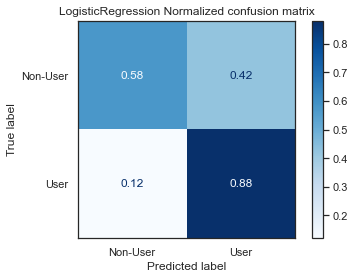

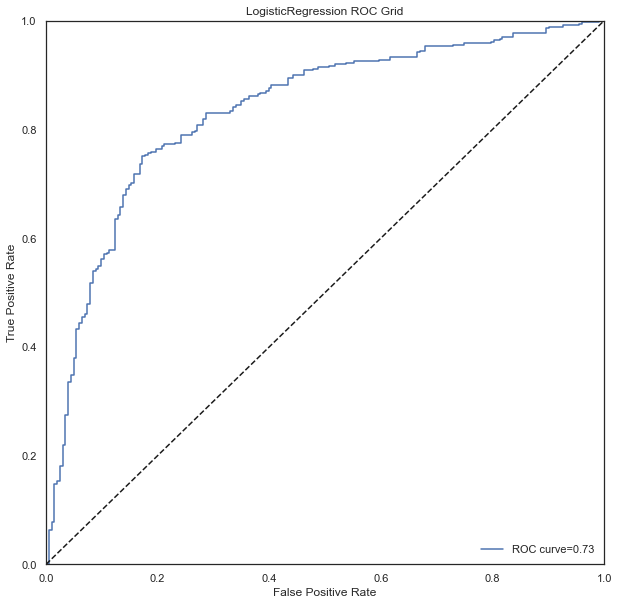

Best for SVC: 0.788783 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


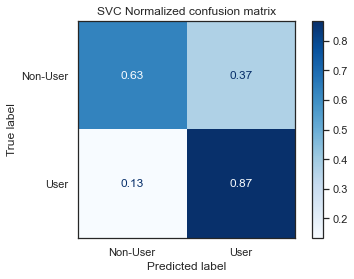

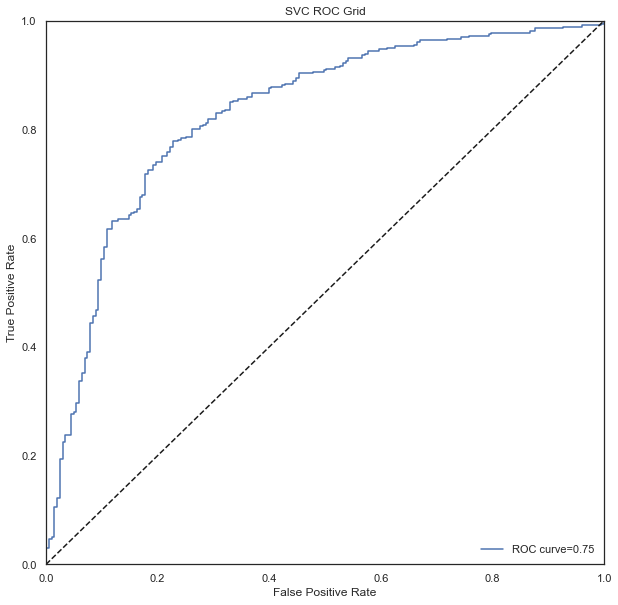

Best for RandomForestClassifier: 0.790071 using {'max_features': 'sqrt', 'n_estimators': 1000}


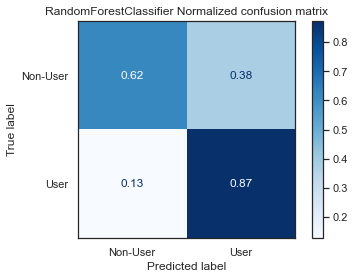

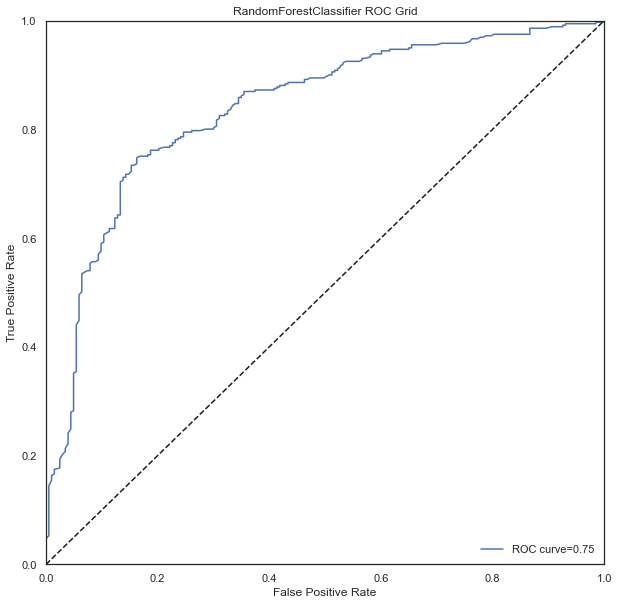

Best for KNeighborsClassifier: 0.787250 using {'metric': 'manhattan', 'n_neighbors': 33, 'weights': 'uniform'}


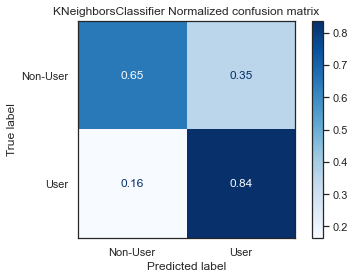

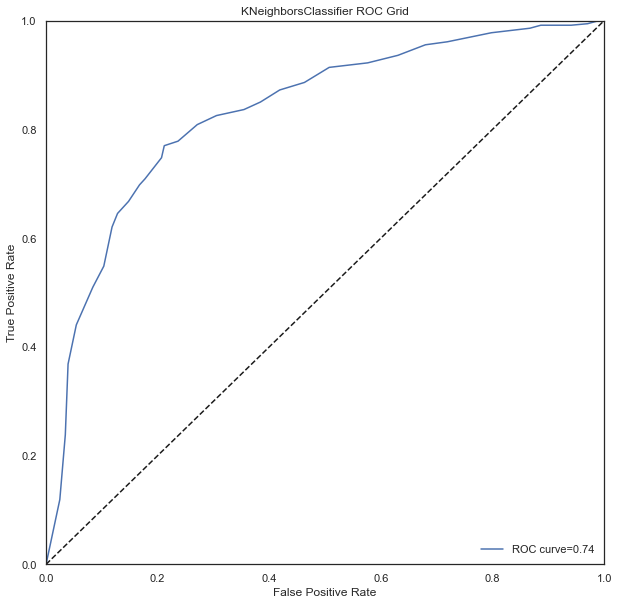

Accuracy  Recall  Precision    F1   ROC
Model                                                          
LogisticRegression          0.77    0.79       0.88  0.83  0.73
SVC                         0.78    0.81       0.87  0.84  0.75
RandomForestClassifier      0.78    0.80       0.87  0.84  0.75
KNeighborsClassifier        0.77    0.81       0.84  0.82  0.74

In [264]:
grid_performance, grid_ROC, grid_confusion = grid_models(grid_model_list, grid_dct, X_train, X_test, y_train, y_test)

Best for LogisticRegression: 0.789035 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


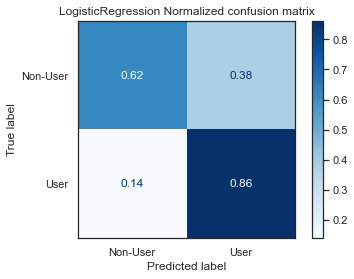

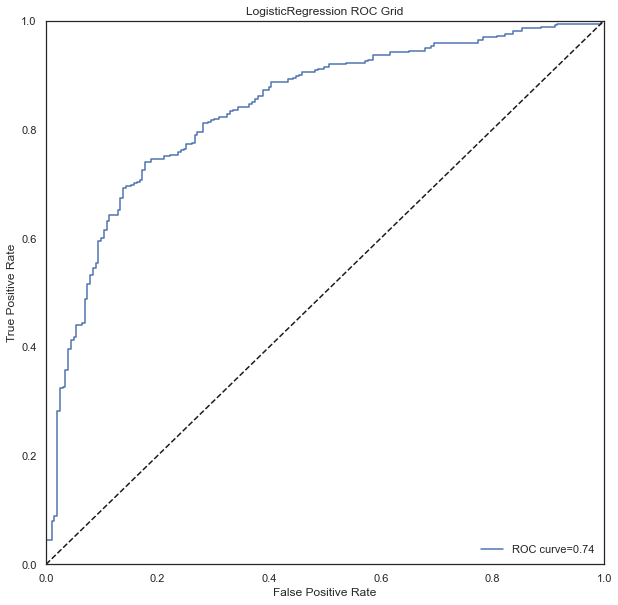

Best for SVC: 0.796133 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


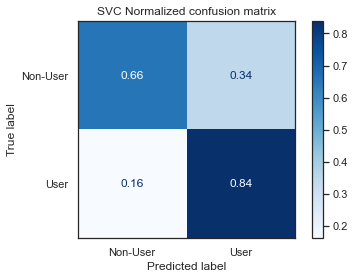

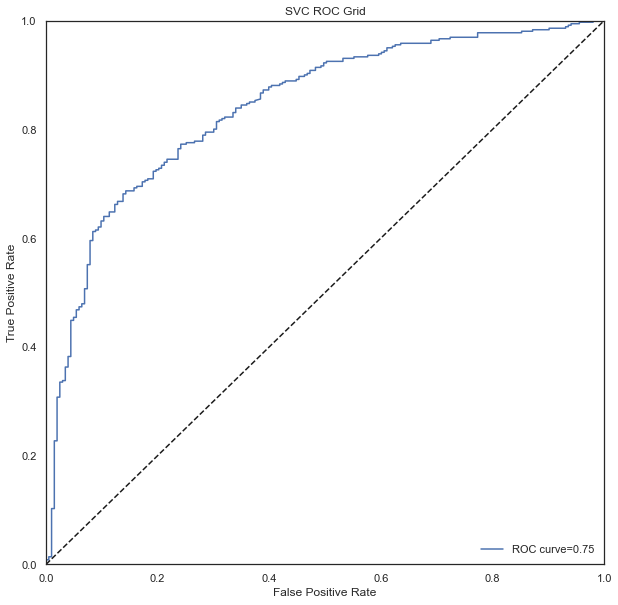

Best for RandomForestClassifier: 0.790570 using {'max_features': 'sqrt', 'n_estimators': 1000}


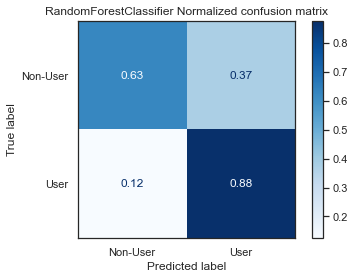

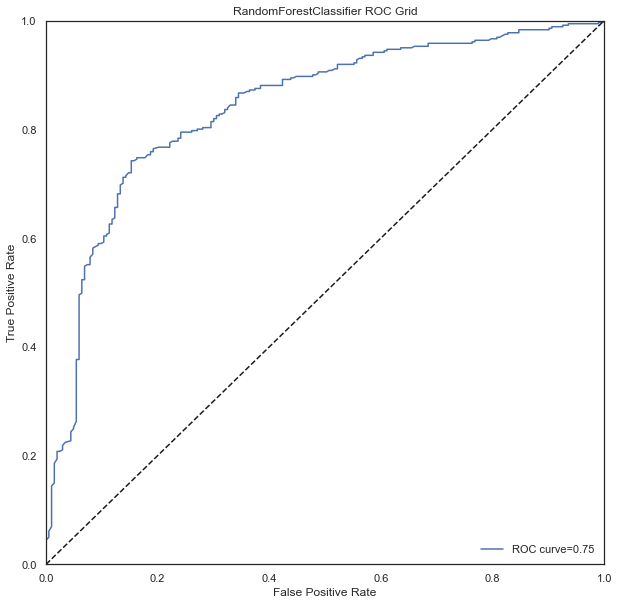

Best for KNeighborsClassifier: 0.793107 using {'metric': 'euclidean', 'n_neighbors': 39, 'weights': 'uniform'}


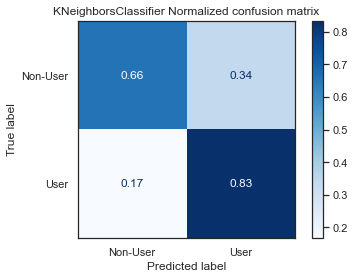

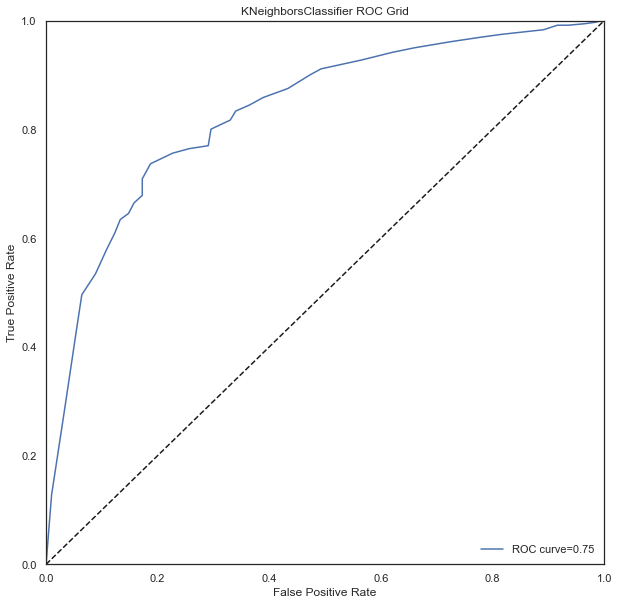

Accuracy  Recall  Precision    F1   ROC
Model                                                          
LogisticRegression          0.77    0.80       0.86  0.83  0.74
SVC                         0.77    0.81       0.84  0.83  0.75
RandomForestClassifier      0.79    0.81       0.88  0.84  0.75
KNeighborsClassifier        0.77    0.81       0.83  0.82  0.75

In [265]:
grid_norm_performance, grid_norm_ROC, grid_norm_confusion = grid_models(grid_model_list, grid_dct, X_train_norm, X_test_norm, y_train, y_test)

In [259]:
performance

Accuracy  Recall  Precision    F1   ROC
Model                                                                        
LogisticRegression                        0.78    0.81       0.86  0.83  0.75
LogisticRegressionBalanced                0.78    0.86       0.79  0.82  0.78
SVC                                       0.78    0.81       0.87  0.84  0.75
NuSVC                                     0.70    0.75       0.80  0.78  0.66
GaussianNB                                0.76    0.83       0.79  0.81  0.75
DecisionTreeClassifier                    0.72    0.76       0.81  0.79  0.68
RandomForestClassifier                    0.78    0.81       0.87  0.84  0.75
RandomForestClassifierBalanced            0.77    0.80       0.86  0.83  0.73
AdaBoostClassifier                        0.77    0.80       0.85  0.83  0.74
KNeighborsClassifier                      0.78    0.82       0.84  0.83  0.76
KNeighborsClassifierWeightedDistance      0.75    0.78       0.84  0.81  0.72
CatBoostClassifier                        0.78    0.80       0.87  0.83  0.74

### Deep Learning Model

In [285]:
def create_model(model):
    classifier = KerasClassifier(model, verbose=2)
    return classifier

In [359]:
# GridSearch
def grid(classifier):
    # define the grid search parameters
    batch_size = [8, 16, 32, 64, 96, 128]
    epochs = [10, 15, 20, 25, 30, 40, 50, 60]
    validation_split=[0.2]
    param_grid = dict(batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=5, return_train_score=True, verbose=2)
    grid_result = grid.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result

In [360]:
def evaluate_model(X_train, y_train, X_test, y_test, params, model):
    epochs, batch_size = params["epochs"], params["batch_size"]
    classifier=model()
    history = classifier.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.2, shuffle=True)
    # evaluate model
    _, accuracy = classifier.evaluate( X_test, y_test, batch_size=batch_size, verbose=0)
    return history, accuracy, classifier

In [361]:
def run_model(model, grid_result):
    history, score, classifier = evaluate_model(X_train, y_train, X_test, y_test, grid_result.best_params_, model)
    score = score * 100.0
    print('> %.3f' % (score))
    results=pd.DataFrame(history.history, index=history.epoch)
    return results, classifier

In [362]:
def plot_loss(results):
    plt.style.use('seaborn-whitegrid')
    sns.set(style="white", font_scale = 1.5)
    fig, axes = plt.subplots(1,2, figsize=(20,5), sharex=True)
    axes[0].set_title('Loss')
    axes[0].plot(results['loss'], label='train', )
    axes[0].plot(results['val_loss'], label='test')
    axes[0].legend()
    #plot accuracy during training
    axes[1].set_title('Accuracy')
    axes[1].plot(results['accuracy'], label='train')
    axes[1].plot(results['val_accuracy'], label='test')
    axes[1].legend()
    plt.show()
    return

In [363]:
def run(model):
    classifier=create_model(model)
    grid_result=grid(classifier)
    results, classifier=run_model(model, grid_result)
    plot_loss(results)
    return classifier

In [364]:
def model1():
    seed(17)
    set_seed(17)
    K.clear_session()
    model = Sequential()
    model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=8, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 10.5min finished


Epoch 1/50
132/132 - 1s - loss: 0.7714 - accuracy: 0.5924 - val_loss: 0.6229 - val_accuracy: 0.6502
Epoch 2/50
132/132 - 0s - loss: 0.6204 - accuracy: 0.6648 - val_loss: 0.5650 - val_accuracy: 0.7414
Epoch 3/50
132/132 - 2s - loss: 0.5945 - accuracy: 0.6819 - val_loss: 0.5438 - val_accuracy: 0.7567
Epoch 4/50
132/132 - 0s - loss: 0.5715 - accuracy: 0.6924 - val_loss: 0.5310 - val_accuracy: 0.7643
Epoch 5/50
132/132 - 0s - loss: 0.5502 - accuracy: 0.7238 - val_loss: 0.5171 - val_accuracy: 0.7719
Epoch 6/50
132/132 - 0s - loss: 0.5590 - accuracy: 0.7105 - val_loss: 0.5067 - val_accuracy: 0.7757
Epoch 7/50
132/132 - 0s - loss: 0.5389 - accuracy: 0.7200 - val_loss: 0.4979 - val_accuracy: 0.7681
Epoch 8/50
132/132 - 0s - loss: 0.5191 - accuracy: 0.7390 - val_loss: 0.4899 - val_accuracy: 0.7643
Epoch 9/50
132/132 - 0s - loss: 0.5250 - accuracy: 0.7362 - val_loss: 0.4840 - val_accuracy: 0.7719
Epoch 10/50
132/132 - 0s - loss: 0.5311 - accuracy: 0.7324 - val_loss: 0.4820 - val_accuracy: 0.7719

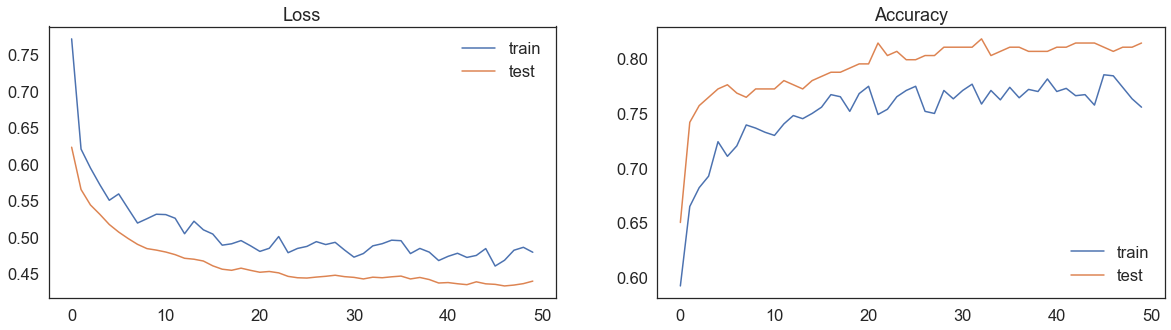

In [365]:
classifier1=run(model1)

In [366]:
classifier1

In [367]:
def perform(model):
    display(model.summary())
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: %f" % (scores[0]))
    print("Test Accuracy: %f%%" % (scores[1]*100))
    return

In [368]:
def confusion(model):
    y_pred=model.predict(X_test)
    y_predict=y_pred>0.5
    
    """ conf=confusion_matrix(y_test, y_pred)
    acc=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)"""
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    class_names = ["Non-User", "User"]
    
    df_heatmap = pd.DataFrame(confusion_matrix(y_test, y_predict) )

    plt.style.use('seaborn-whitegrid')
    sns.set(style="white", font_scale = 1.5)

    fig = plt.figure(figsize=(10,7))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", cmap="Blues")
    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    heatmap.set_xticklabels(class_names)
    heatmap.set_yticklabels(class_names)
    plt.ylabel('Actual Activity')
    plt.xlabel('Predicted Activity')
    plt.title("Confusion Matrix\n")
    #plt.savefig("graph/Confusion Matrix.png")
    plt.show()

    return y_predict

In [369]:
def class_report(model, y_predict): 
    cr=classification_report(y_test, y_predict, digits=4)
    print(cr)

In [370]:
def ROC_plot(model, y_predict):
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    plt.style.use('seaborn-whitegrid')
    sns.set(style="white", font_scale = 1)
    graph_name="graph/ROC NN.png"
    
    
    f, ax = plt.subplots(figsize=(10, 10))
    plt.clf()
    plt.plot(fpr,tpr, label=f'ROC curve={round(auc(fpr, tpr), 2)}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'NN ROC ')
    plt.legend(loc="lower right")
    #plt.savefig(graph_name.format(names[i]) , transparent=True)
    plt.show()     

In [371]:
def final_performance(model):
    perform(model)
    y_predict = confusion(model)
    class_report(model, y_predict)
    ROC_plot(model, y_predict)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9

None

Test Loss: 0.476376
Test Accuracy: 78.368795%


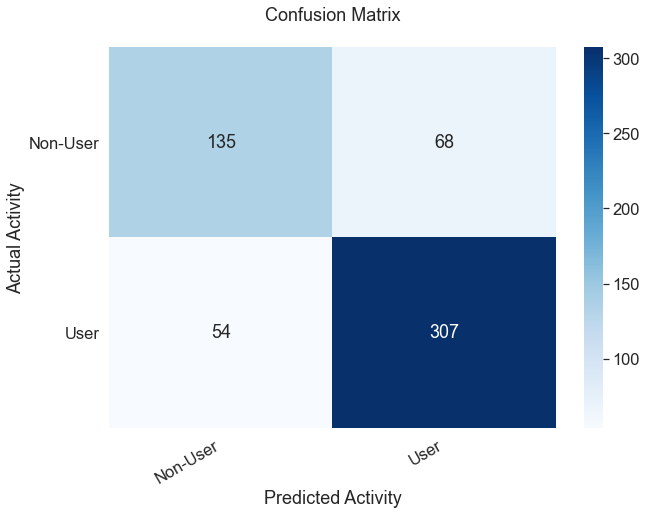

              precision    recall  f1-score   support

       False     0.7143    0.6650    0.6888       203
        True     0.8187    0.8504    0.8342       361

    accuracy                         0.7837       564
   macro avg     0.7665    0.7577    0.7615       564
weighted avg     0.7811    0.7837    0.7819       564



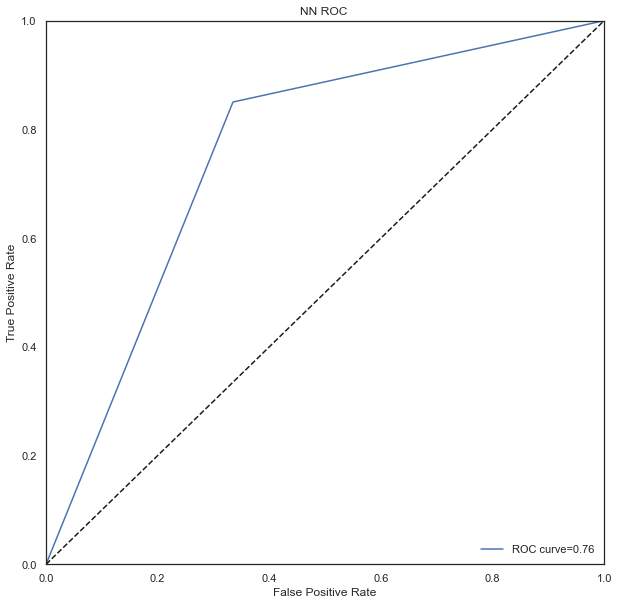

In [372]:
final_performance(classifier1)